In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pydicom

In [5]:
folder = 'dataset/images/tst'
patients = os.listdir(folder)
for patient in patients:
    images = os.listdir(folder + '/' + patient)
    for image in images:
        im_name = image.split('.')[0]
        im = np.zeros((512, 512))
        im1 = cv2.imread('dataset/Eso/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im1 is not None:
            im = im + im1
        im2 = cv2.imread('dataset/heart/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im2 is not None:
            im = im + im2
        im3 = cv2.imread('dataset/Lung_L/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im3 is not None:
            im = im + im3        
        im4 = cv2.imread('dataset/Lung_R/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im4 is not None:
            im = im + im4
        im5 = cv2.imread('dataset/Spine/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im5 is not None:
            im = im + im5      
            
        im = np.where(im>=1,1,0).astype(np.uint8)
        
        if im.max() == 0:
            os.remove(folder + '/' + patient + '/' + image)
        else:    
            cv2.imwrite('dataset/gold/'+im_name+'.png',im)

In [1]:
def getXYofboundary(im):

    bnd = sg.find_boundaries(im, mode='inner').astype(np.uint8)
    
    return getXY(bnd)

def getXY(bnd):
    return np.transpose(np.nonzero(bnd))

def getPairs(im, maxdim = 1):
    xy = getXYofboundary(im)
    pairs = None
    if xy.shape[0]>0:
        pairs= rpp.run("--format point-cloud --dim "+str(maxdim), xy)
        
    return pairs

In [2]:
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json

with open('cutting_regions_trn.json') as f:
    cutting_regions = json.load(f) 
with open('cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)  

with open('chosen_data_trn.json') as f:
    chosen_data = json.load(f) 
with open('chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp) 
    

dr='dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        im = np.where(im>0,1,0) 
        [sh, eh, sw, ew] = cutting_regions[name]
        sh = int(sh + 64)
        sw = int(sw + 128)
        ew = int(ew - 128)
        pairs = getPairs(im[sh:eh,sw:ew])

        imDgms0 = pairs[0]
        imDgms0 = imDgms0.tolist()
        imDgms0 = np.array(imDgms0)

        with open(dr+'/dgms0/'+name.split('.')[0]+'.npy', 'wb') as f:
            np.save(f, imDgms0)    

In [4]:
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json

with open('cutting_regions_trn.json') as f:
    cutting_regions = json.load(f) 
with open('cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)  


with open('chosen_data_trn.json') as f:
    chosen_data = json.load(f) 
with open('chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp) 
    

dr='dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        im = np.where(im>0,1,0)
        
        [sh, eh, sw, ew] = cutting_regions[name]
        pairs = getPairs(im[sh:eh,sw:ew])

        imDgms0 = pairs[0]
        imDgms0 = imDgms0.tolist()
        imDgms0 = np.array(imDgms0)

        with open(dr+'/dgms0All/'+name.split('.')[0]+'.npy', 'wb') as f:
            np.save(f, imDgms0)       

In [4]:
from gtda.homology import CubicalPersistence
from gtda.images import HeightFiltration
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json

HF_0_1 = HeightFiltration(direction=np.array([0, 1]))
HF_1_0 = HeightFiltration(direction=np.array([1, 0]))
HF_1_1 = HeightFiltration(direction=np.array([1, 1]))
HF_0_m1 = HeightFiltration(direction=np.array([0, -1]))
HF_m1_0 = HeightFiltration(direction=np.array([-1, 0]))
HF_m1_1 = HeightFiltration(direction=np.array([-1, 1]))
HF_1_m1 = HeightFiltration(direction=np.array([1, -1]))
HF_m1_m1 = HeightFiltration(direction=np.array([-1, -1]))

CP = CubicalPersistence(
    homology_dimensions=[0],
    coeff=3,
    n_jobs=-1
)

HF_list = [['_0_1',HF_0_1],['_1_0',HF_1_0],['_1_1',HF_1_1],['_0_m1',HF_0_m1],['_m1_0',HF_m1_0],
           ['_m1_1',HF_m1_1],['_1_m1',HF_1_m1],['_m1_m1',HF_m1_m1]]

with open('cutting_regions_trn.json') as f:
    cutting_regions = json.load(f) 
with open('cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)


with open('chosen_data_trn.json') as f:
    chosen_data = json.load(f) 
with open('chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp)    


dr='dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        [sh, eh, sw, ew] = cutting_regions[name]
        
        im = im[sh:eh,sw:ew]
        
        for clss in range(1,5):
            organ = np.where(im==clss,1,0)
            for HF in HF_list:
                heightFiltration = HF[1].fit_transform(organ[None, :, :])
                cubicalPersistence = CP.fit_transform(heightFiltration)
                arr = cubicalPersistence[0][:,:-1]

                with open(dr+'/hf_dgms0/'+name.split('.')[0]+'_'+str(clss)+HF[0]+'.npy', 'wb') as f:
                    np.save(f, arr)

In [1]:
from gtda.homology import CubicalPersistence
from gtda.images import HeightFiltration
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json

HF_0_1 = HeightFiltration(direction=np.array([0, 1]))
HF_1_0 = HeightFiltration(direction=np.array([1, 0]))
HF_1_1 = HeightFiltration(direction=np.array([1, 1]))
HF_0_m1 = HeightFiltration(direction=np.array([0, -1]))
HF_m1_0 = HeightFiltration(direction=np.array([-1, 0]))
HF_m1_1 = HeightFiltration(direction=np.array([-1, 1]))
HF_1_m1 = HeightFiltration(direction=np.array([1, -1]))
HF_m1_m1 = HeightFiltration(direction=np.array([-1, -1]))

CP = CubicalPersistence(
    homology_dimensions=[0],
    coeff=3,
    n_jobs=-1
)

HF_list = [['_0_1',HF_0_1],['_1_0',HF_1_0],['_1_1',HF_1_1],['_0_m1',HF_0_m1],['_m1_0',HF_m1_0],
           ['_m1_1',HF_m1_1],['_1_m1',HF_1_m1],['_m1_m1',HF_m1_m1]]

with open('smallest_rectangle_trn.json') as f:
    smallest_rectangle = json.load(f) 
with open('smallest_rectangle_val.json') as f:
    smallest_rectangle_tmp = json.load(f)     
smallest_rectangle.update(smallest_rectangle_tmp)

with open('cutting_regions_trn.json') as f:
    cutting_regions = json.load(f)     
with open('cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)

with open('chosen_data_trn.json') as f:
    chosen_data = json.load(f) 
with open('chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp)    


dr='dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        [sh, eh, sw, ew] = smallest_rectangle[name]
        [csh, ceh, csw, cew] = cutting_regions[name]
        
        if sh<csh:
            sh=csh
        if eh>ceh:
            eh=ceh
        if sw<csw:
            sw=csw
        if ew>cew:
            ew=cew
        
        im = im[sh:eh,sw:ew]
        
        allIm = np.where(im>0,1,0)
        for HF in HF_list:
            heightFiltration = HF[1].fit_transform(allIm[None, :, :])
            cubicalPersistence = CP.fit_transform(heightFiltration)
            arr = cubicalPersistence[0][:,:-1]

            with open(dr+'/hf_dgms0/'+name.split('.')[0]+HF[0]+'.npy', 'wb') as f:
                np.save(f, arr)

In [3]:
count = 0
for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        count += 1
print(count)        

2003


In [2]:
from gtda.homology import CubicalPersistence
from gtda.images import RadialFiltration
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json


CP = CubicalPersistence(
    homology_dimensions=[0],
    coeff=3,
    n_jobs=-1
)

RFC = RadialFiltration(center=np.array([192, 128]))#should be column,row -> x,y

with open('cutting_regions_trn.json') as f:
    cutting_regions = json.load(f)
with open('cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)


with open('chosen_data_trn.json') as f:
    chosen_data = json.load(f)
with open('chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp)    


dr='dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        [sh, eh, sw, ew] = cutting_regions[name]
        
        im = im[sh:eh,sw:ew]
        
        allIm = np.where(im>0,1,0)
        radialFiltration = RFC.fit_transform(allIm[None, :, :])
        cubicalPersistence = CP.fit_transform(radialFiltration)
        arr = cubicalPersistence[0][:,:-1]

        with open(dr+'/rf_dgms0/'+name.split('.')[0]+'.npy', 'wb') as f:
            np.save(f, arr)

In [2]:
from gtda.homology import CubicalPersistence
from gtda.images import RadialFiltration
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json


CP = CubicalPersistence(
    homology_dimensions=[0],
    coeff=3,
    n_jobs=-1
)

RFC = RadialFiltration(center=np.array([192, 128]))

with open('smallest_rectangle_trn.json') as f:
    smallest_rectangle = json.load(f) 
with open('smallest_rectangle_val.json') as f:
    smallest_rectangle_tmp = json.load(f)     
smallest_rectangle.update(smallest_rectangle_tmp)

with open('cutting_regions_trn.json') as f:
    cutting_regions = json.load(f)     
with open('cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)

with open('chosen_data_trn.json') as f:
    chosen_data = json.load(f) 
with open('chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp)    


dr='dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        [sh, eh, sw, ew] = smallest_rectangle[name]
        [csh, ceh, csw, cew] = cutting_regions[name]
        
        if sh<csh:
            sh=csh
        if eh>ceh:
            eh=ceh
        if sw<csw:
            sw=csw
        if ew>cew:
            ew=cew
        
        im = im[sh:eh,sw:ew]
        
        im = np.where(im>0,1,0)
        RFC = RadialFiltration(center=np.array([int((ew-sw)/2), int((eh-sh)/2)])) #should be column,row -> x,y
        radialFiltration = RFC.fit_transform(im[None, :, :])
        cubicalPersistence = CP.fit_transform(radialFiltration)
        arr = cubicalPersistence[0][:,:-1]

        with open(dr+'/rff_dgms0/'+name.split('.')[0]+'.npy', 'wb') as f:
            np.save(f, arr)

In [60]:
import json
import os
with open('chosen_data_tst.json') as f:
    chosen_data = json.load(f) 
patients = os.listdir('dataset/images/tst')
summ = 0
for patient in patients:
    print(len(chosen_data[patient]))
    summ += len(chosen_data[patient])
print(len(patients))    
print(summ)    

20
18
22
26
11
17
22
22
20
9
23
18
19
23
22
19
26
23
23
25
26
18
5
22
22
19
26
520


In [7]:
folder = 'dataset/images/tst'
patients = os.listdir(folder)
for patient in patients:
    images = os.listdir(folder + '/' + patient)
    for image in images:
        im_name = image.split('.')[0]
        im = np.zeros((512, 512))
        im1 = cv2.imread('dataset/Eso/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im1 is not None:
            im = np.where(im1 > 0,2,im)
        im2 = cv2.imread('dataset/heart/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im2 is not None:
            im = np.where(im2 > 0,1,im)
        im3 = cv2.imread('dataset/Lung_L/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im3 is not None:
            im = np.where(im3 > 0,4,im)        
        im4 = cv2.imread('dataset/Lung_R/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im4 is not None:
            im = np.where(im4 > 0,4,im)
        im5 = cv2.imread('dataset/Spine/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im5 is not None:
            im = np.where(im5 > 0,3,im)      
            
        im = im.astype(np.uint8)        
   
        cv2.imwrite('dataset/goldMulty/'+im_name+'.png',im)

In [64]:
def colored_image(goldImage):
    (h,w) = goldImage.shape
    colored_image = np.zeros((h,w,3)).astype(np.uint8)
    for i in range(h):
        for j in range(w):
            if goldImage[i,j] == 1:
                colored_image[i,j,:] = [255,0,0]
            elif goldImage[i,j] == 2:
                colored_image[i,j,:] = [0,255,0]            
            elif goldImage[i,j] == 3:
                colored_image[i,j,:] = [0,0,255]   
            elif goldImage[i,j] == 4:
                colored_image[i,j,:] = [255,255,0]      
            elif goldImage[i,j] == 5:
                colored_image[i,j,:] = [0,255,255]            
            elif goldImage[i,j] == 6:
                colored_image[i,j,:] = [255,0,255]   
            elif goldImage[i,j] == 7:
                colored_image[i,j,:] = [255,128,128]   
            elif goldImage[i,j] == 8:
                colored_image[i,j,:] = [128,255,128]            
            elif goldImage[i,j] == 9:
                colored_image[i,j,:] = [128,128,255]   
            elif goldImage[i,j] == 10:
                colored_image[i,j,:] = [128,0,128]
            else:
                colored_image[i,j,:] = [0,0,0]
    return colored_image 

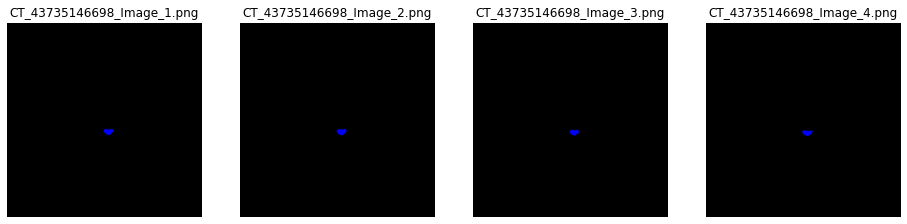

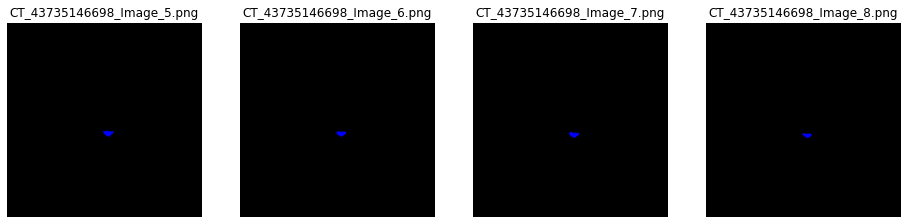

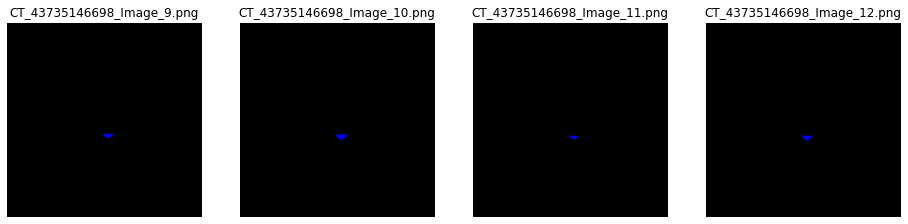

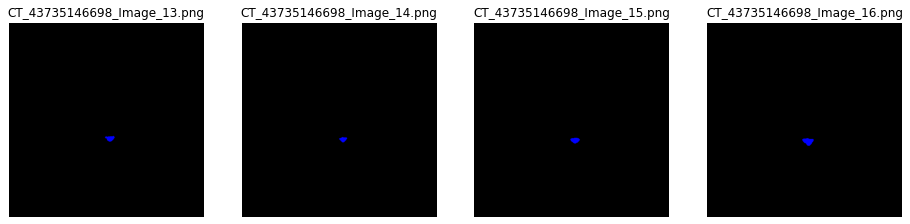

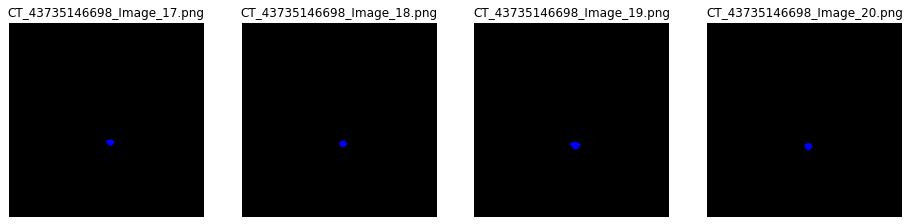

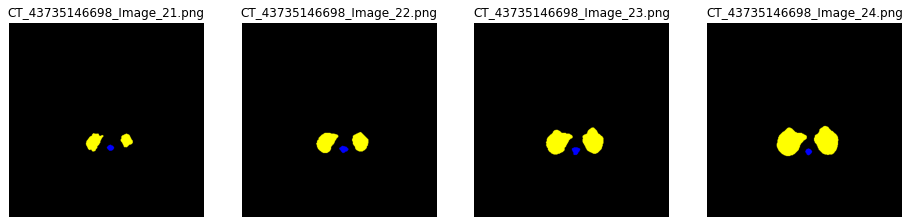

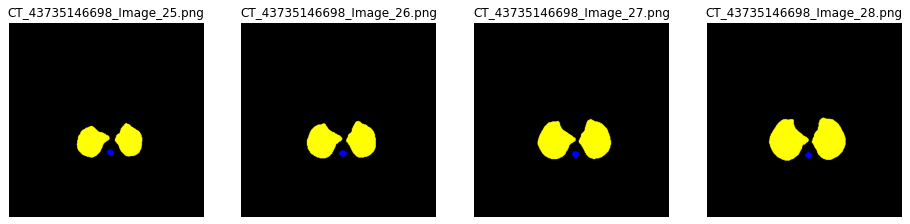

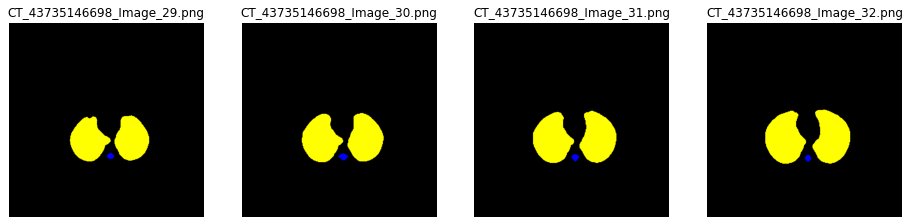

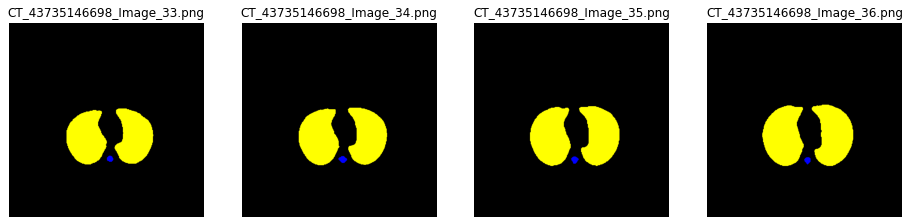

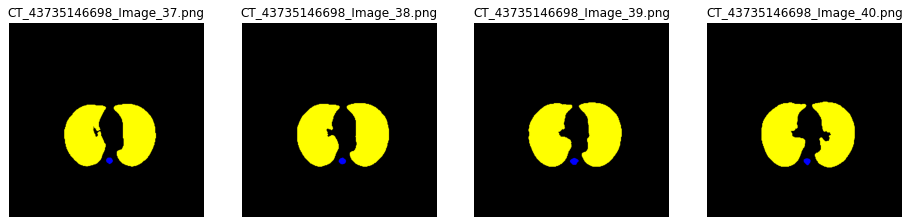

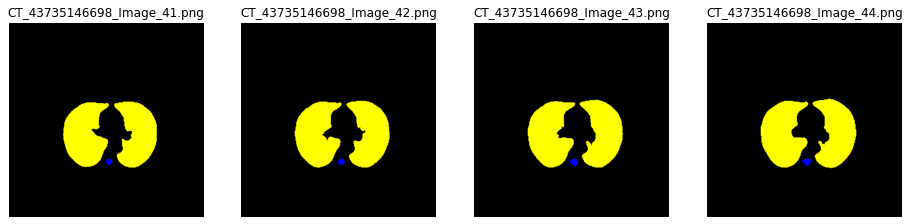

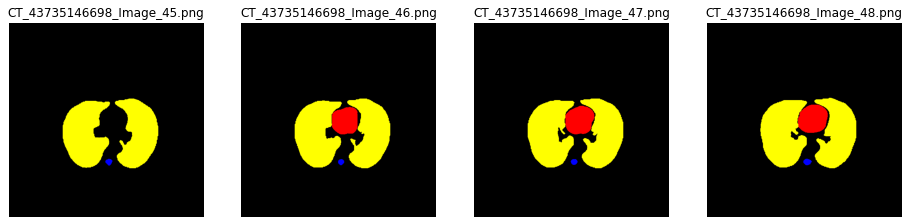

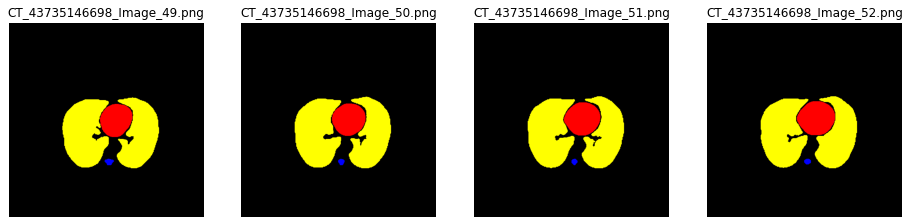

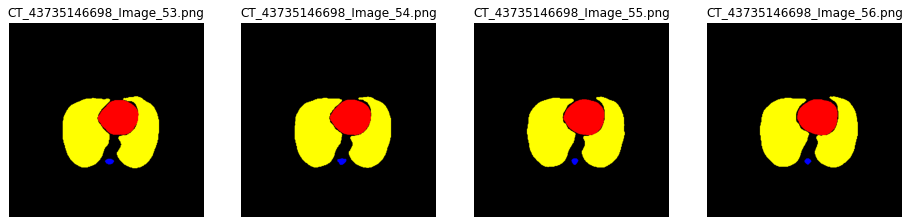

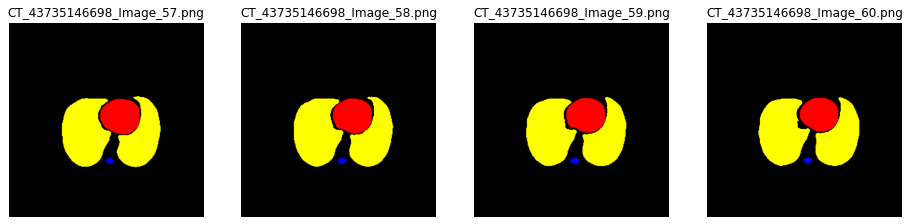

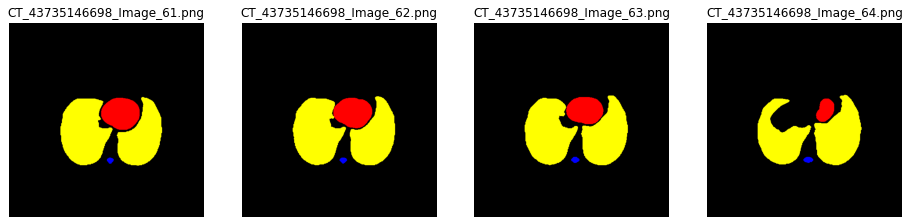

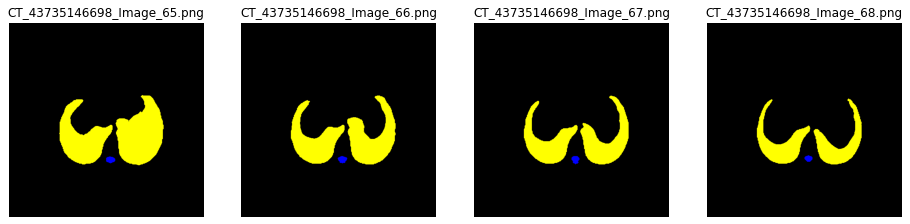

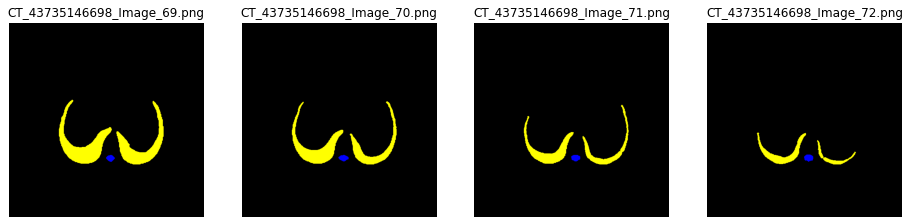

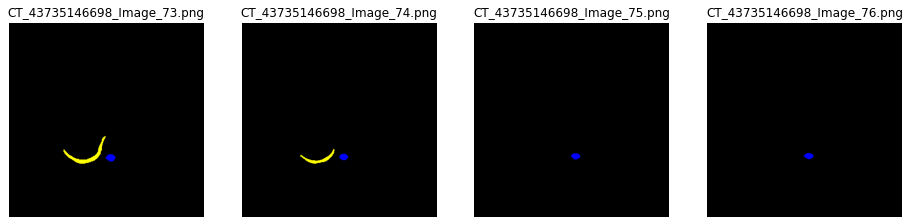

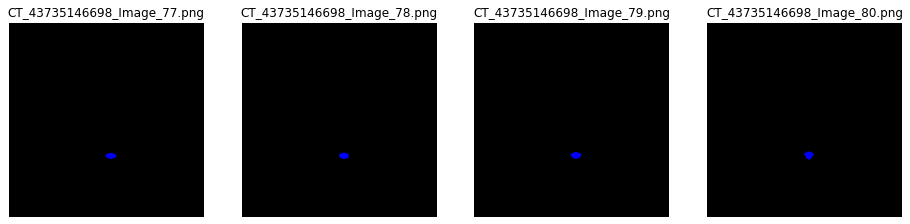

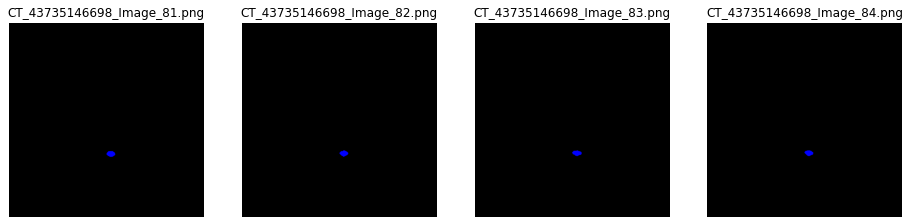

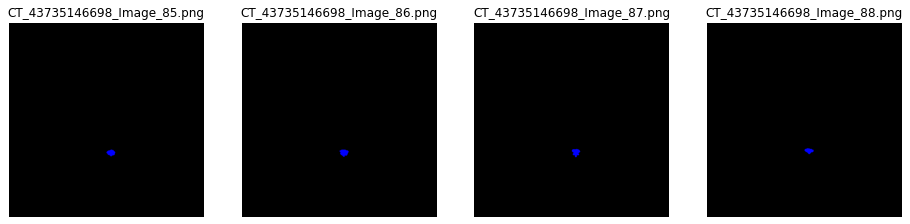

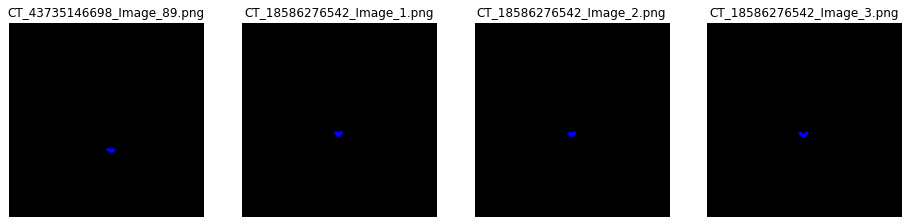

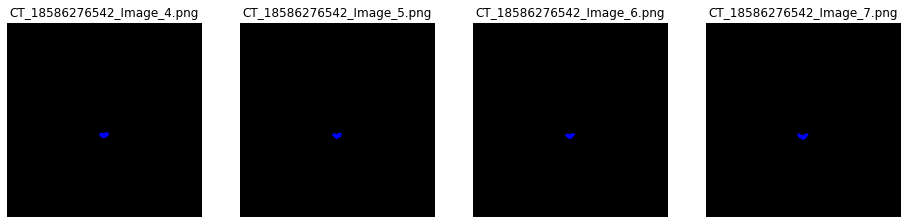

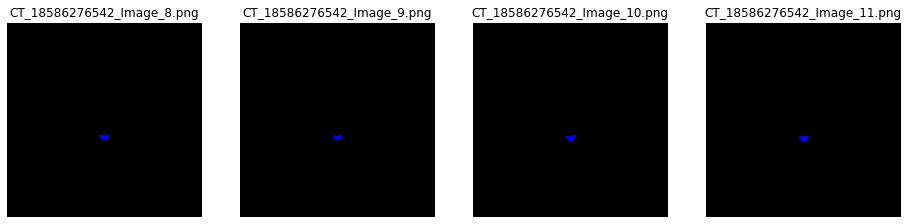

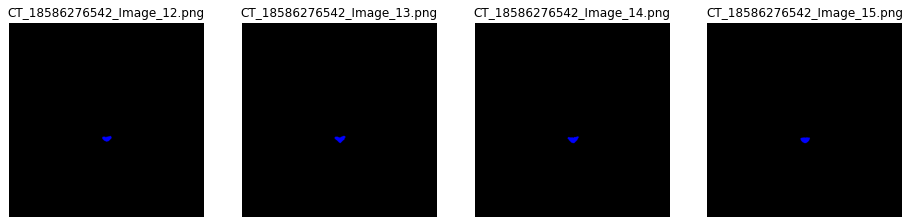

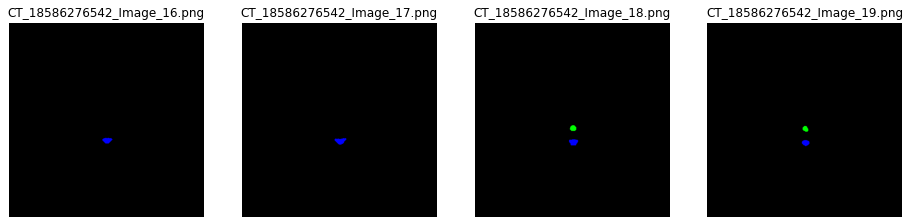

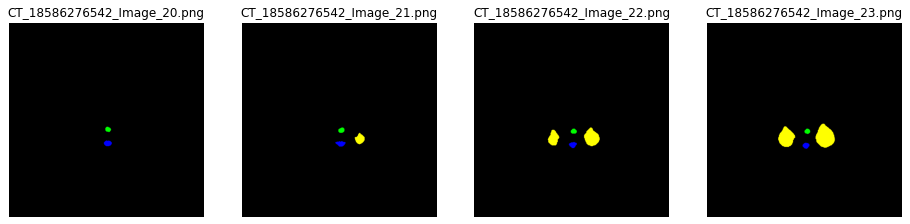

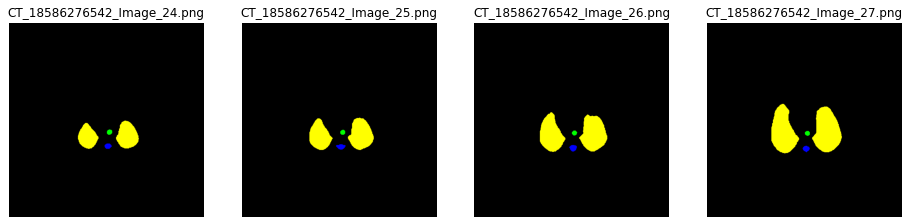

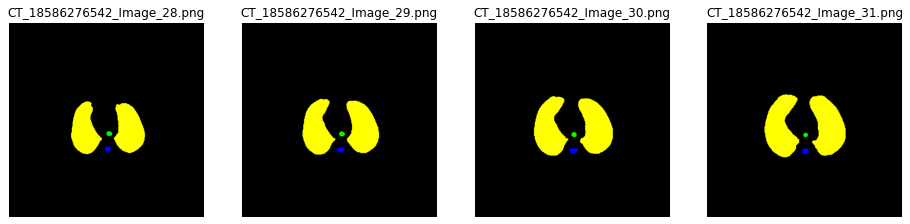

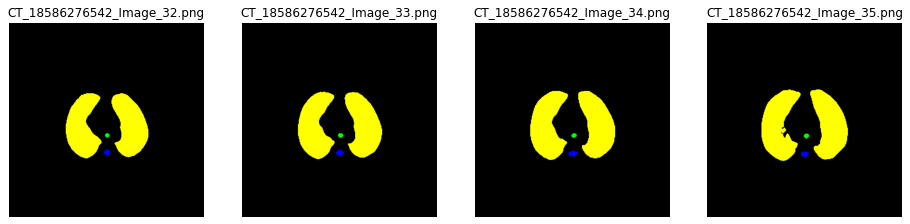

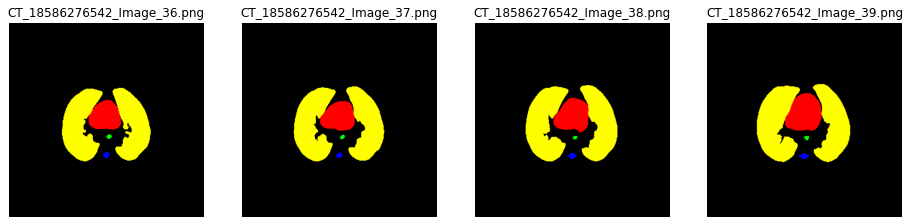

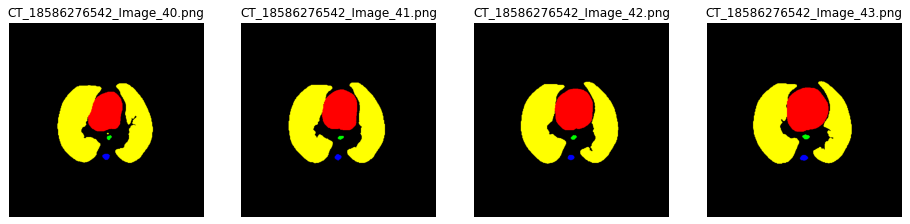

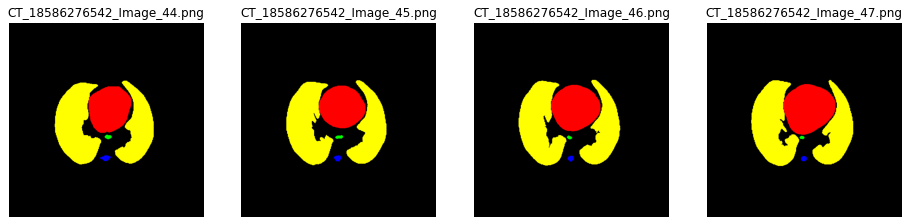

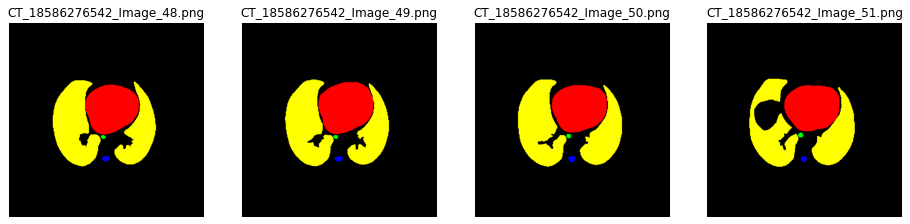

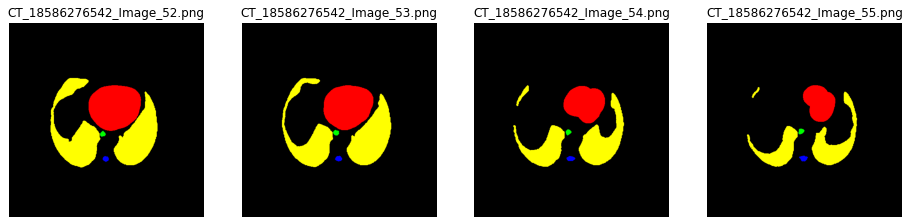

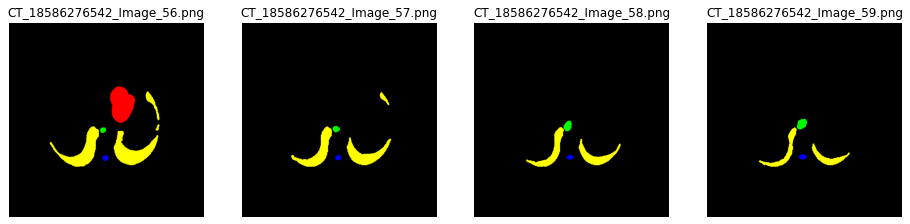

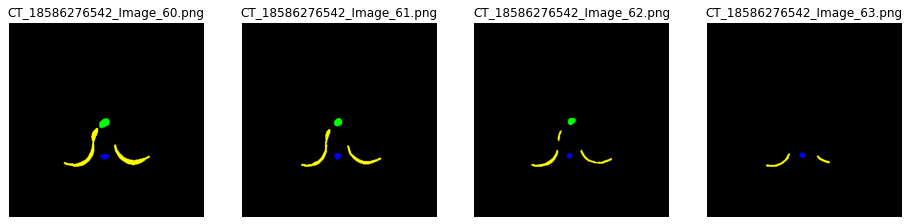

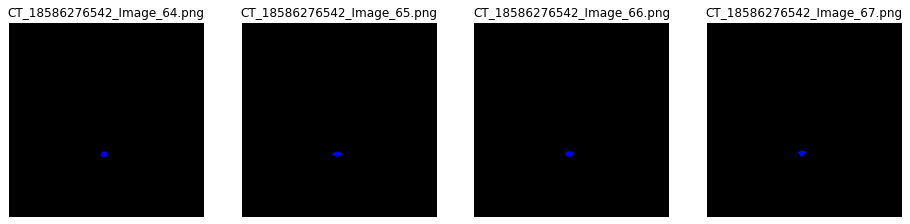

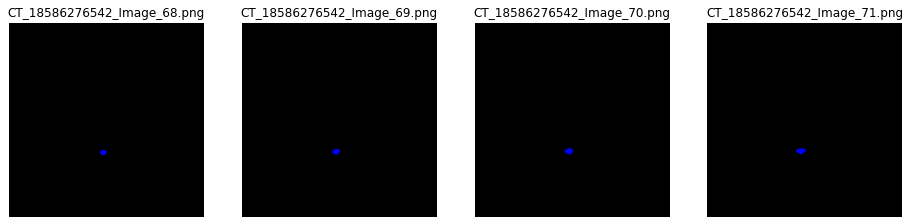

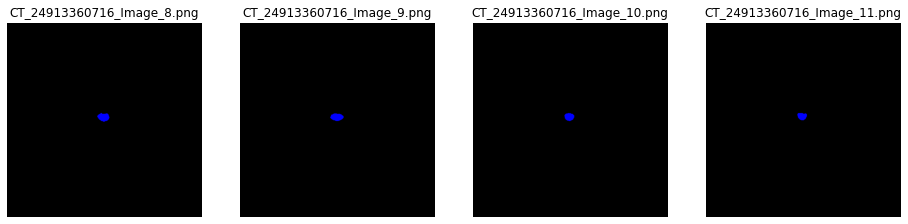

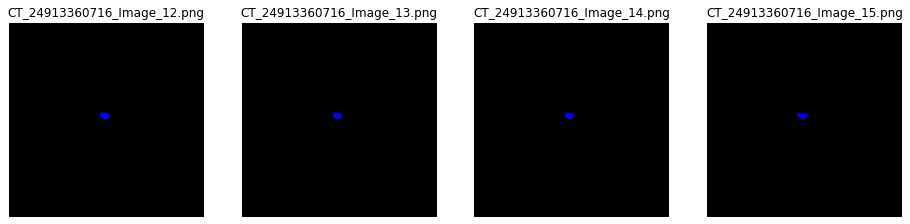

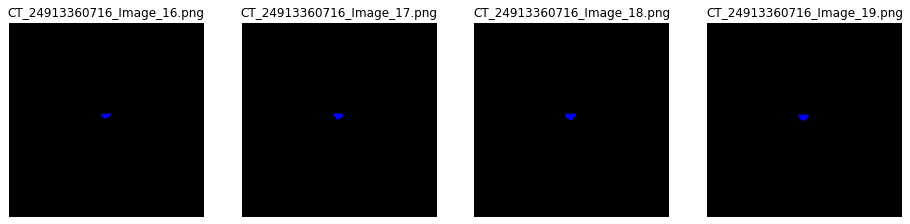

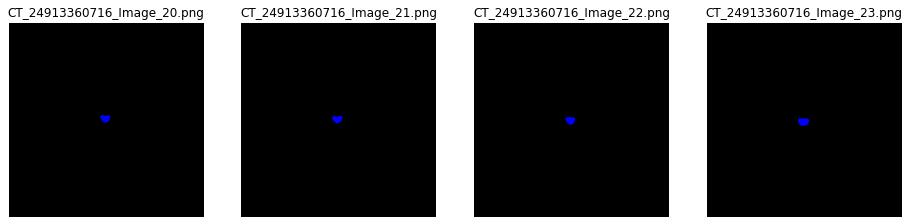

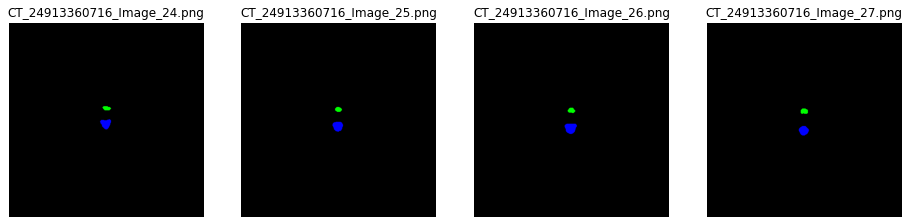

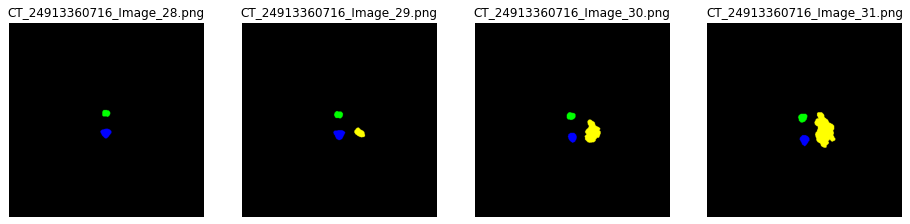

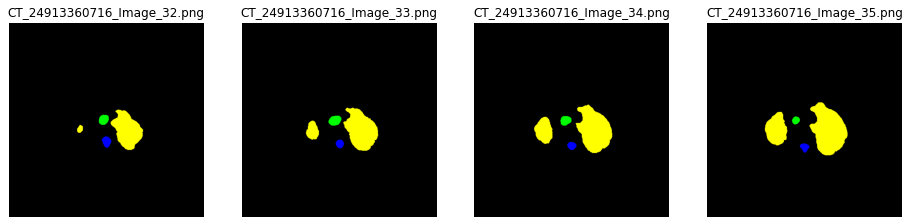

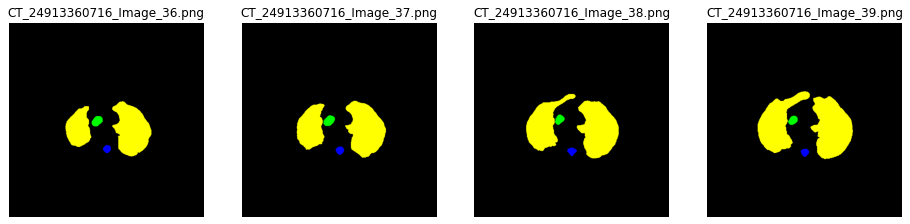

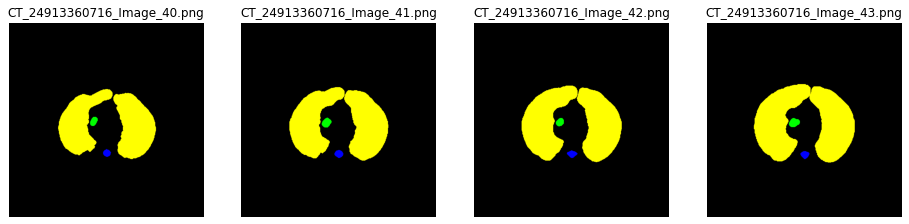

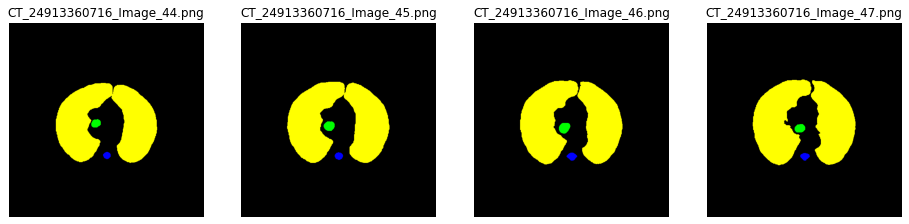

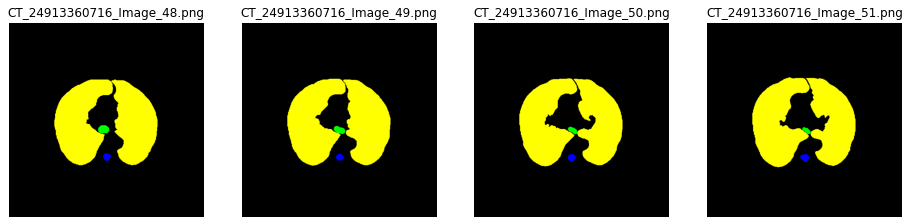

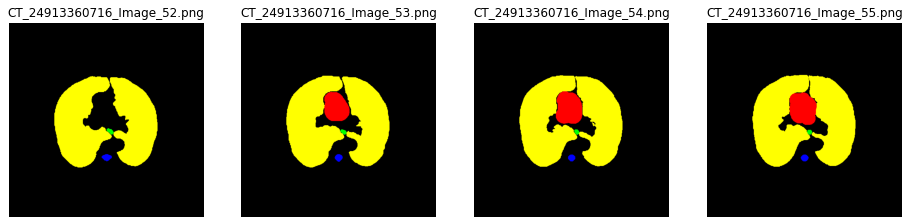

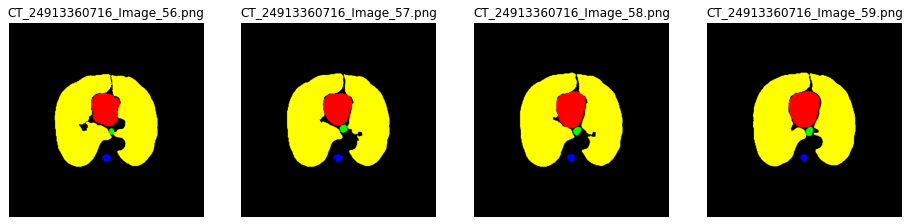

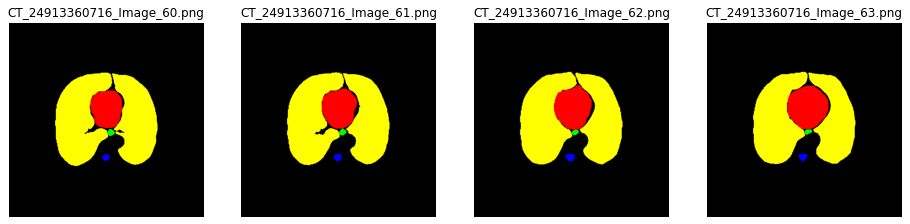

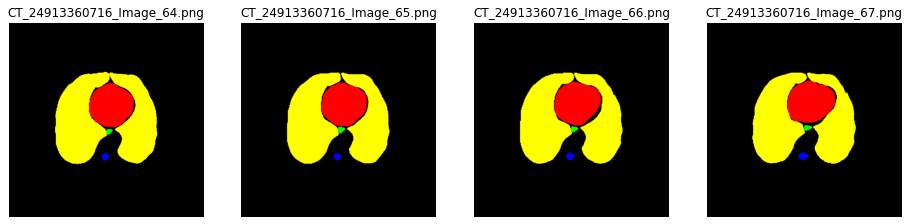

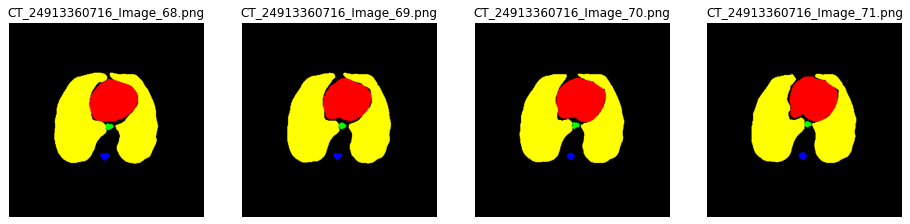

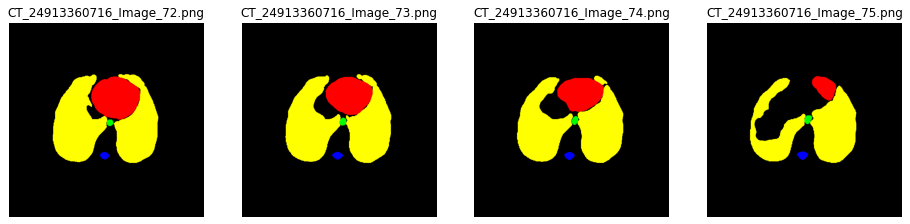

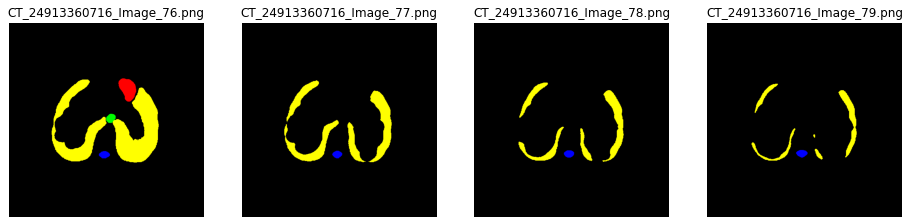

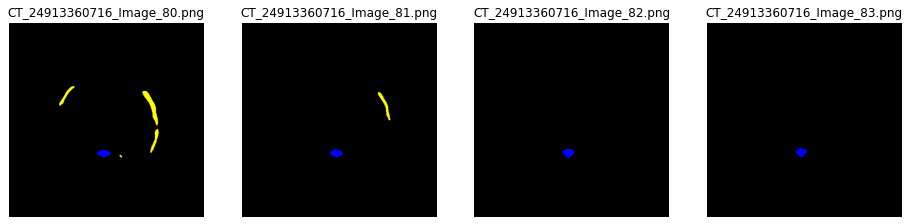

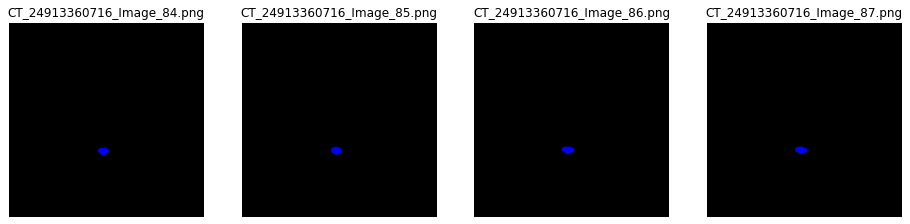

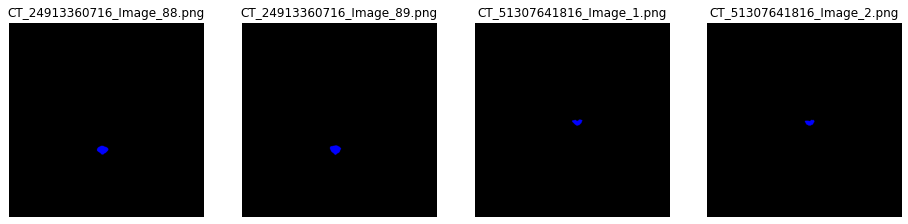

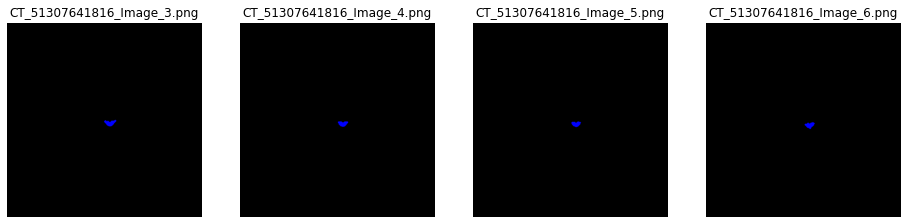

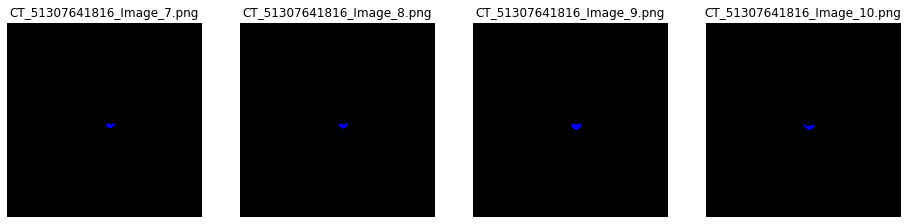

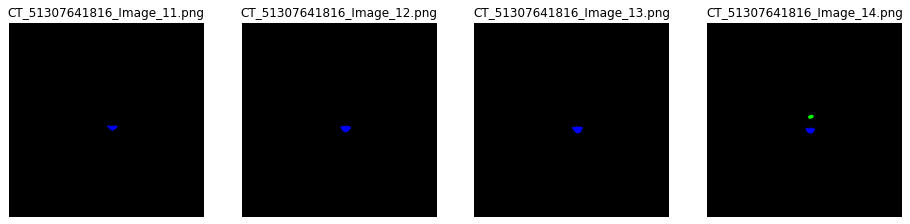

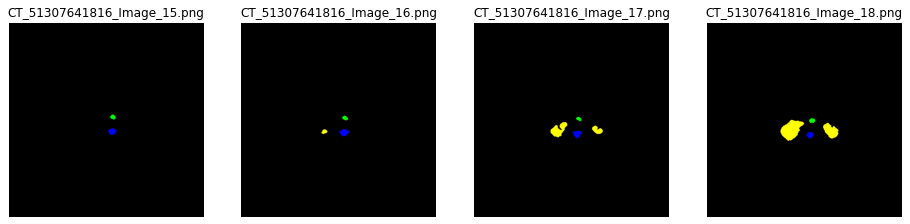

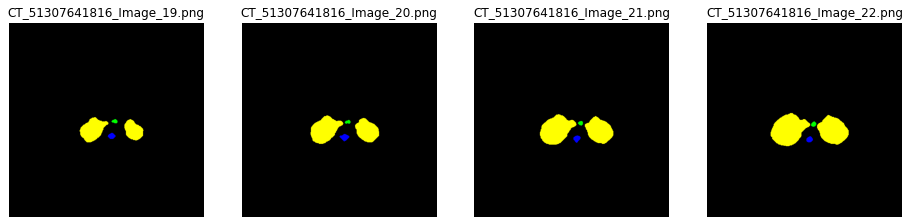

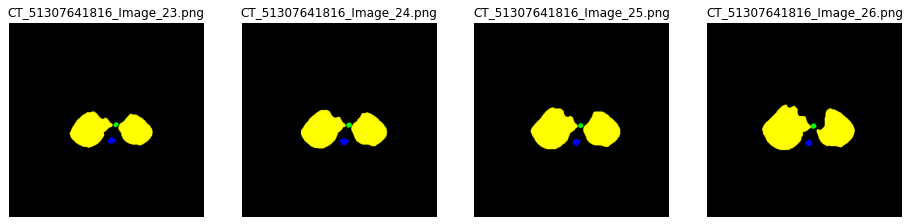

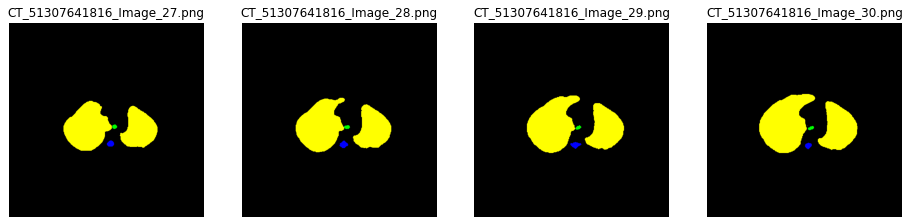

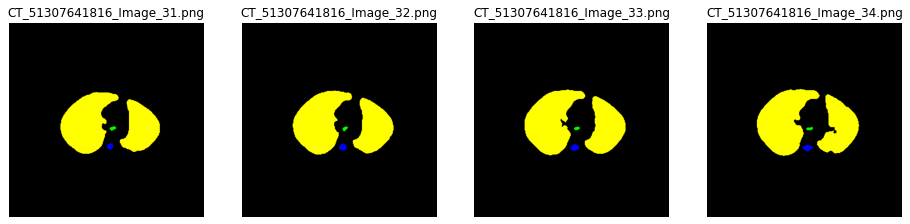

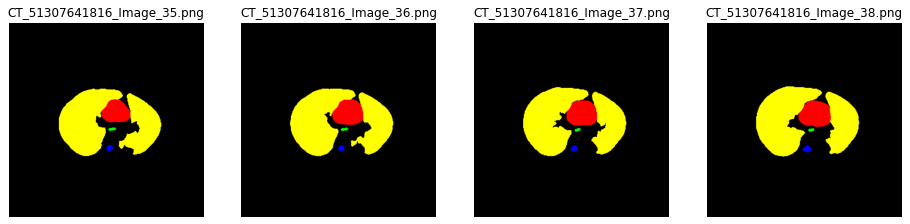

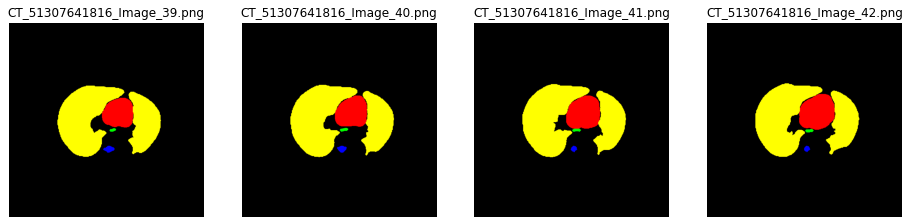

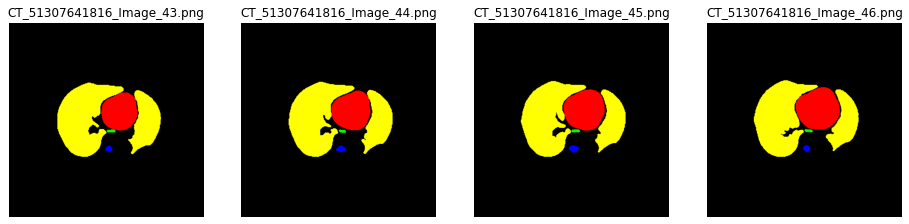

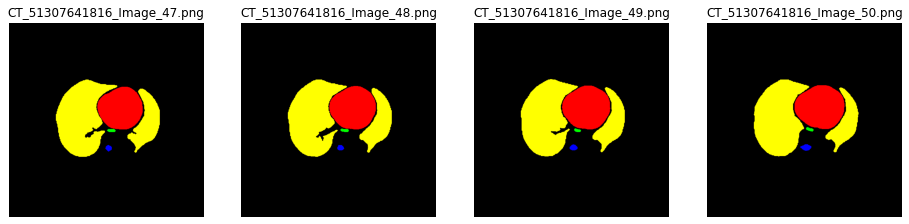

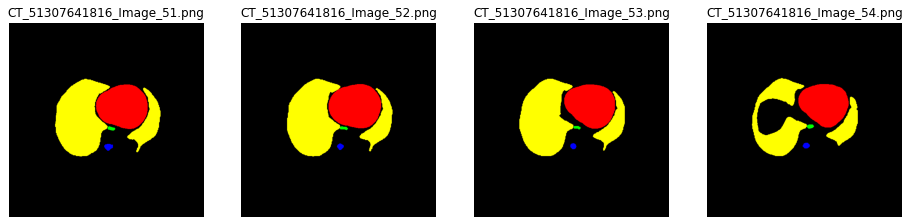

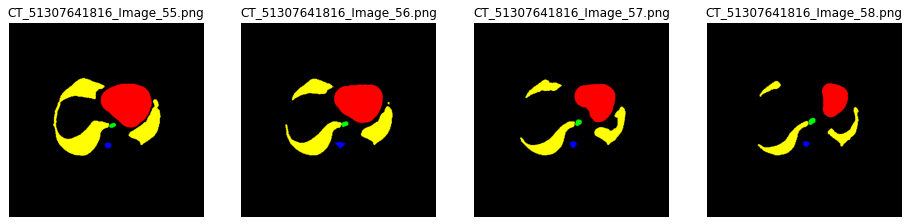

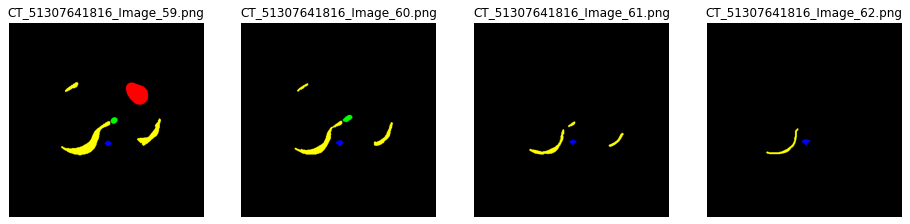

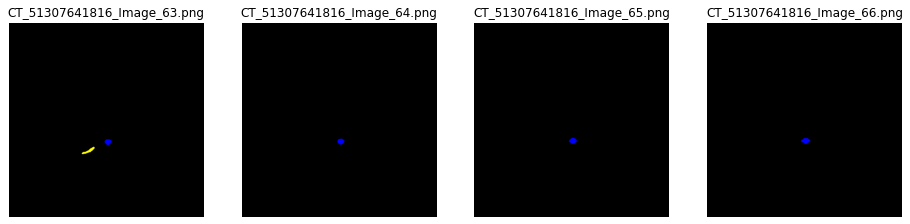

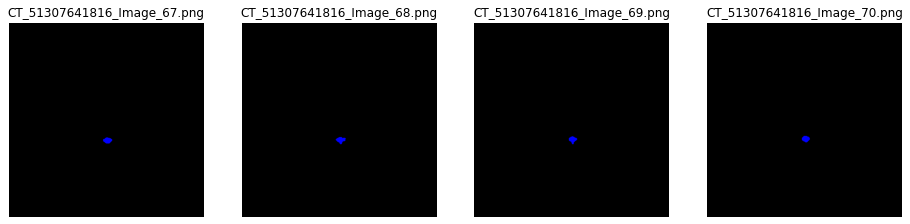

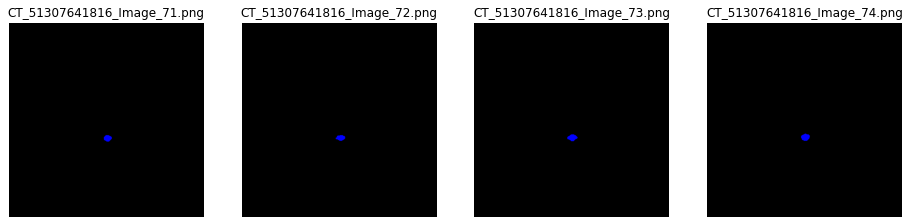

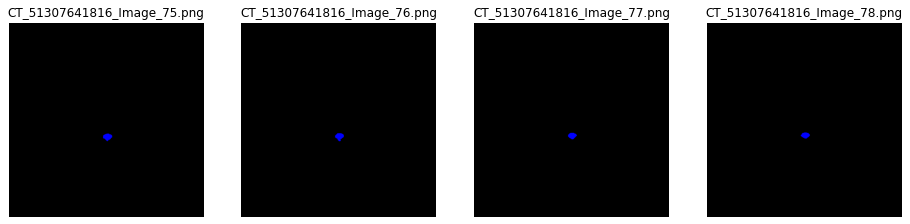

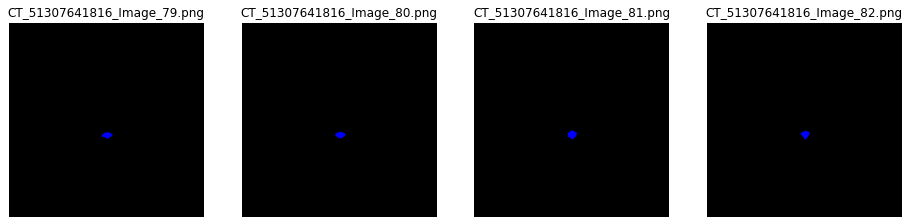

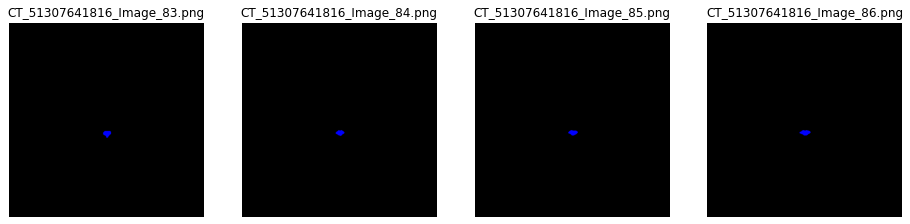

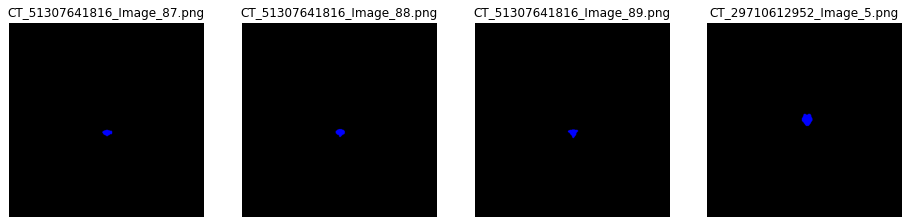

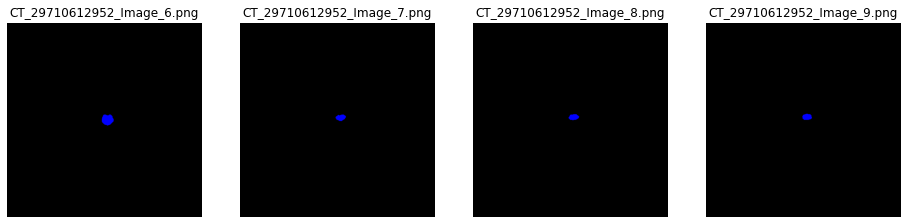

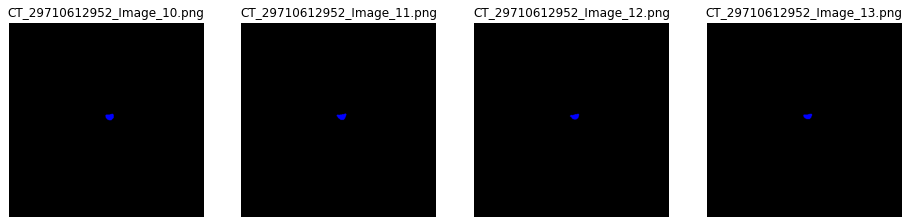

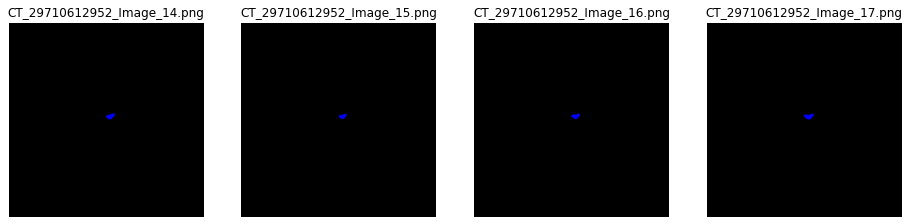

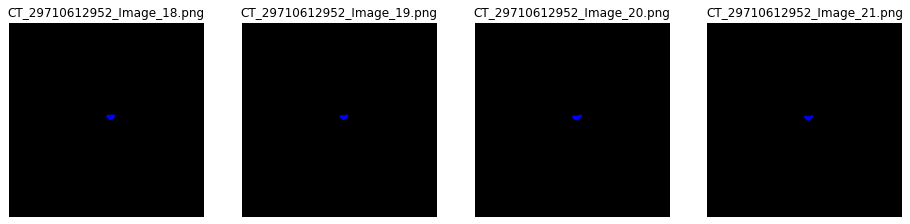

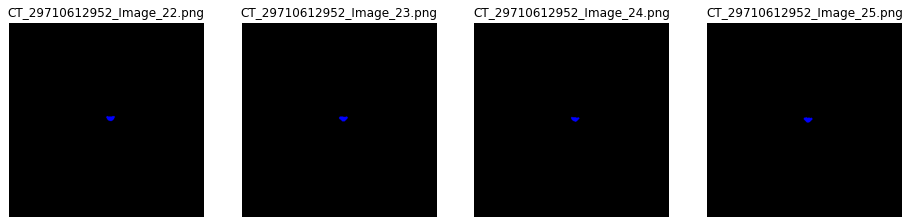

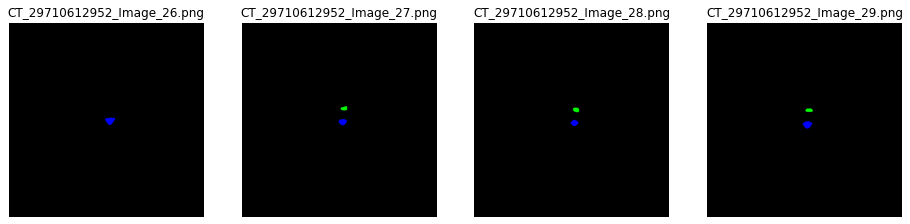

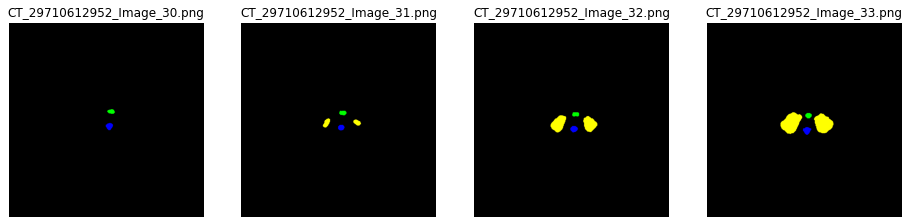

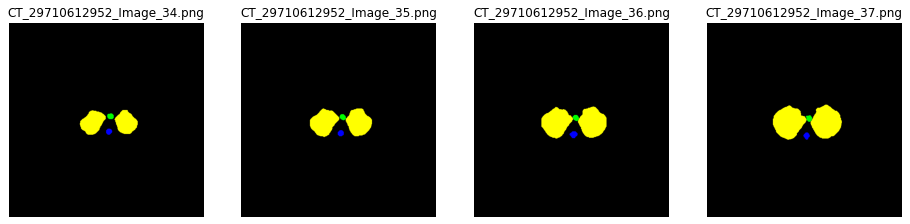

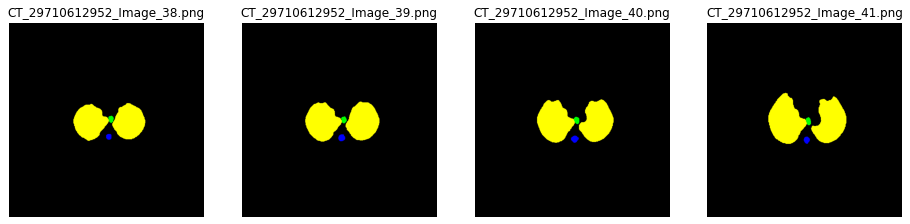

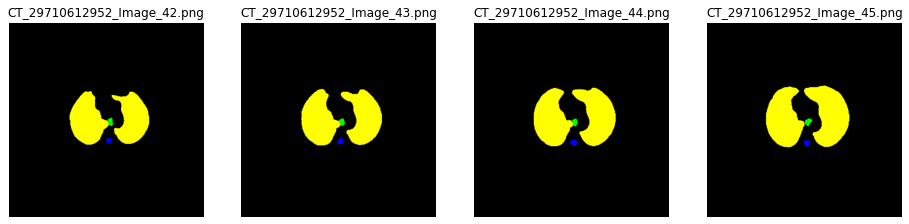

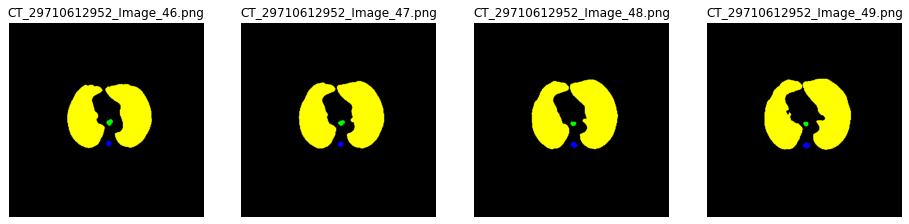

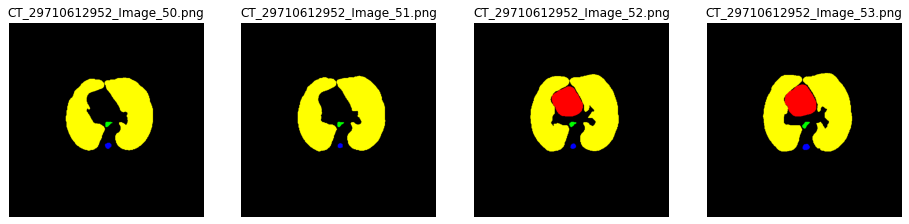

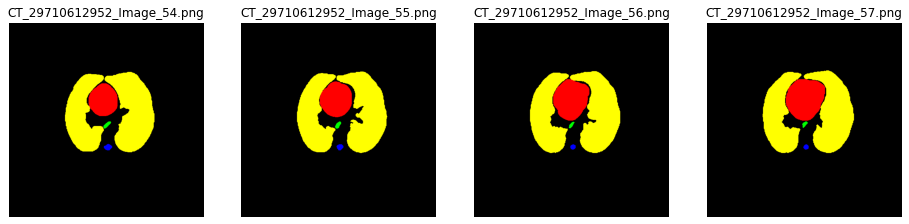

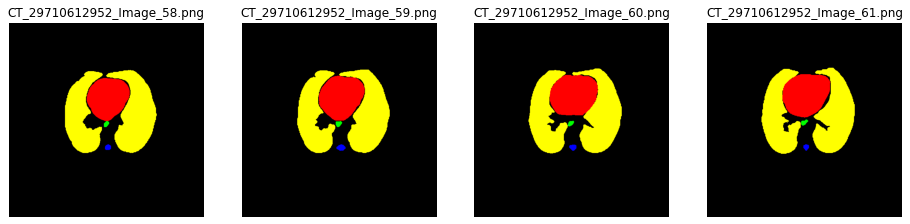

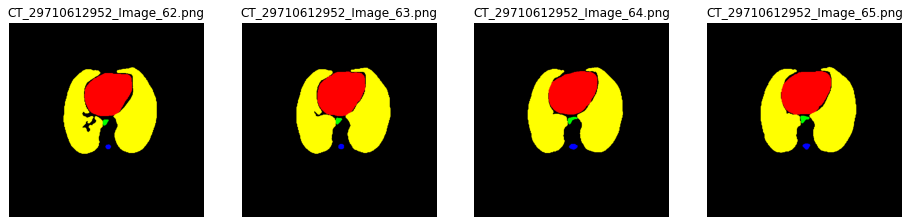

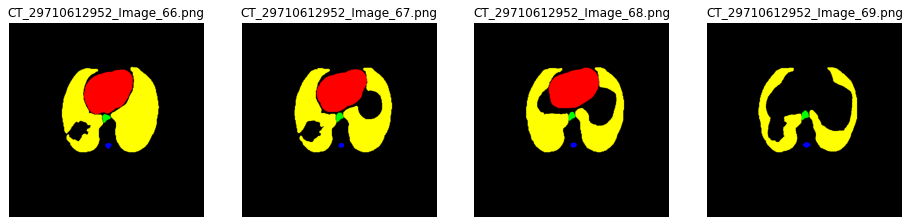

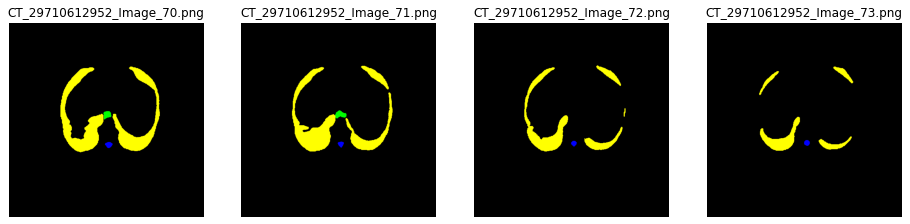

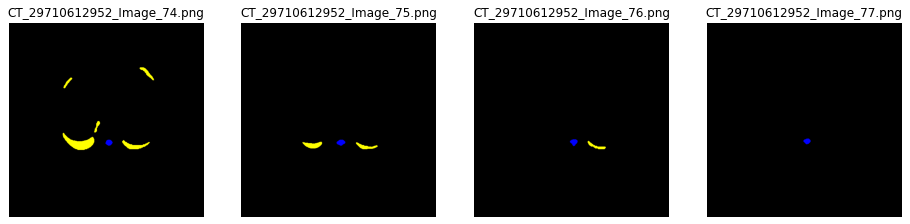

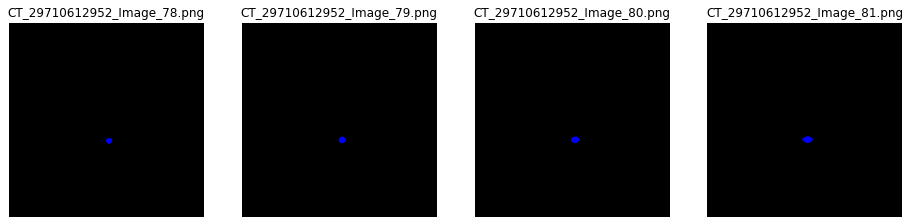

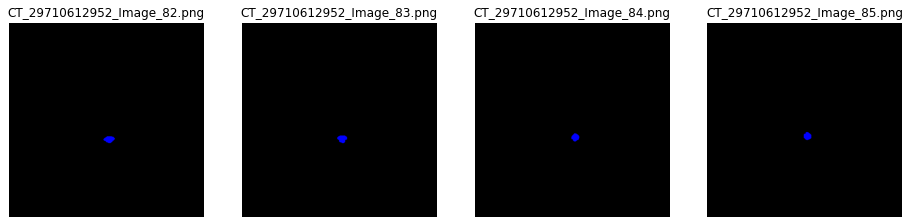

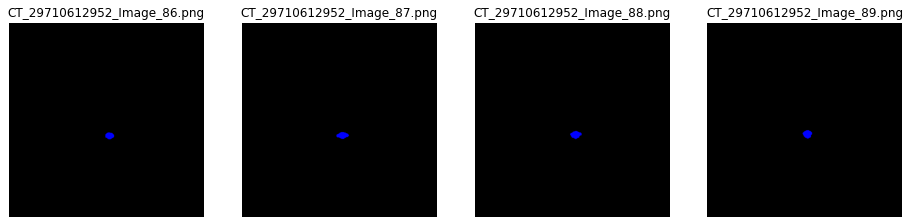

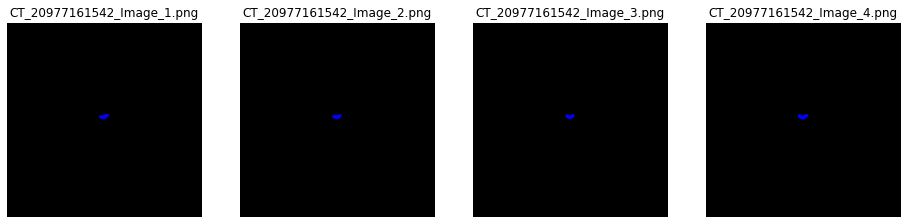

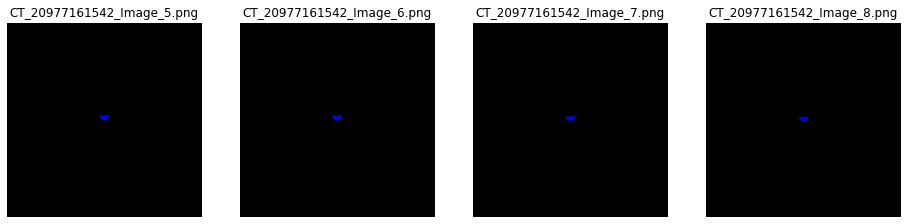

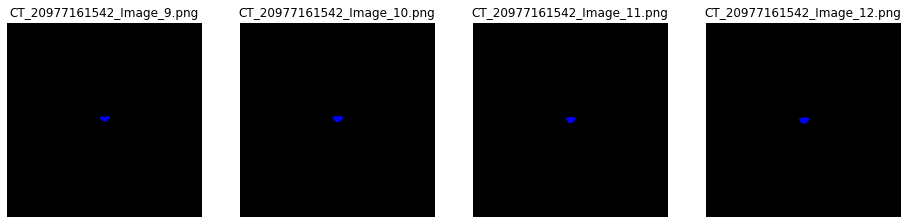

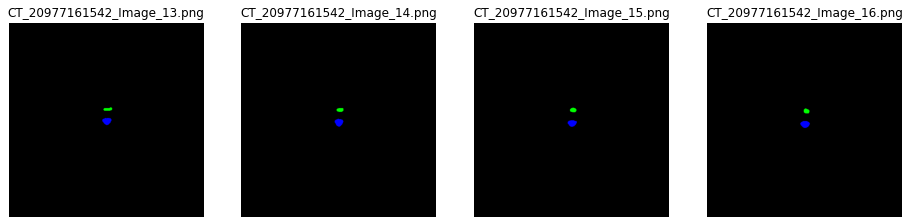

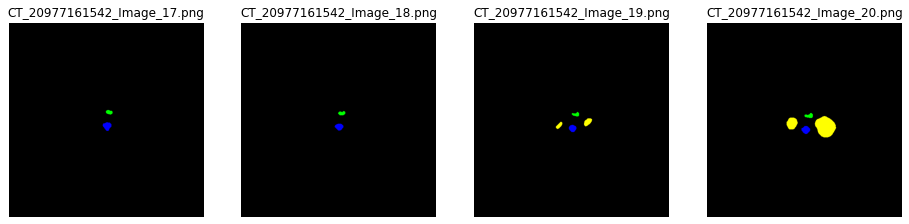

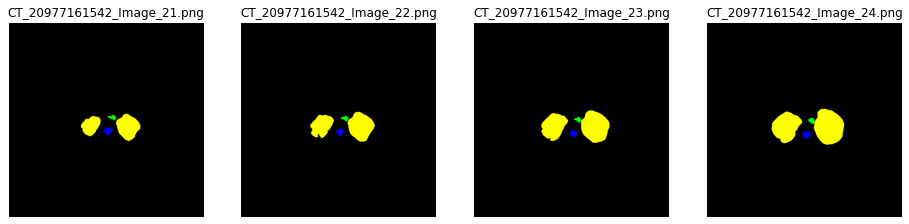

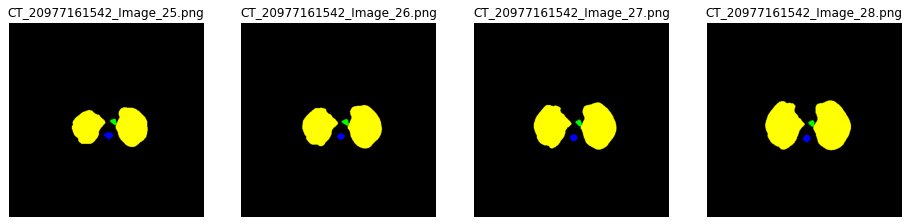

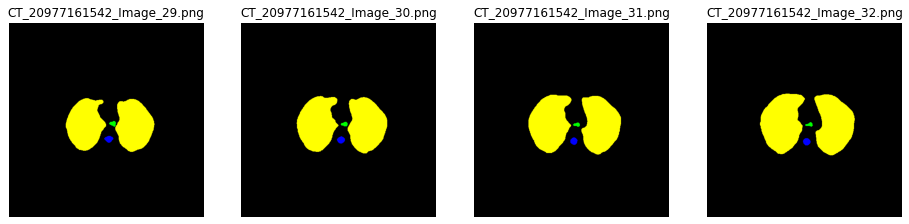

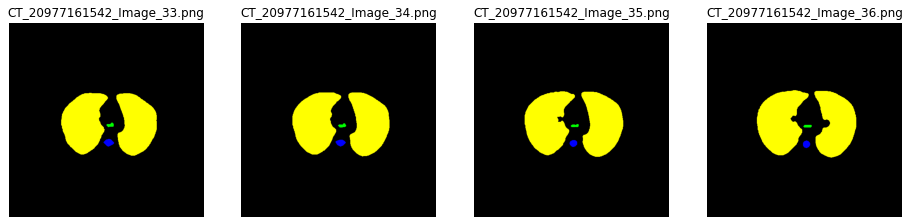

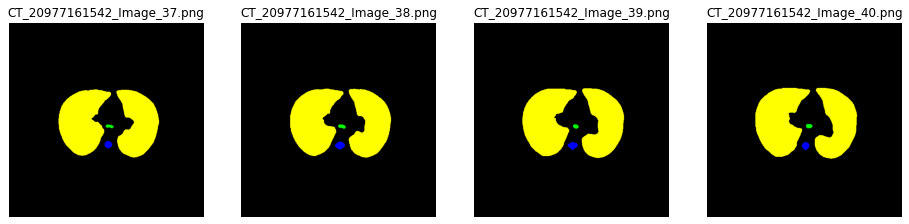

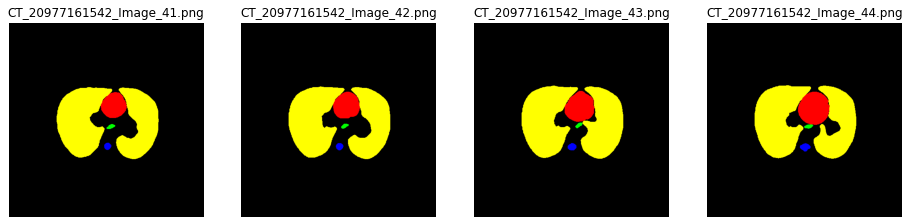

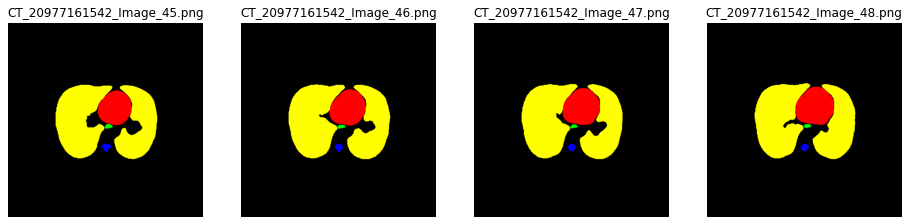

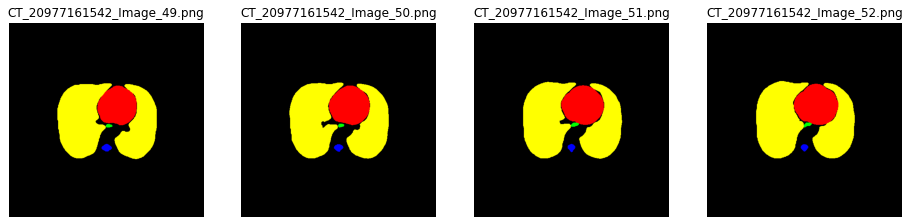

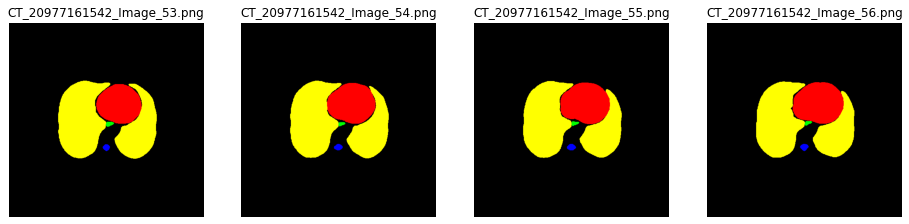

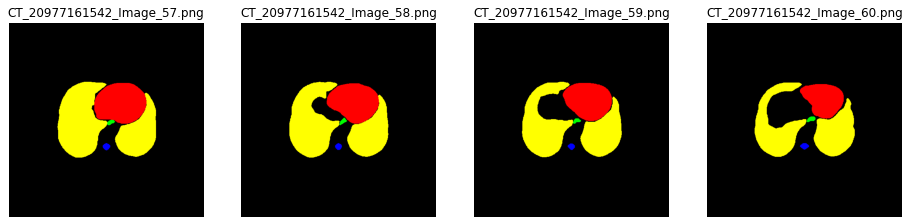

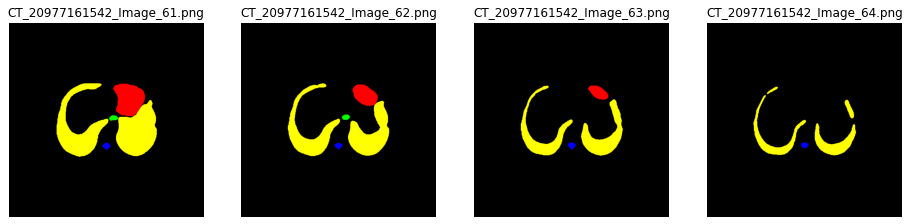

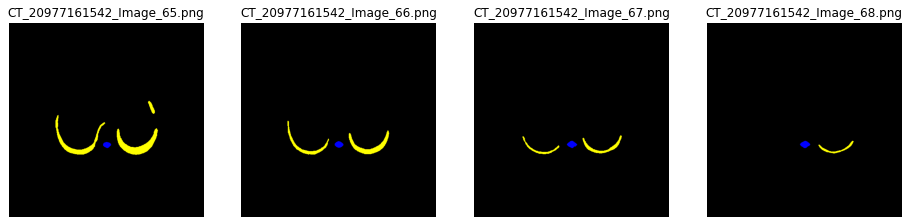

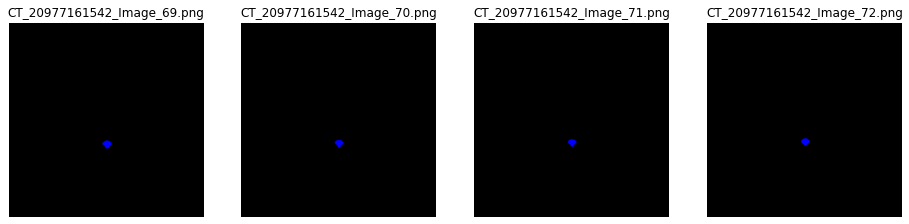

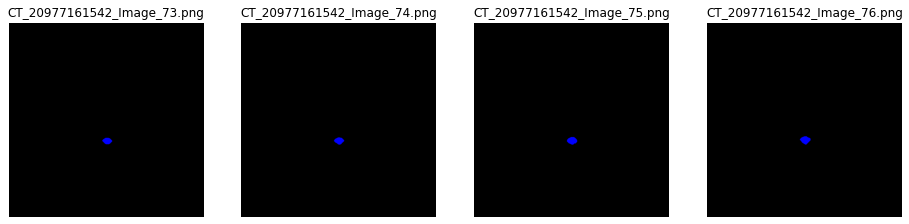

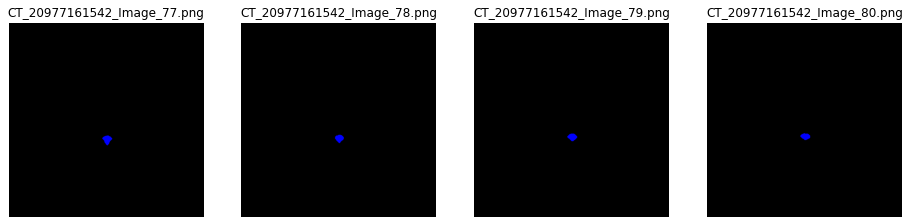

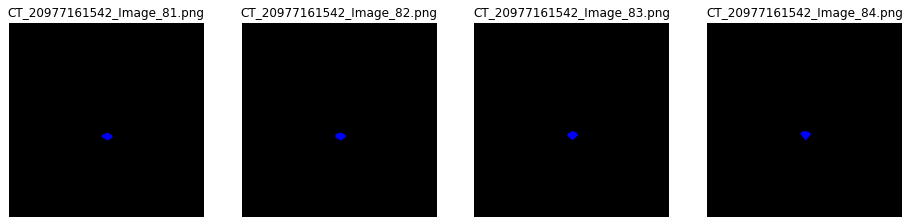

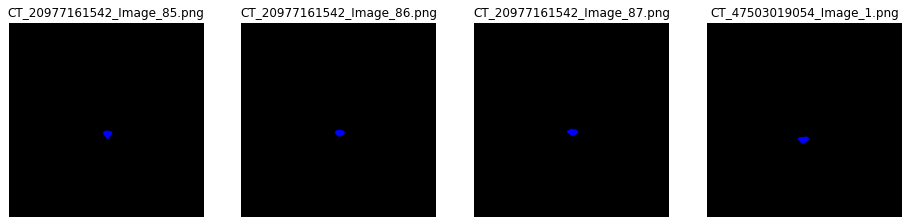

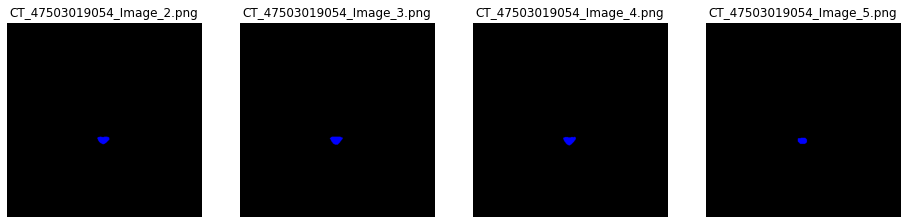

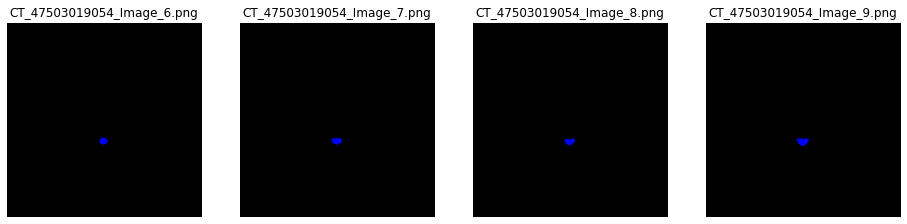

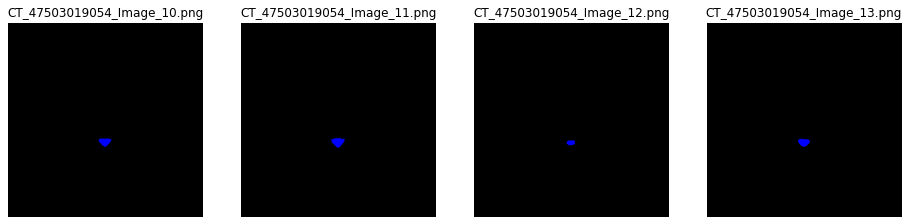

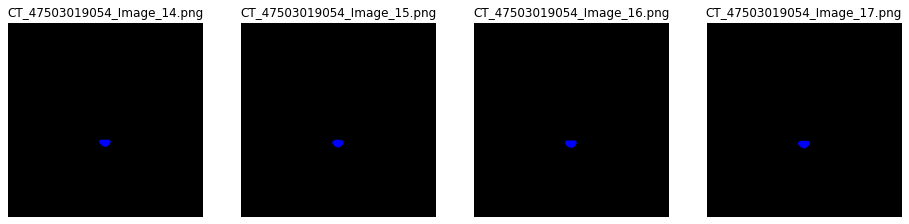

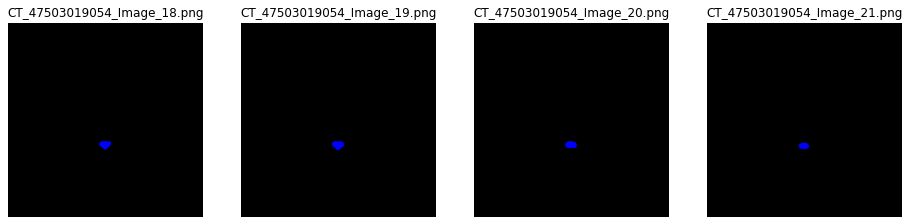

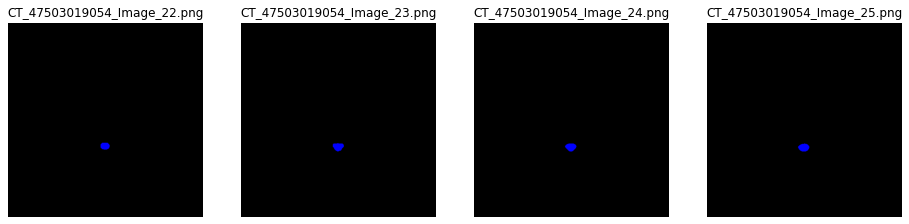

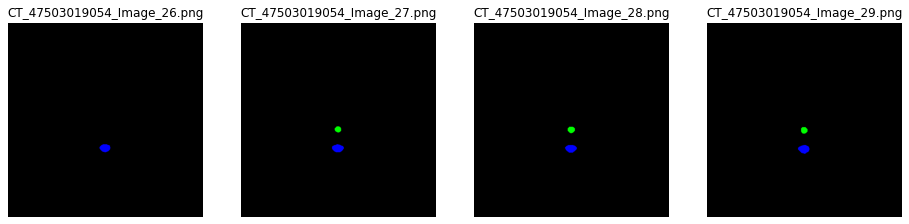

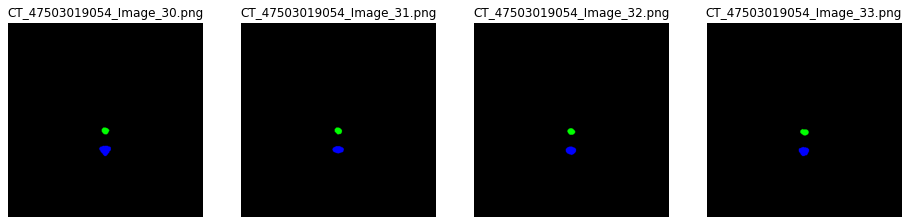

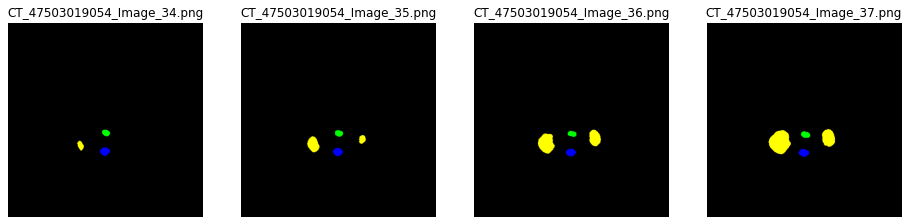

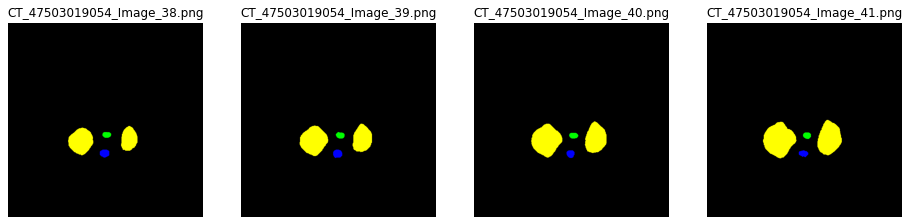

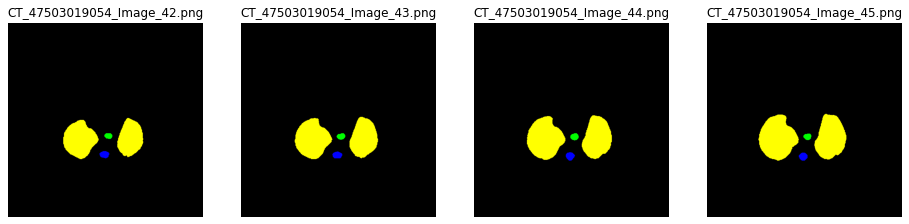

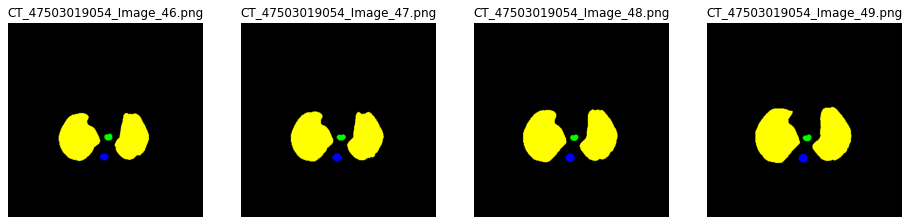

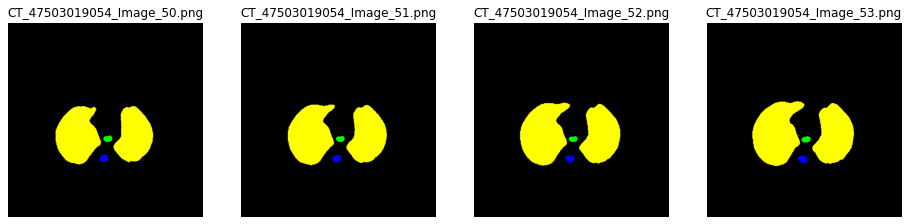

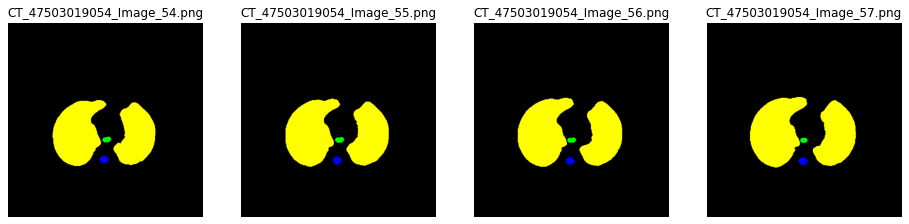

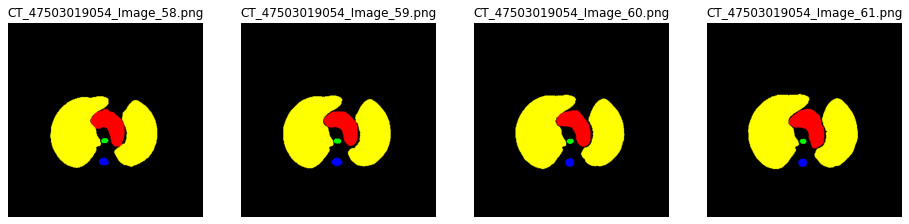

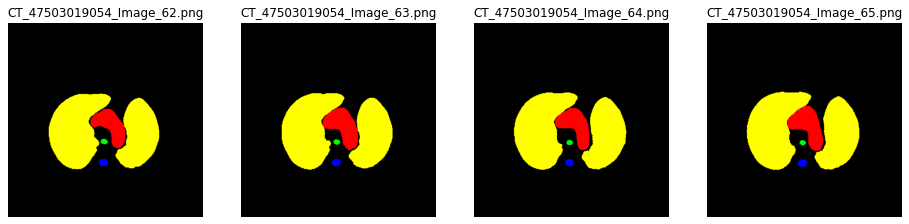

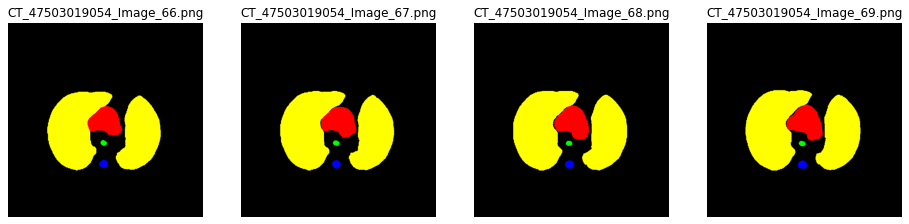

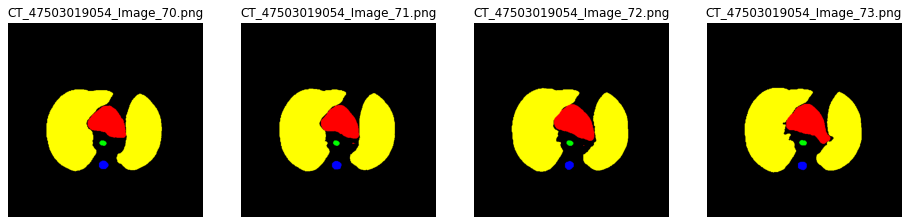

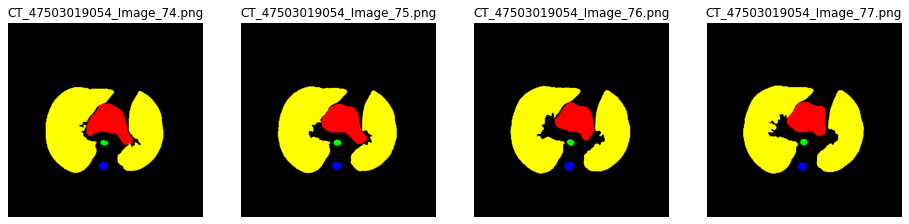

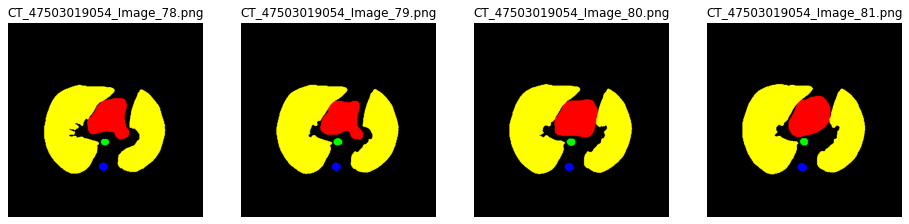

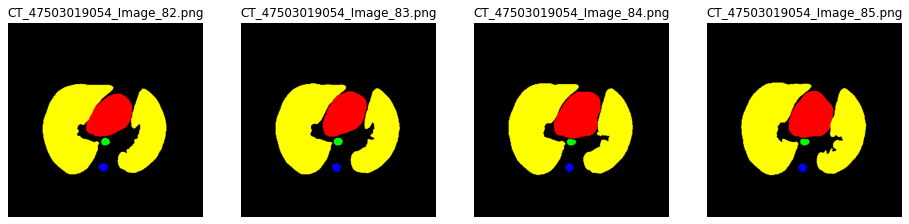

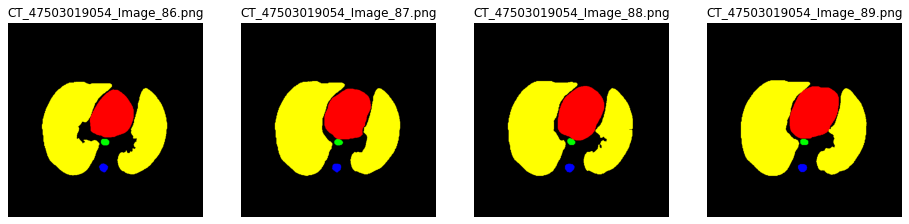

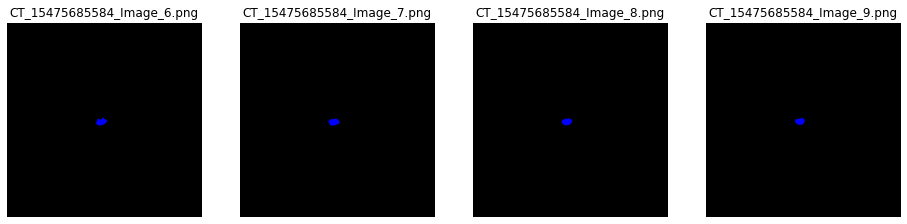

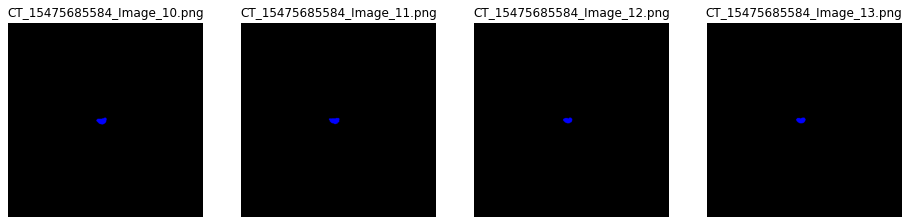

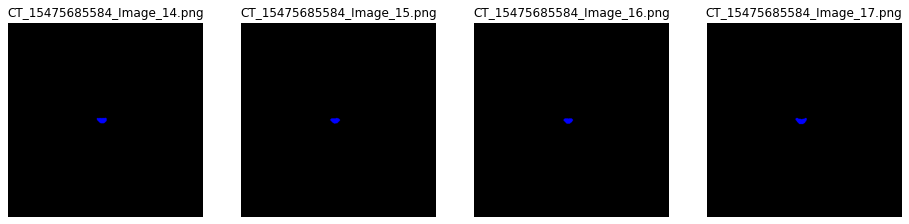

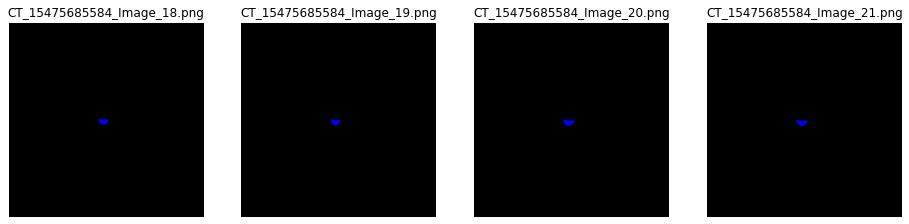

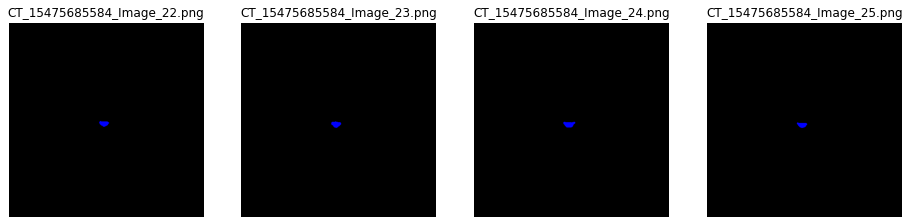

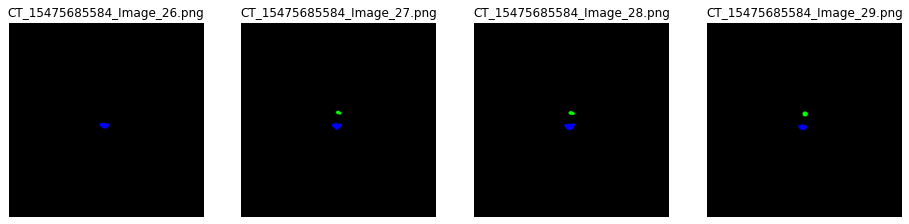

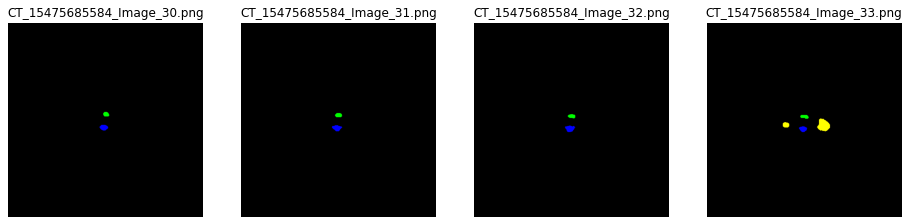

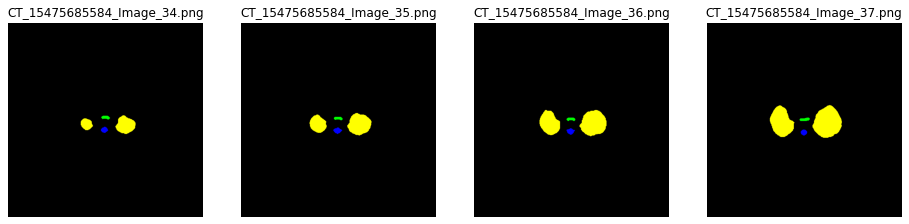

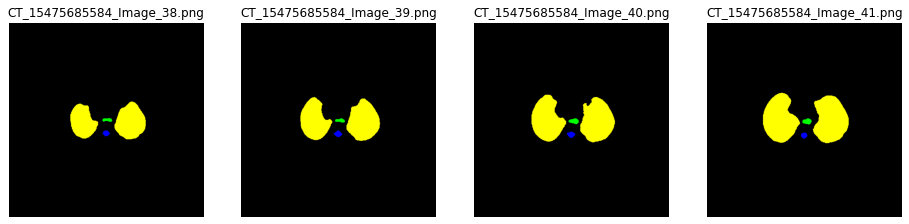

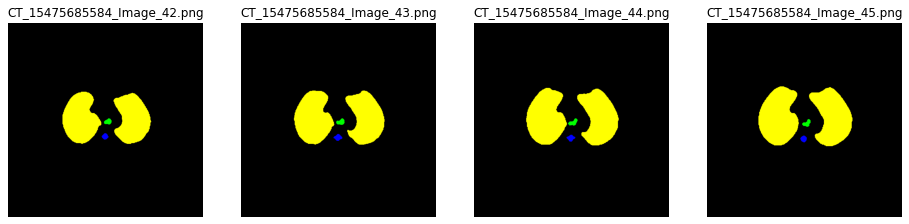

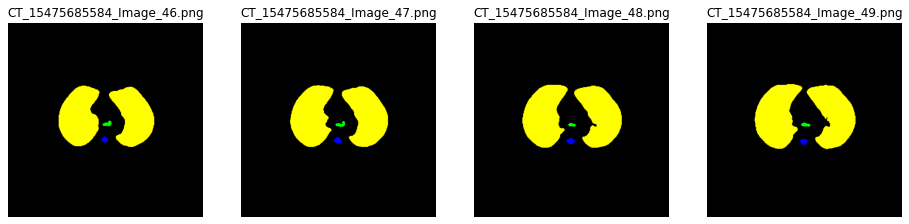

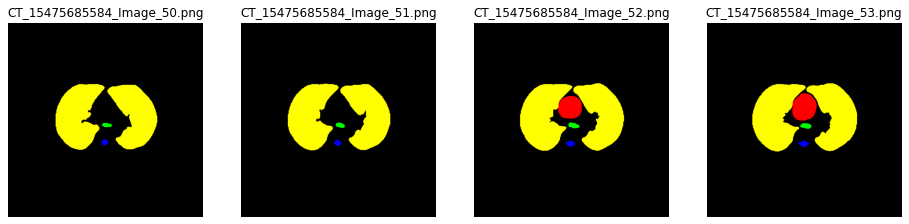

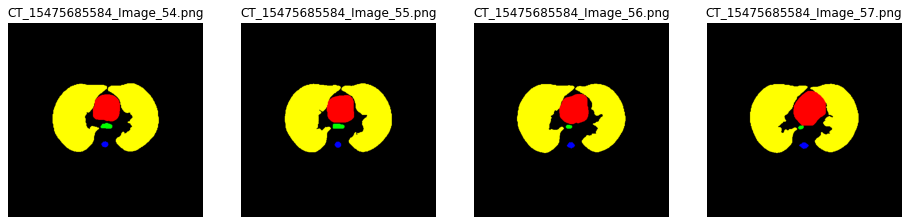

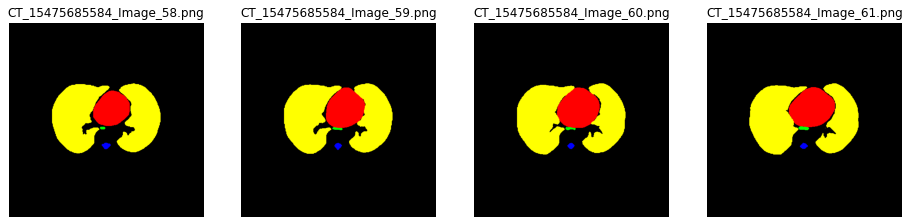

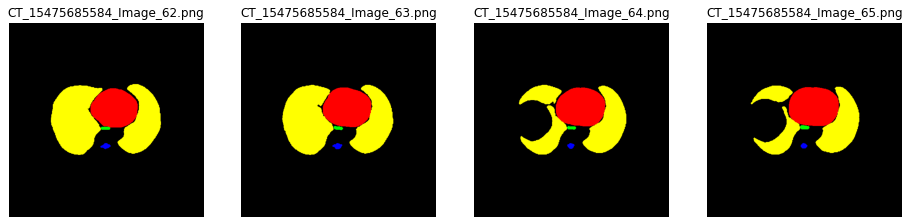

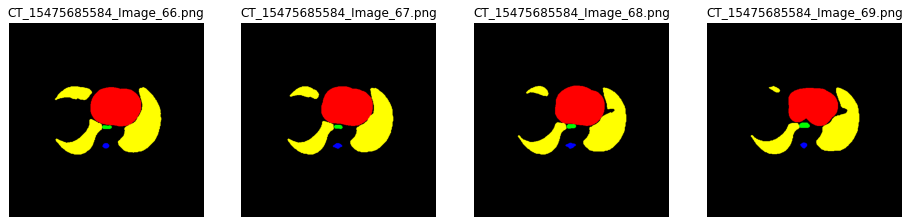

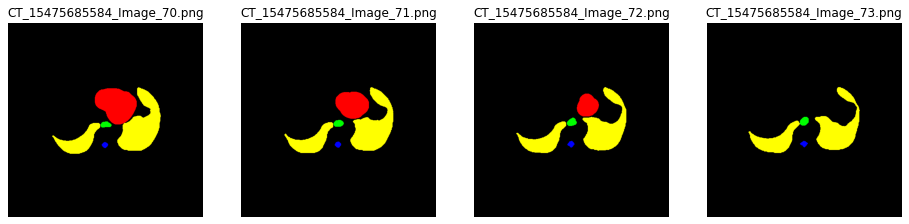

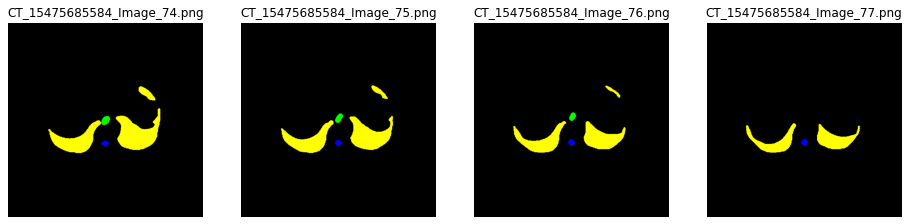

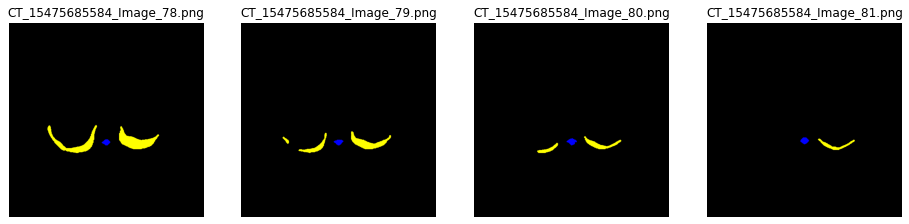

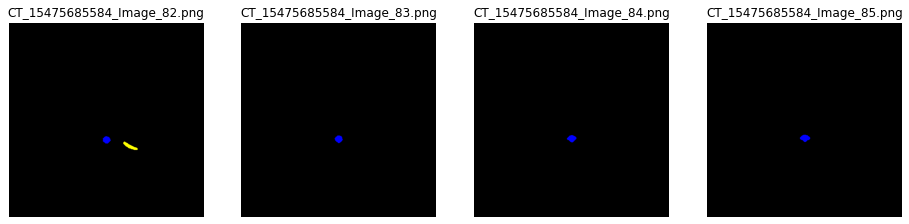

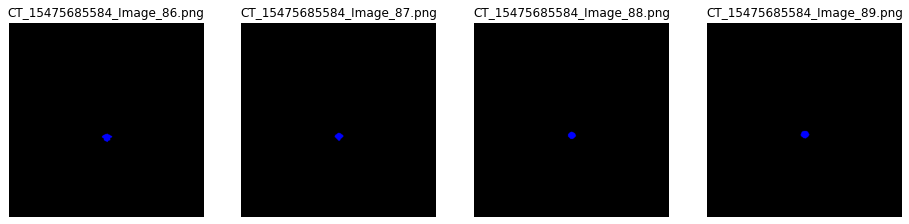

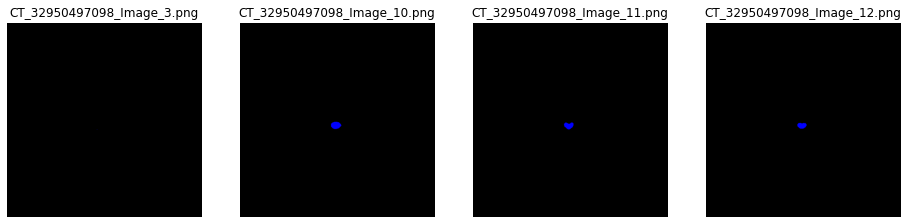

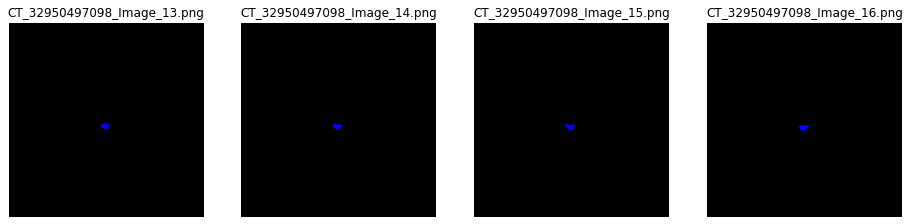

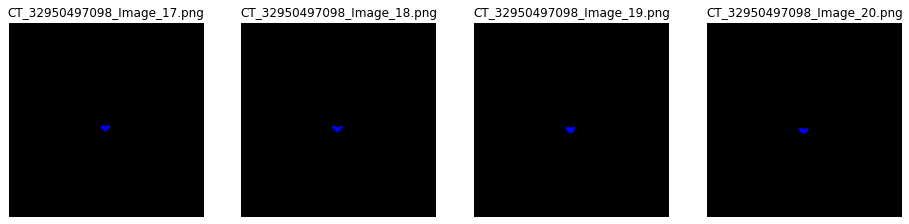

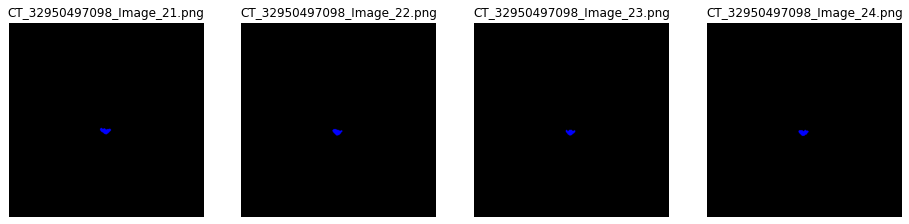

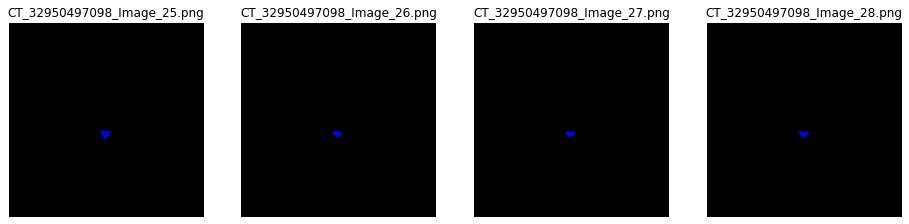

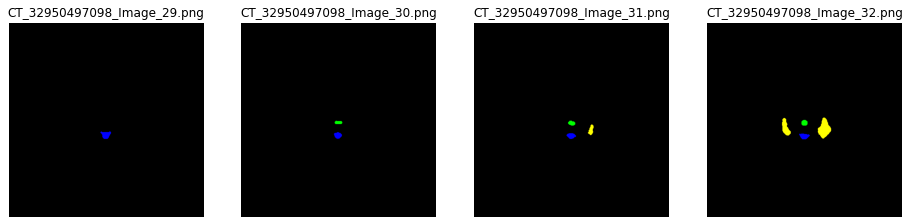

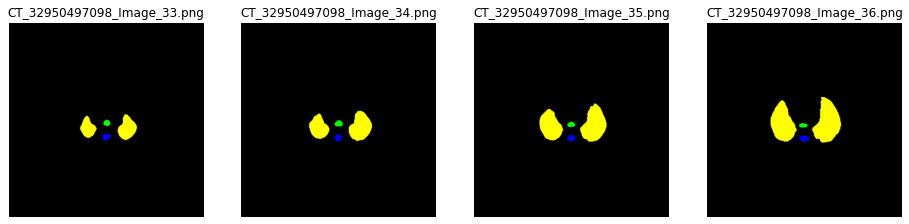

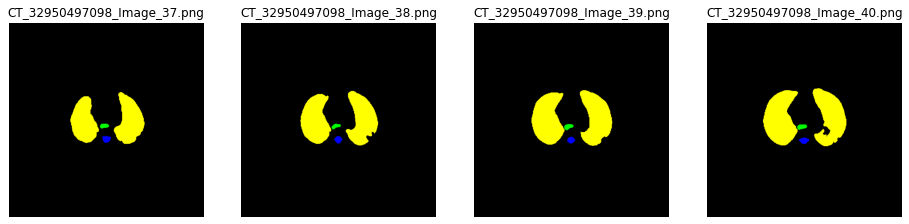

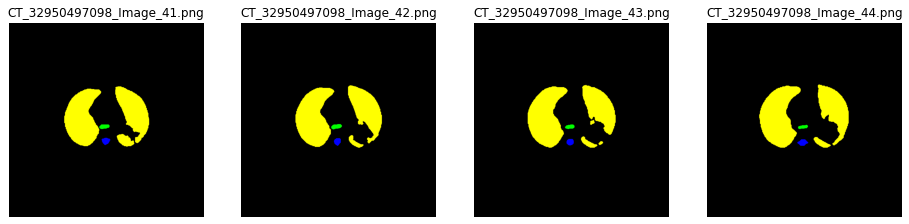

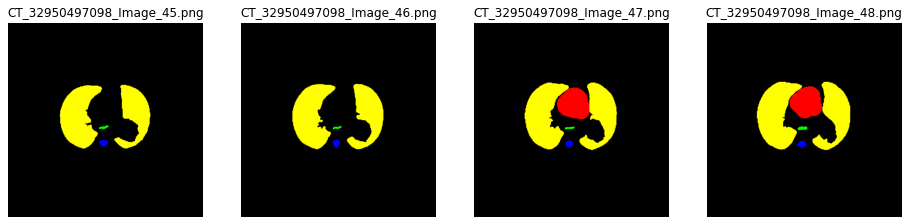

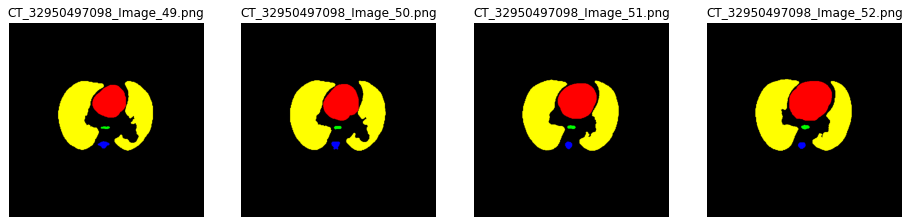

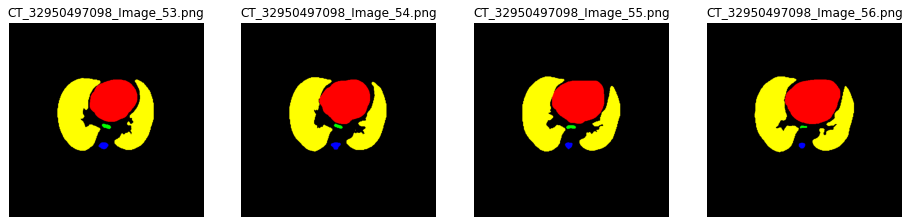

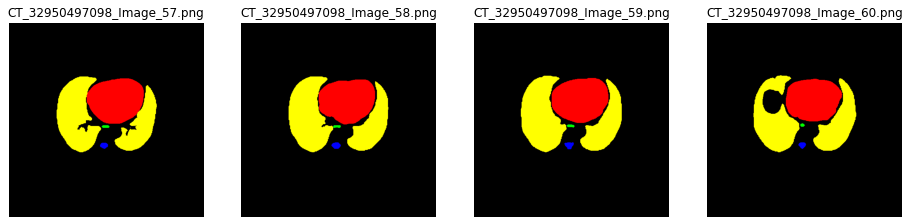

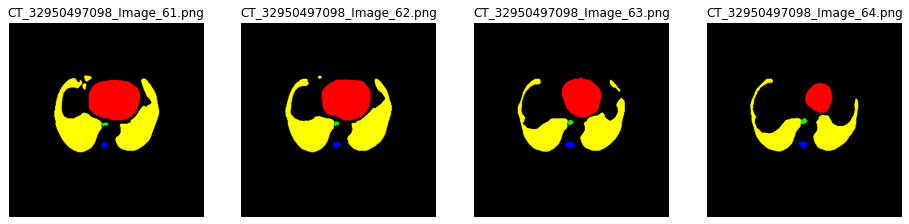

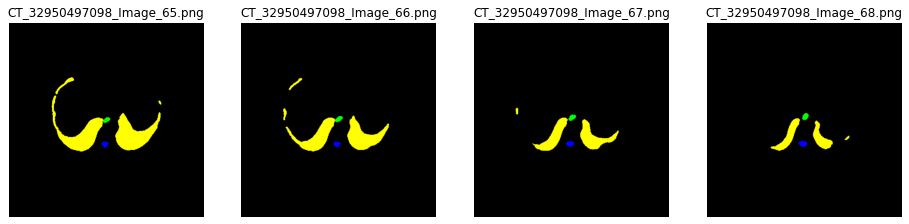

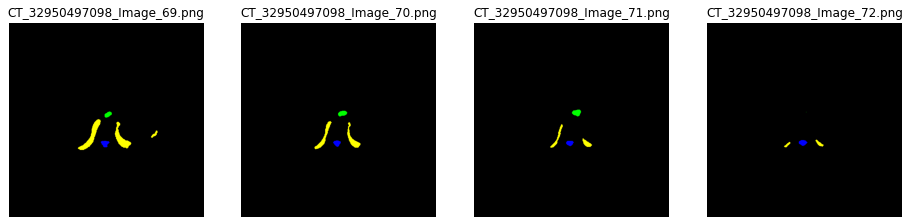

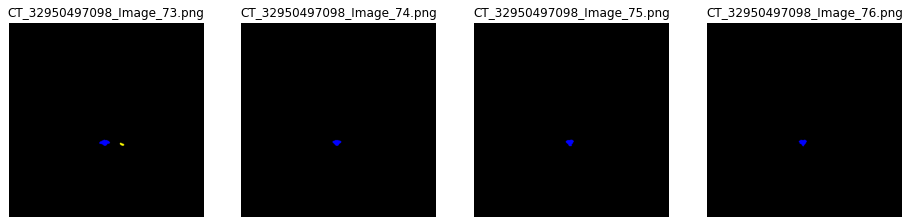

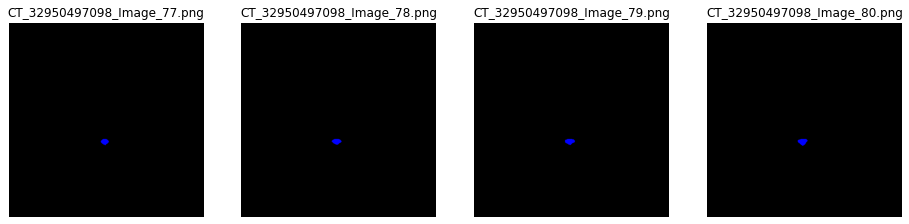

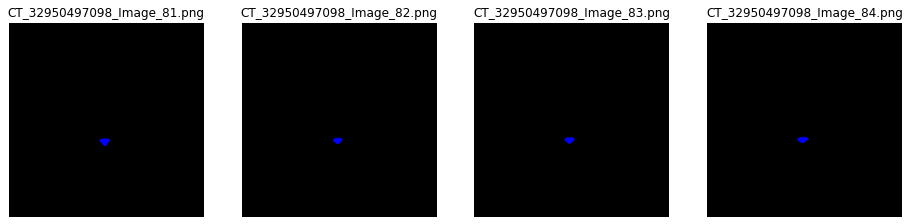

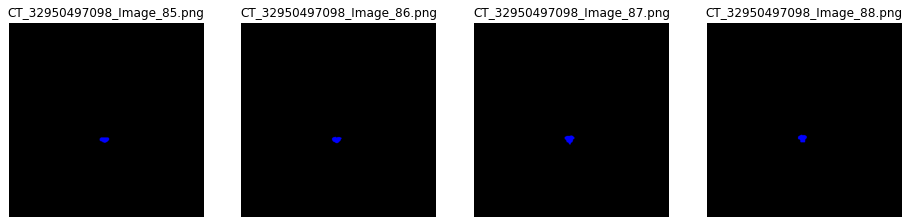

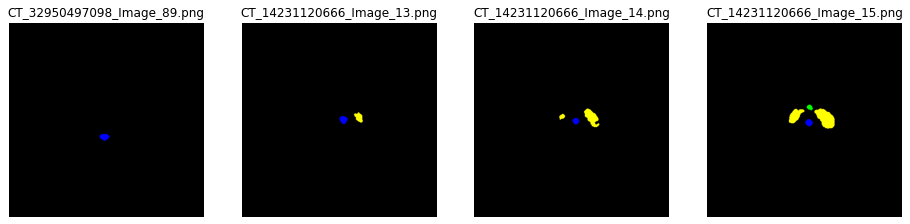

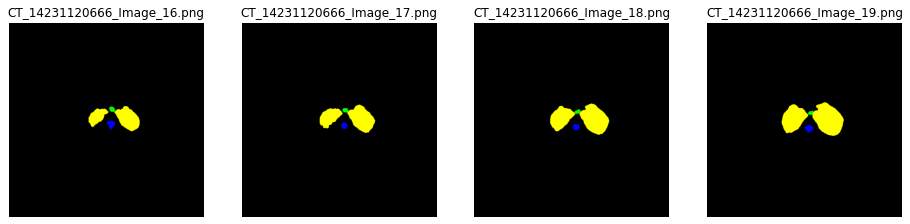

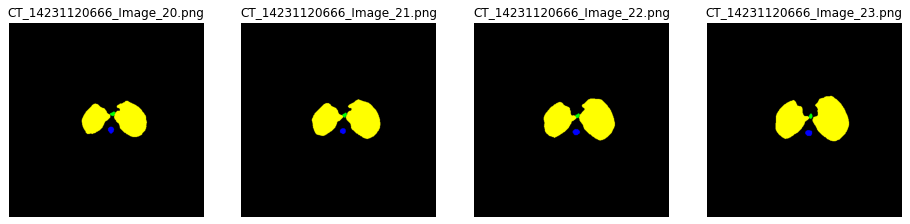

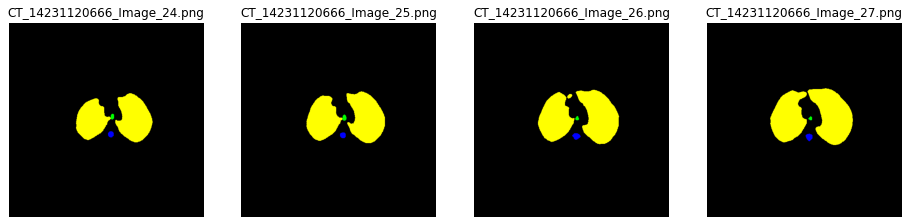

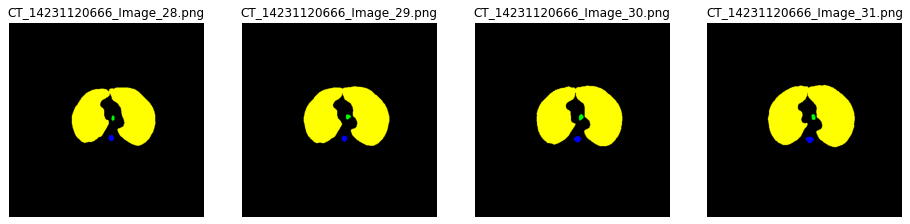

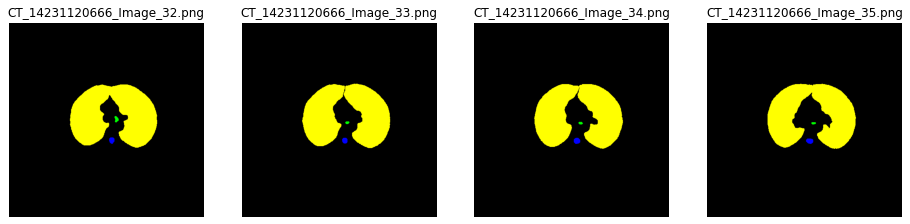

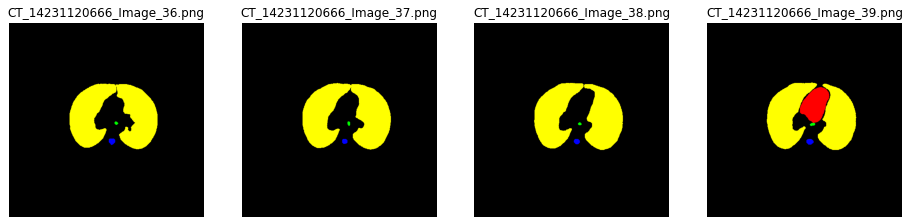

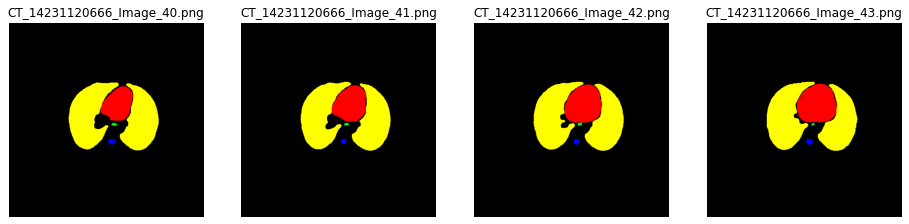

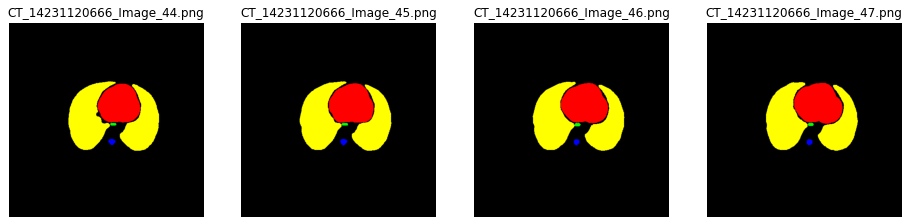

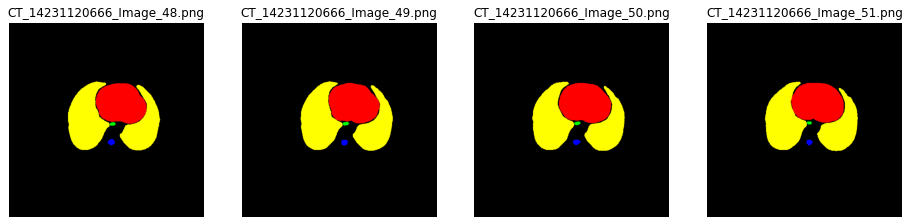

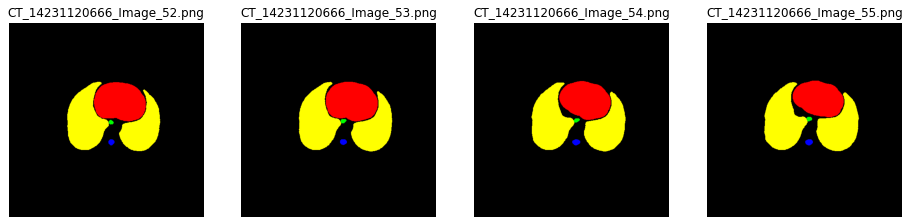

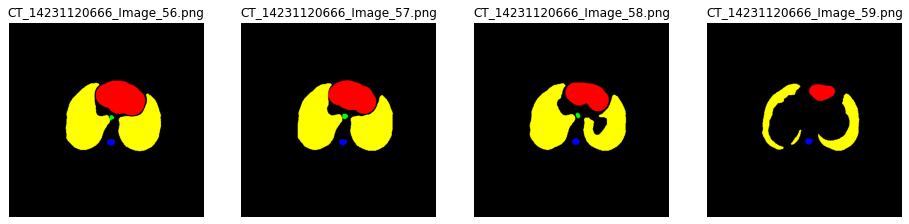

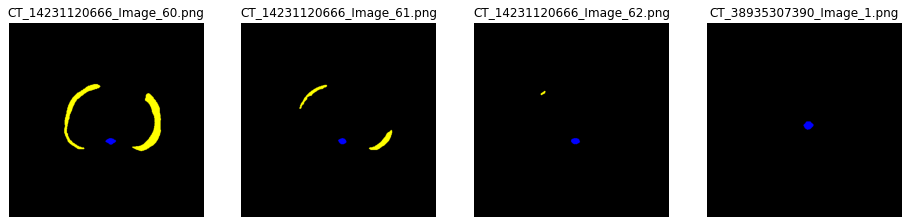

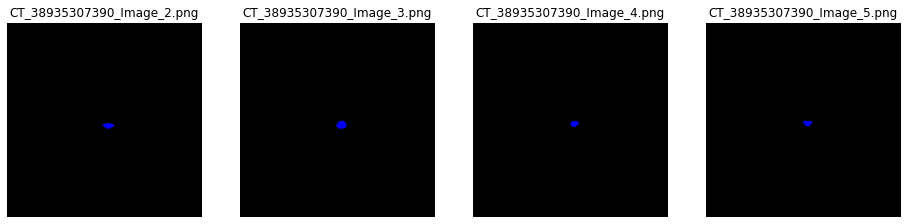

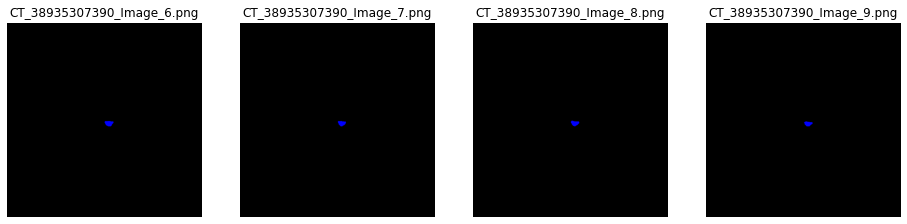

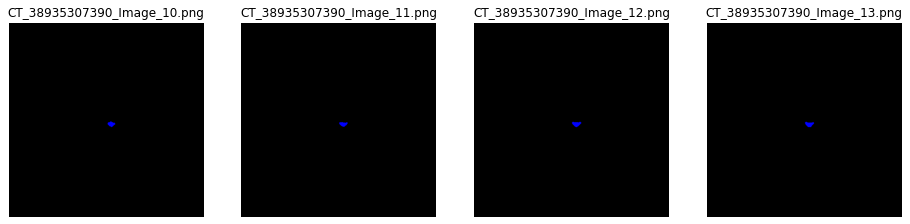

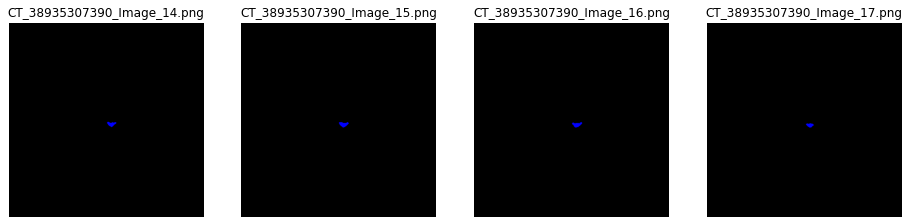

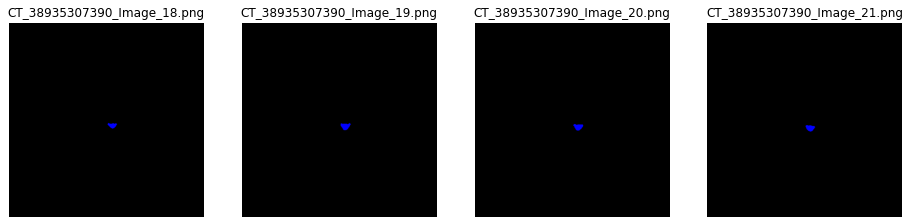

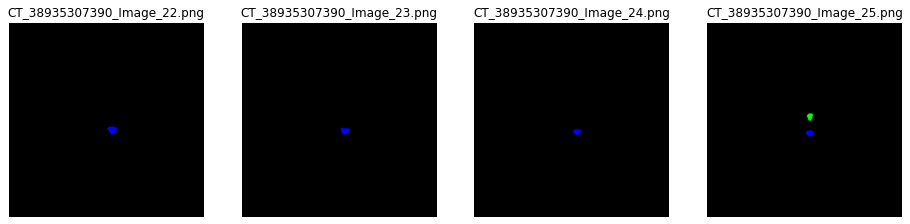

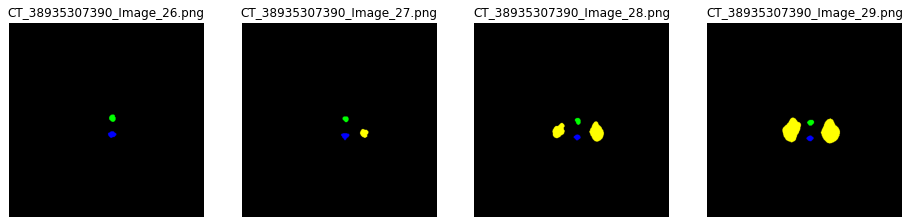

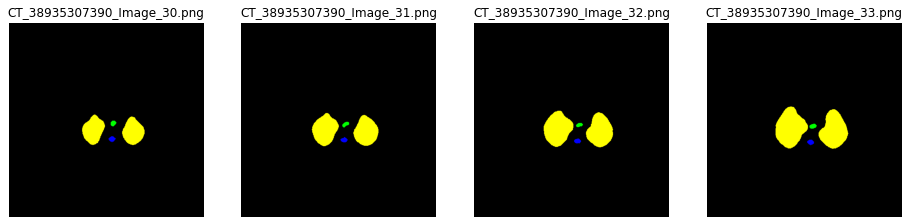

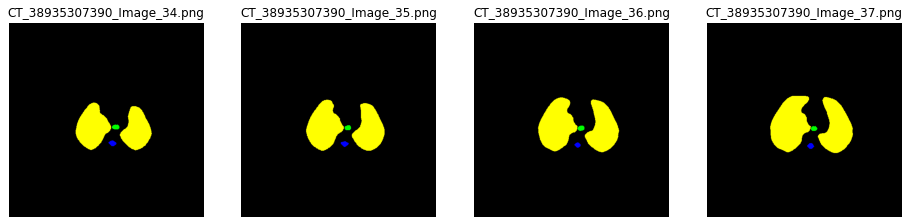

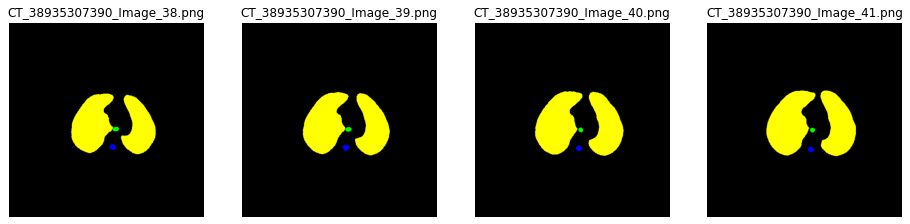

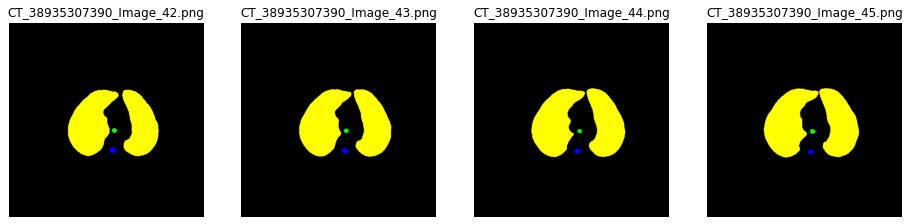

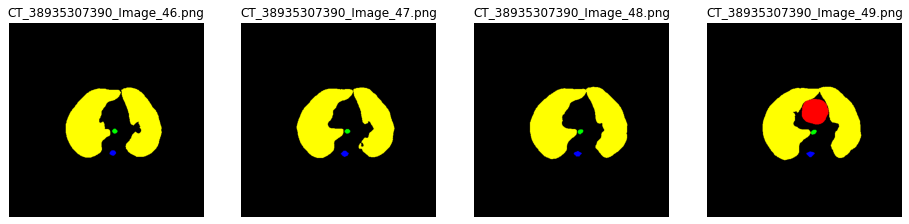

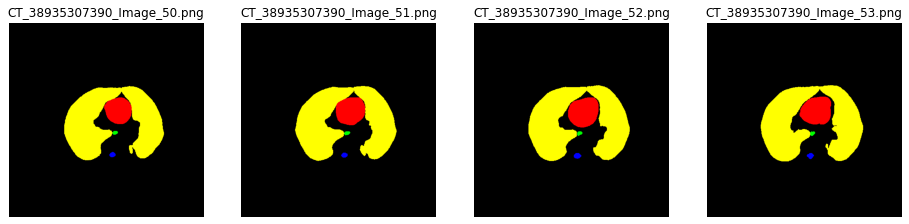

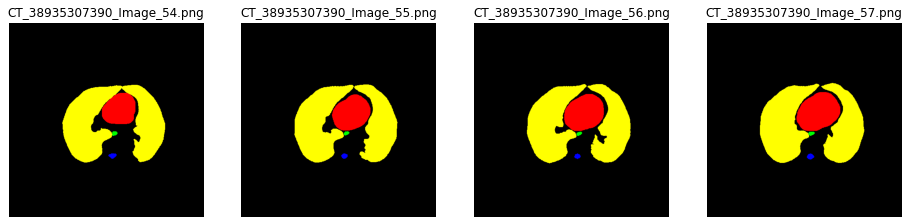

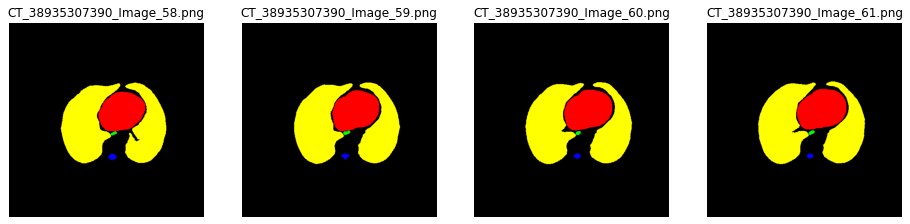

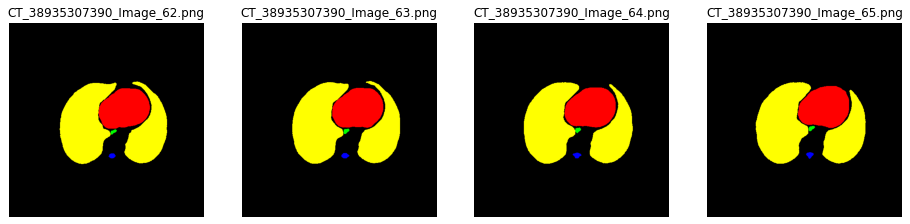

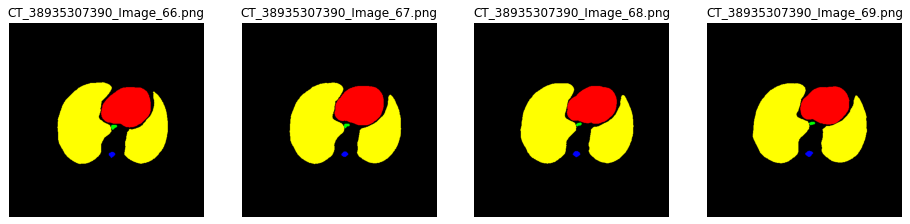

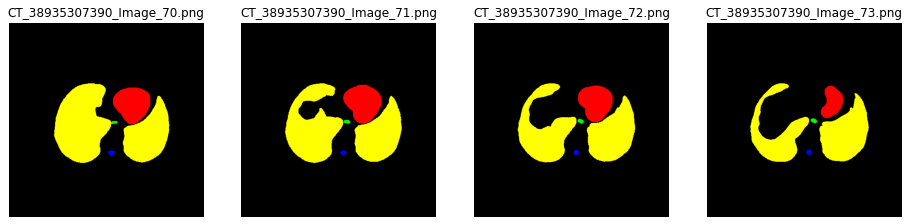

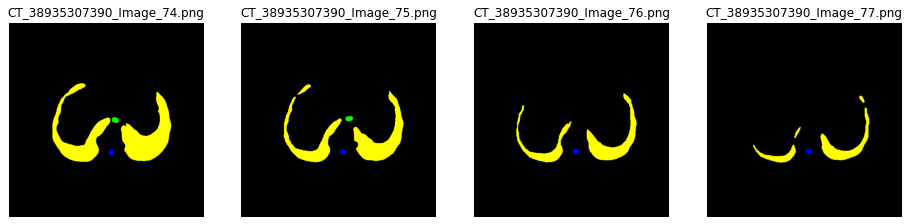

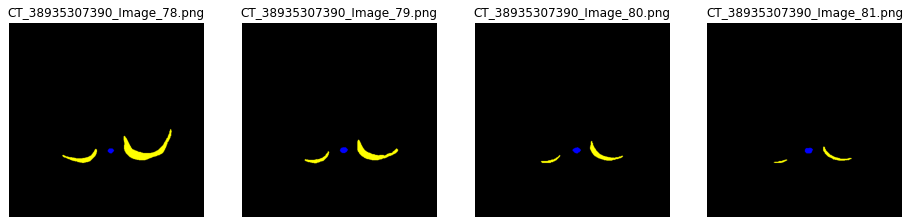

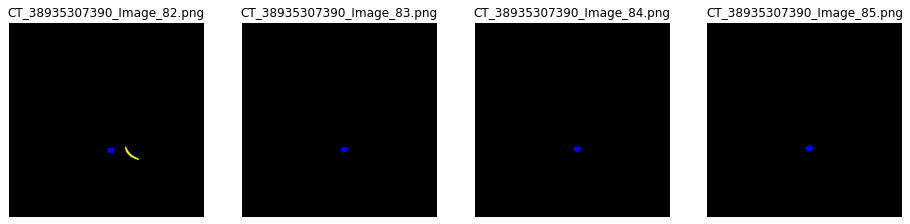

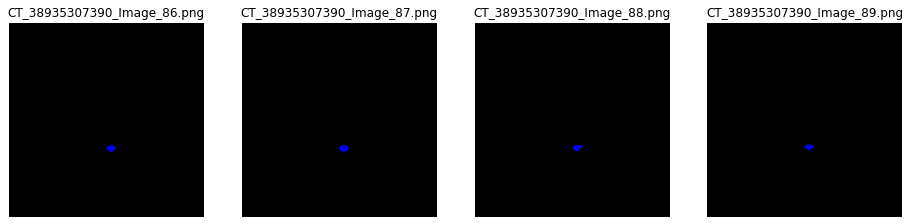

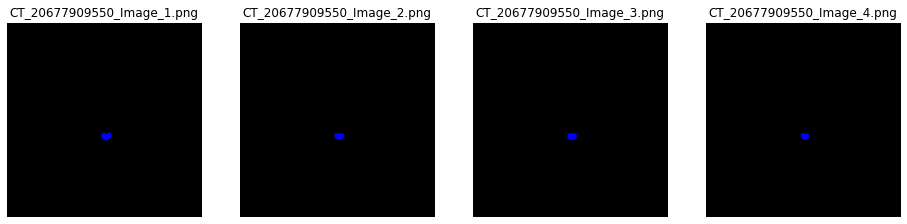

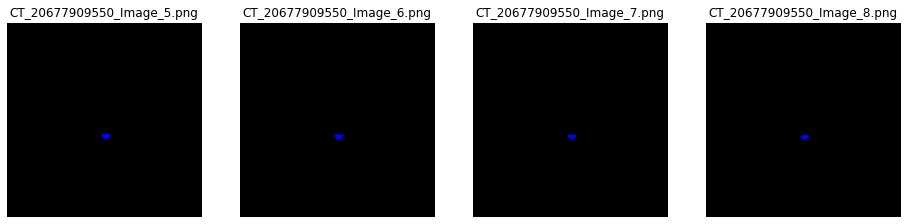

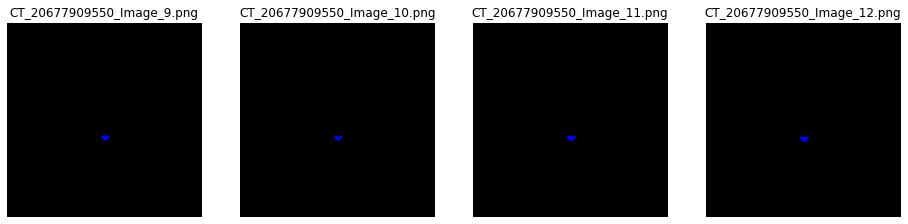

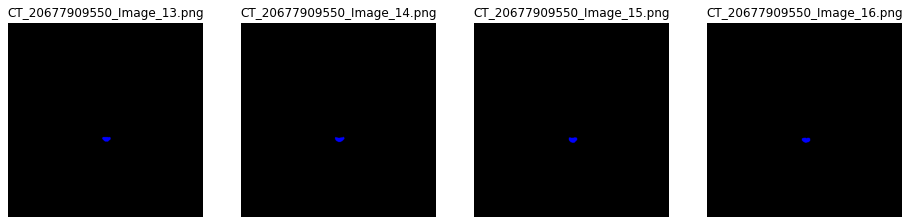

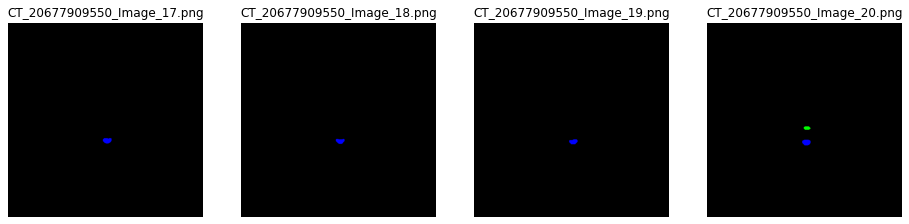

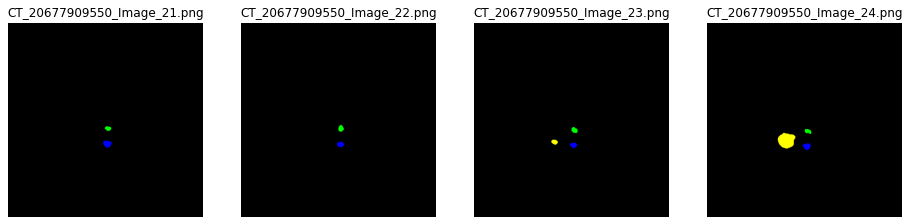

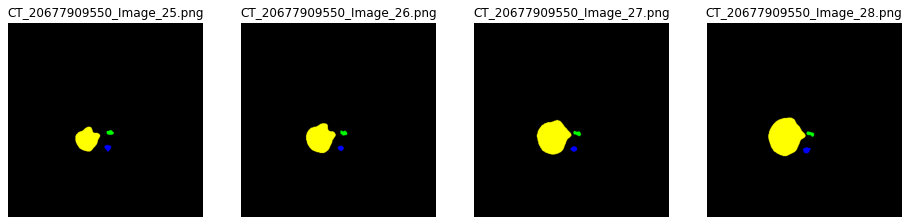

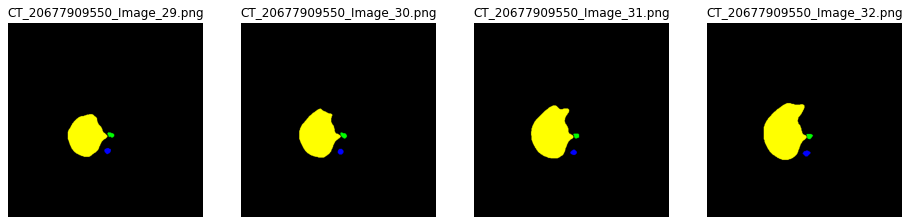

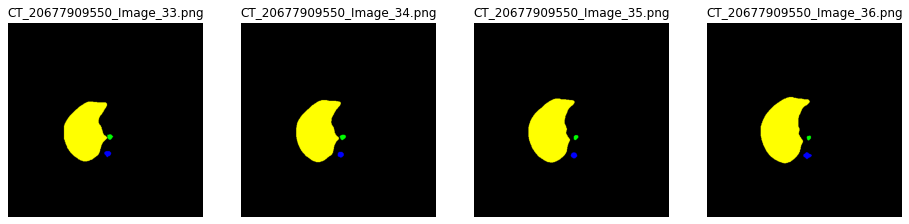

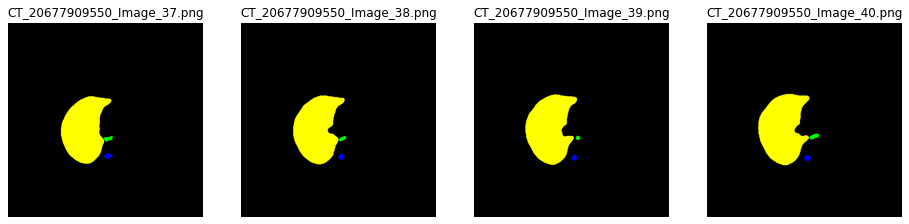

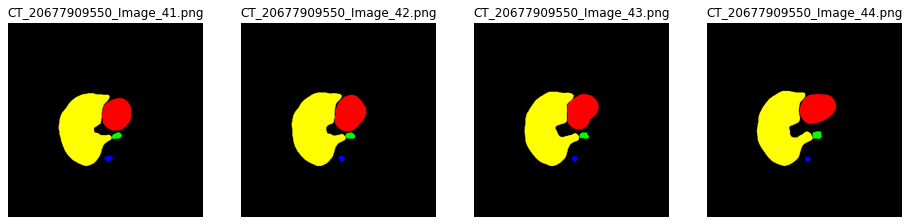

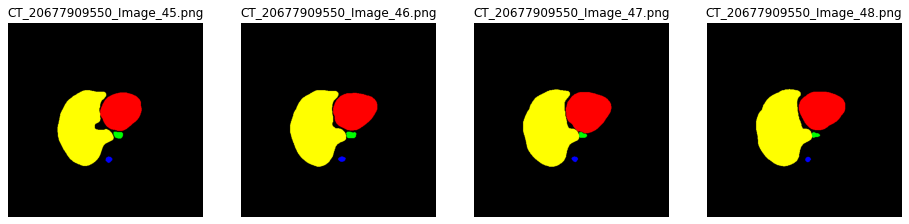

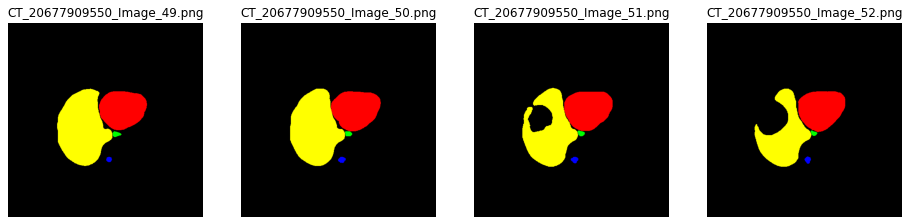

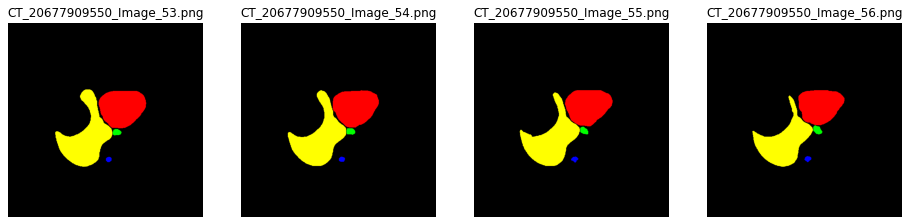

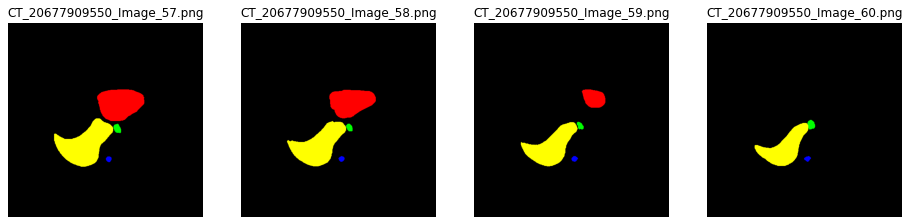

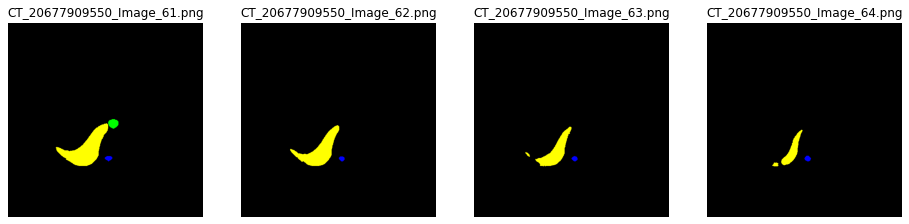

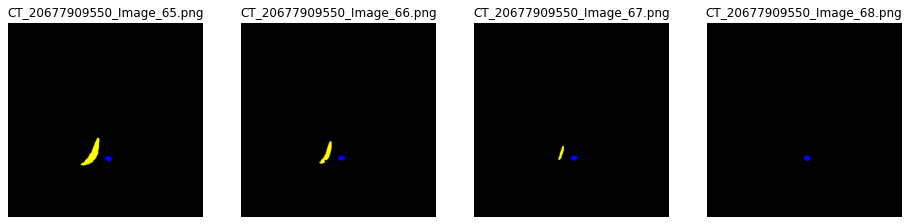

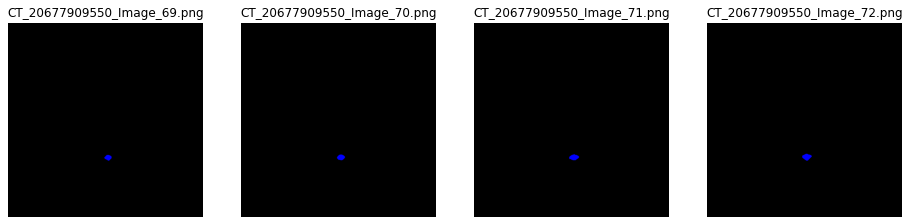

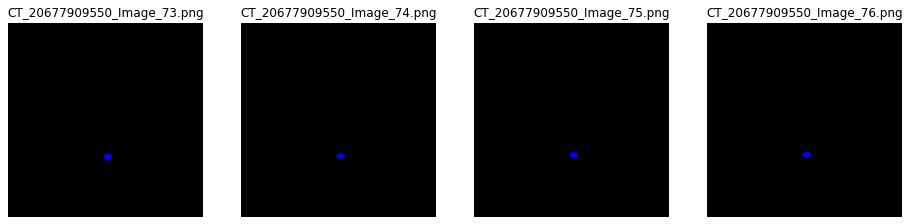

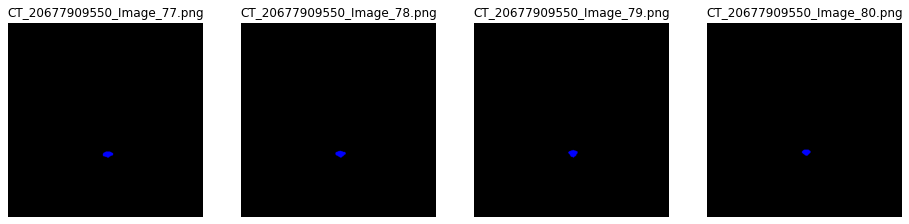

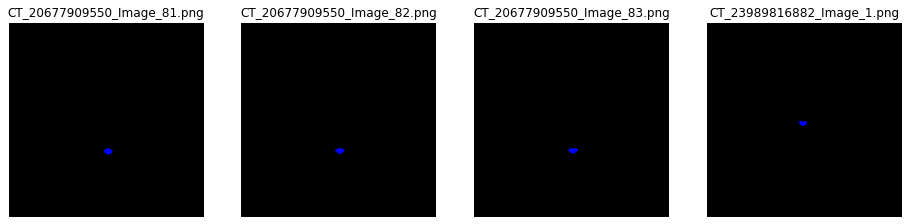

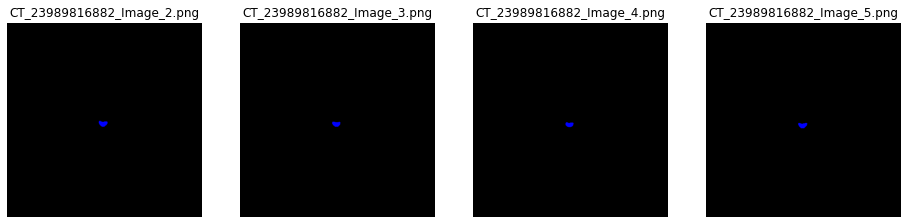

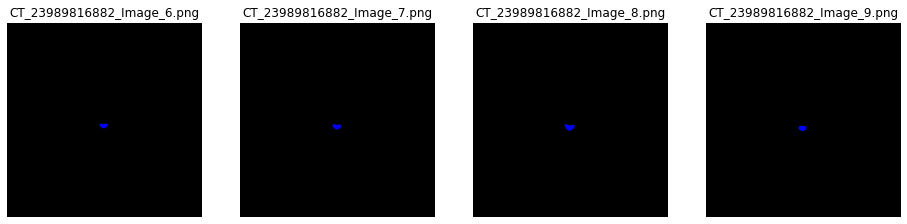

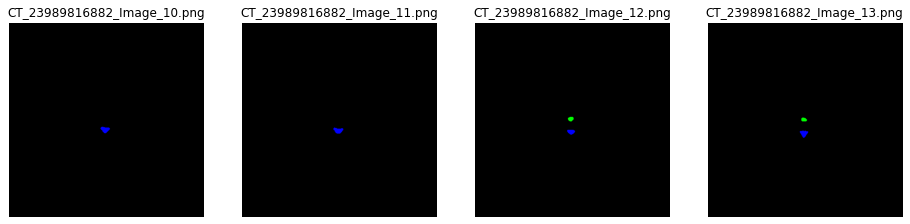

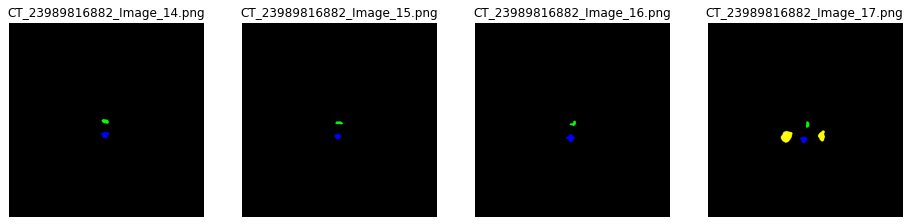

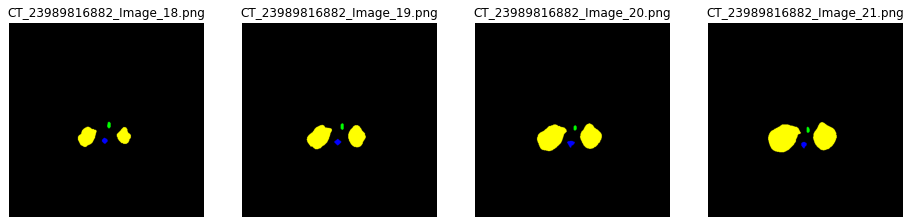

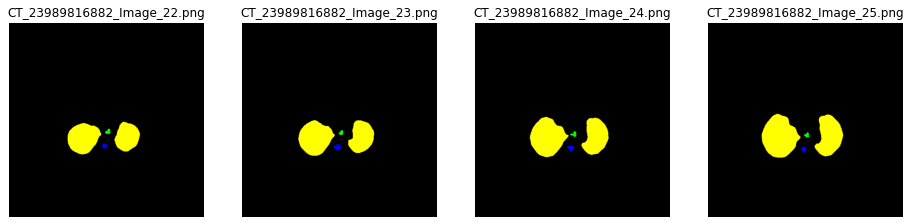

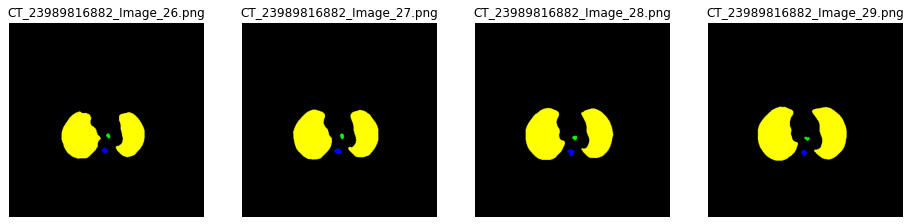

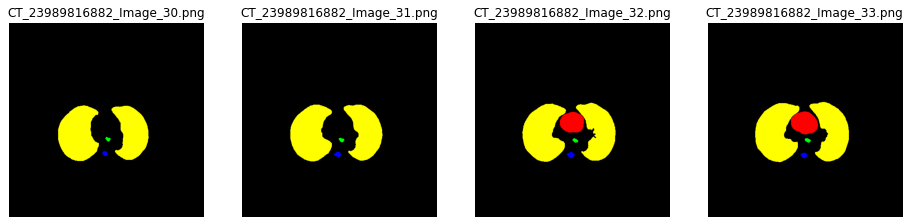

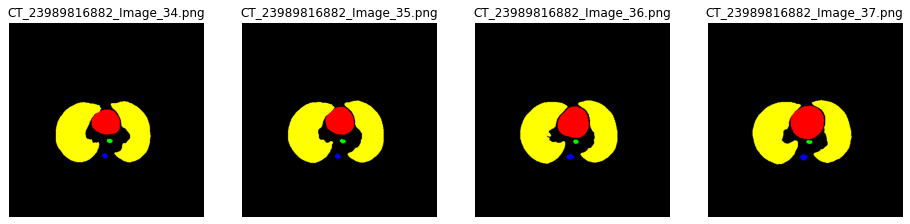

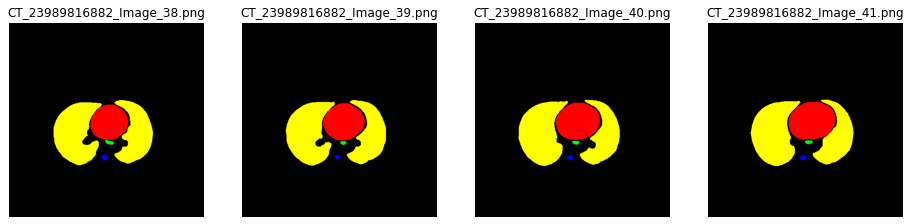

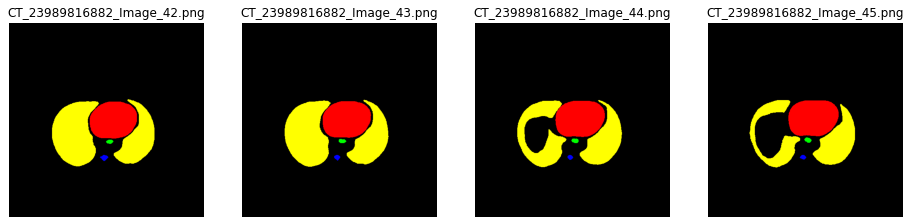

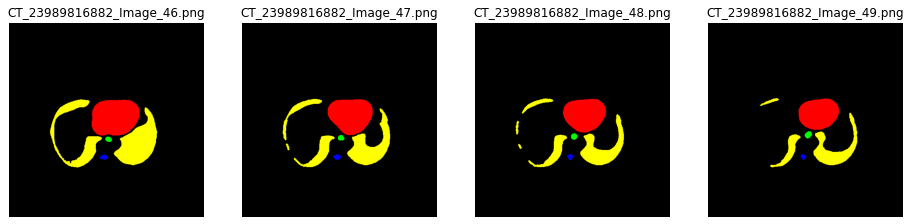

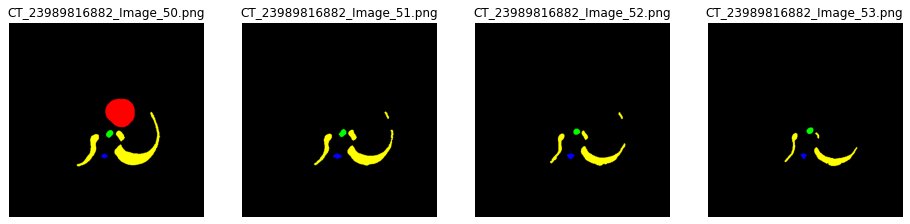

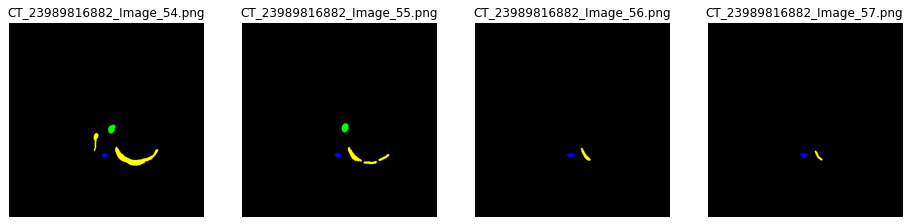

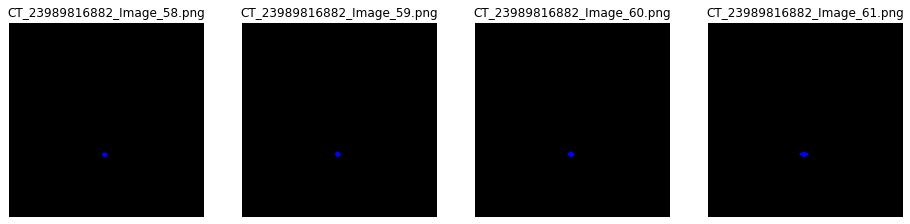

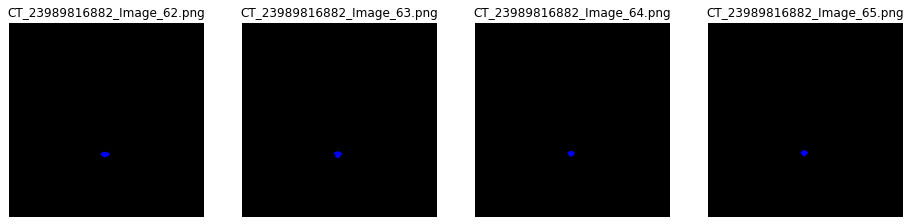

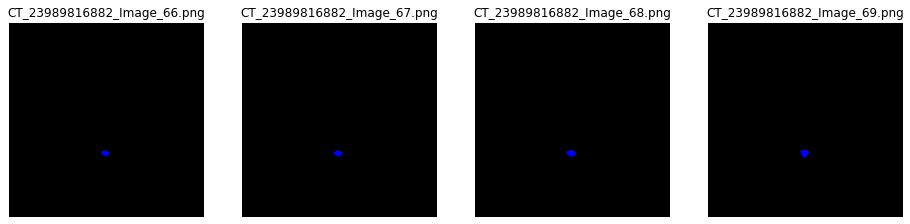

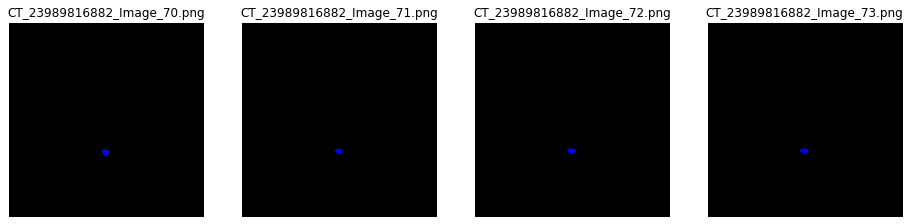

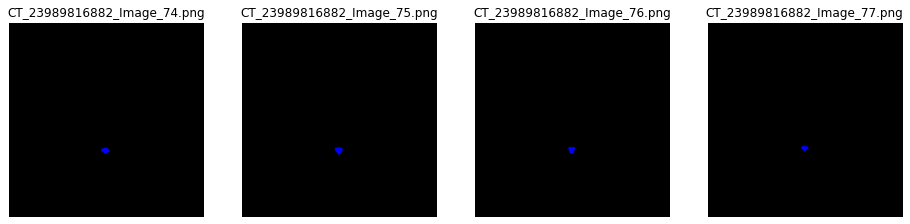

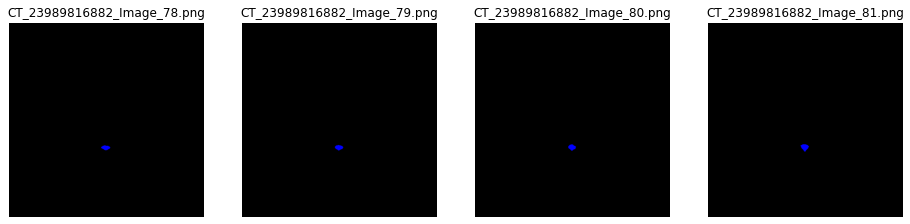

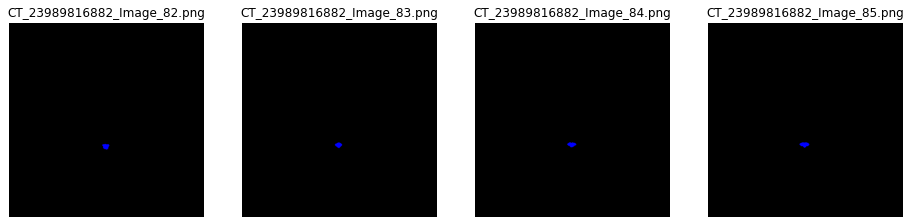

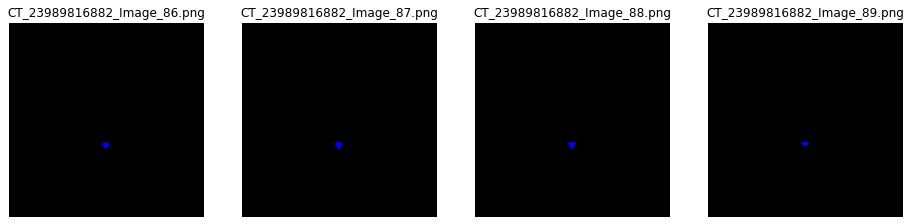

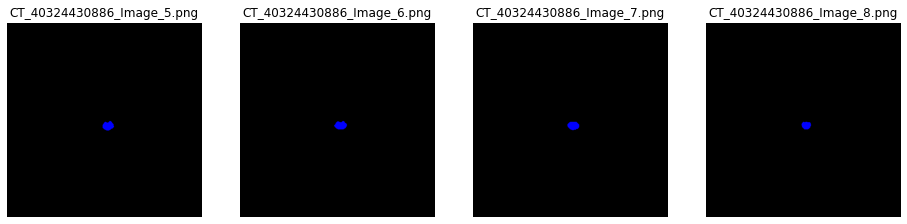

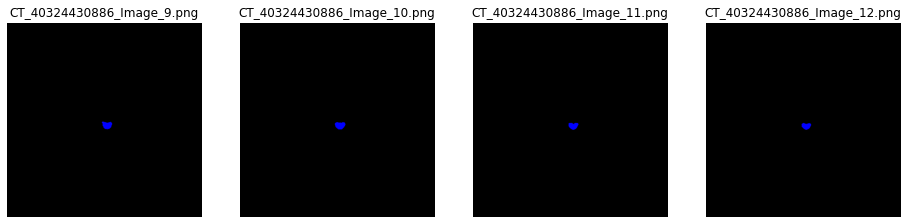

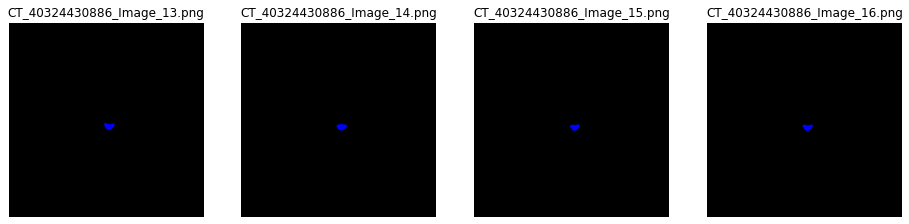

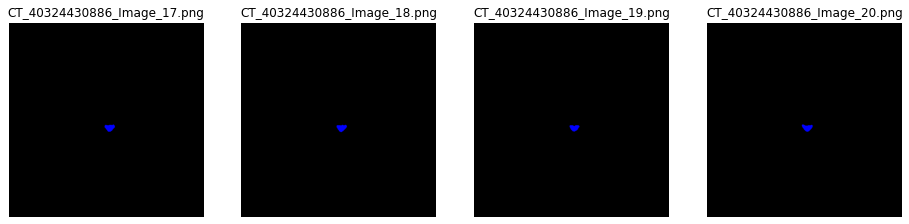

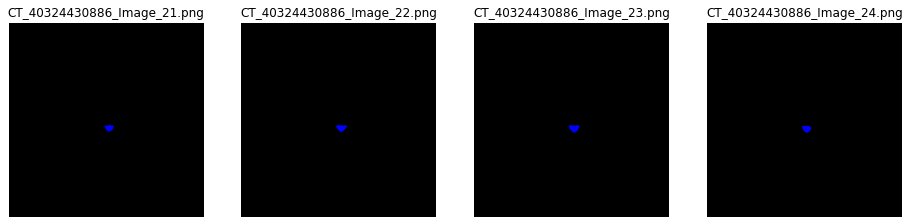

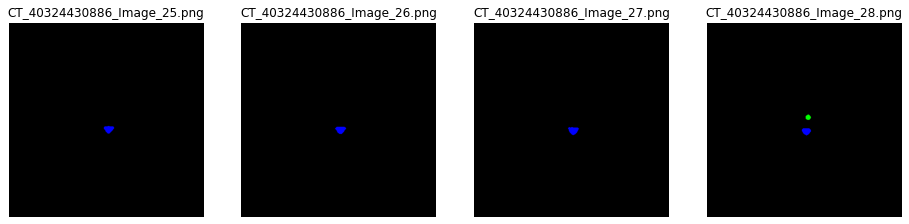

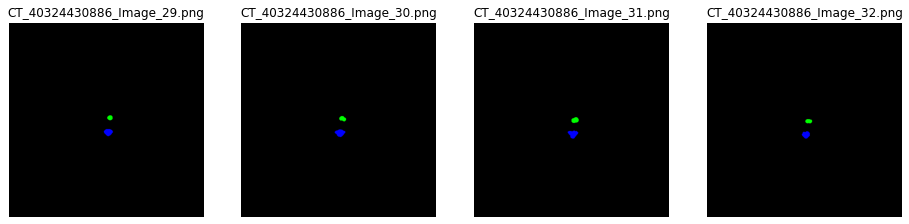

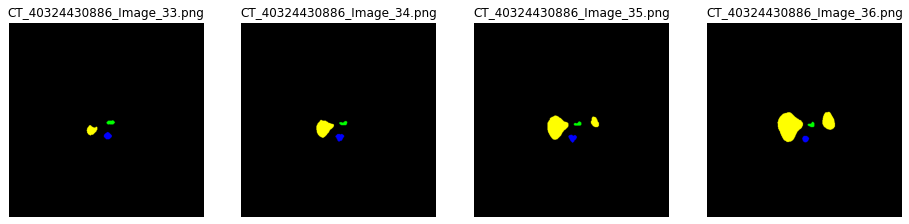

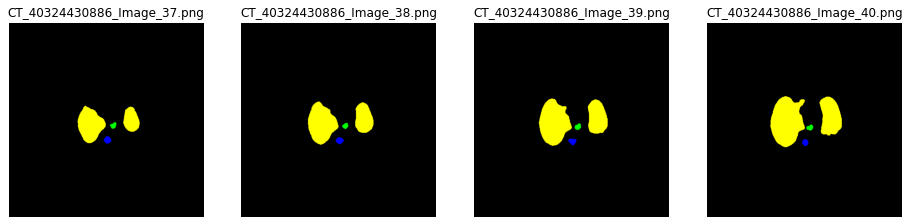

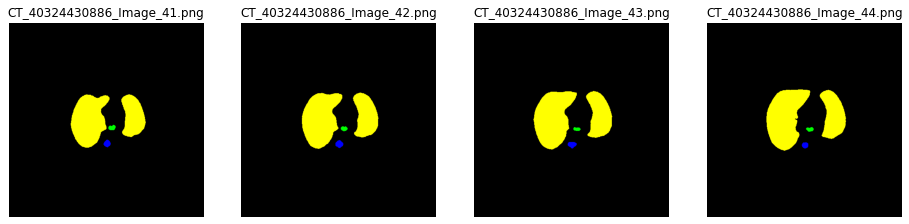

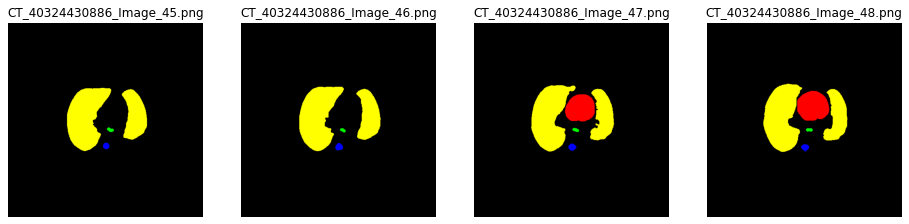

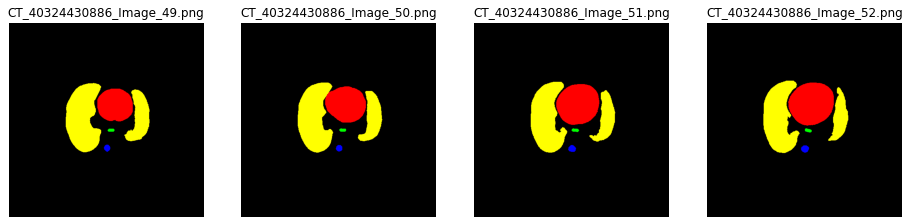

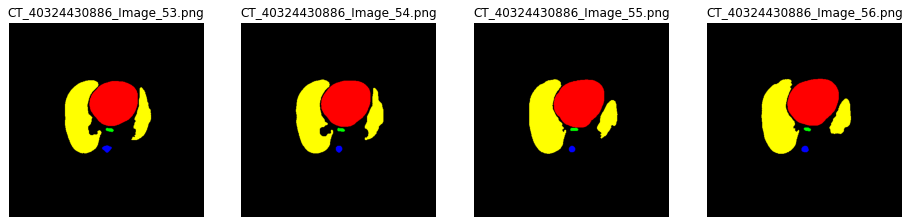

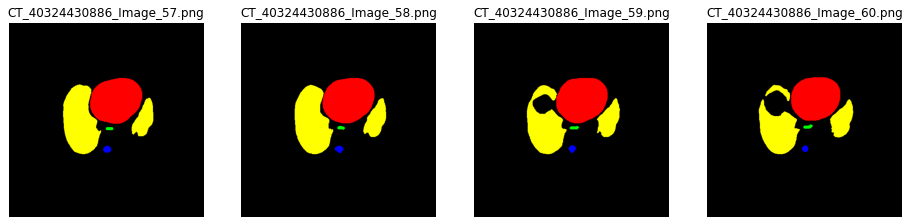

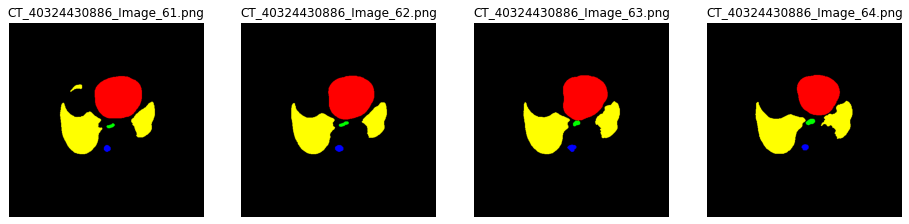

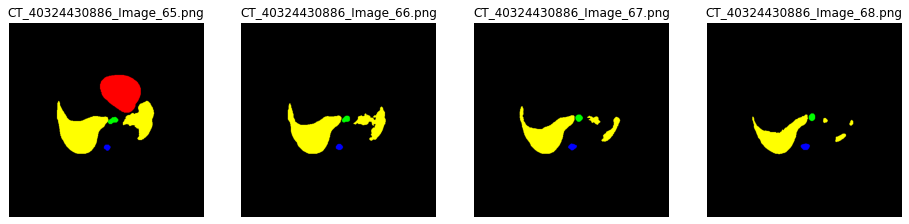

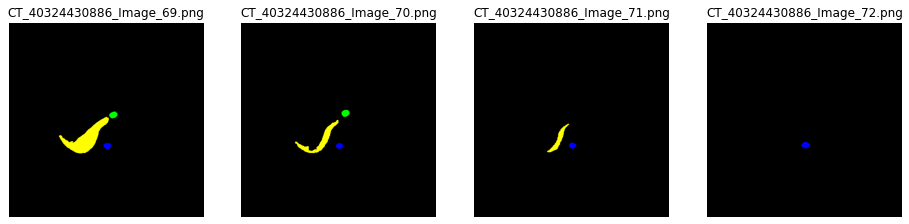

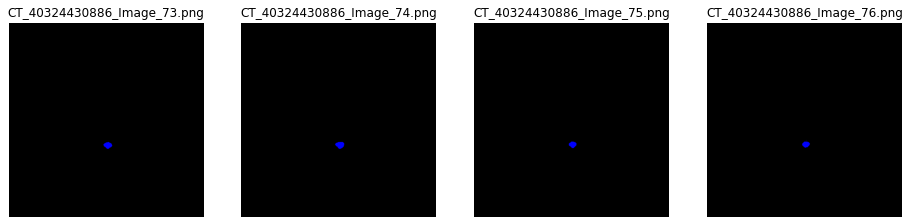

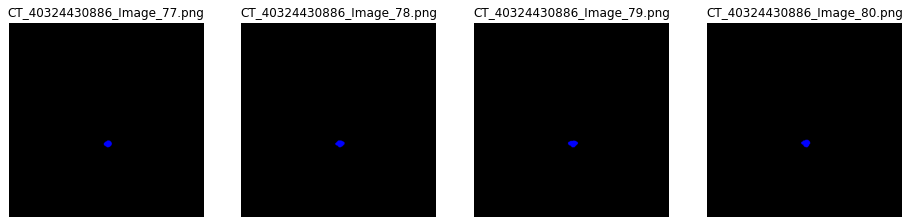

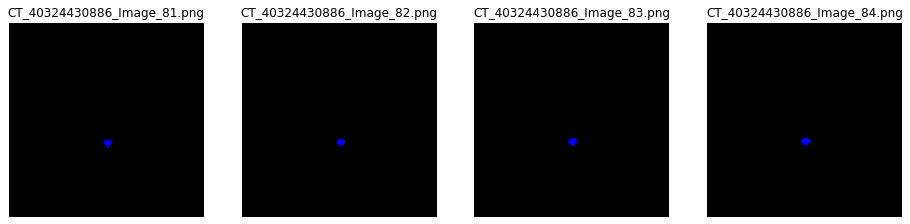

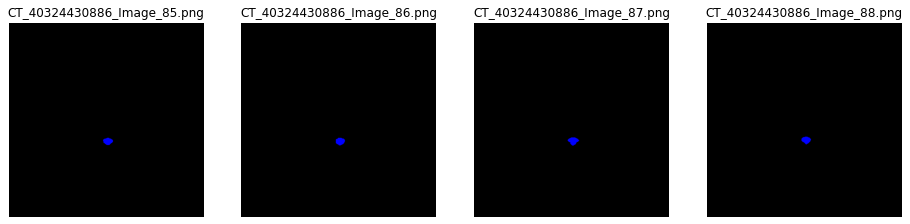

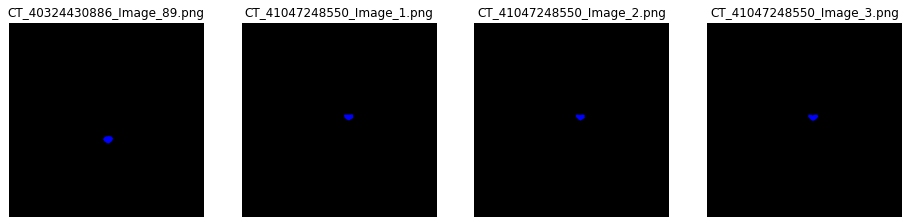

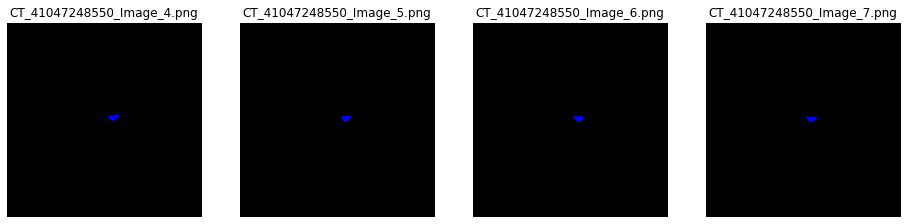

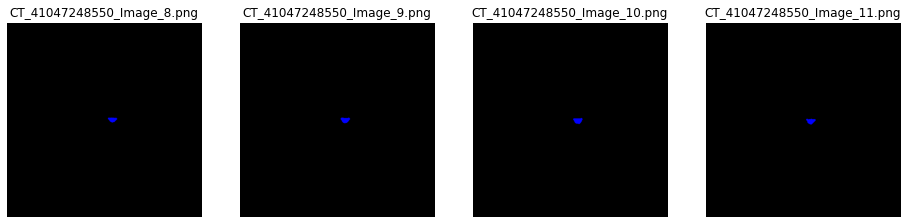

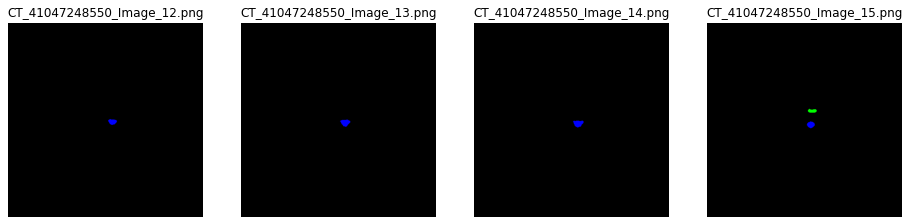

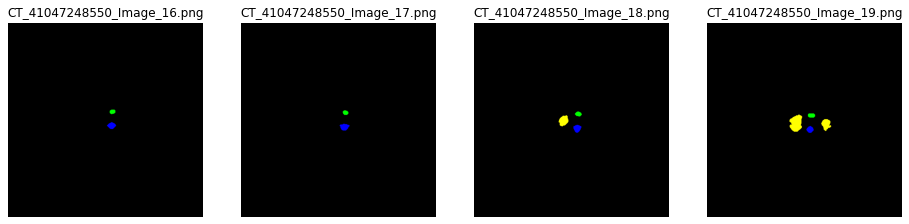

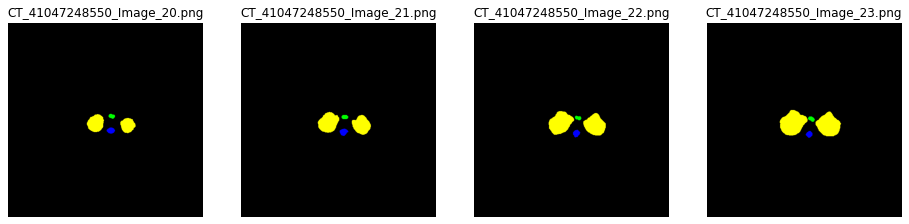

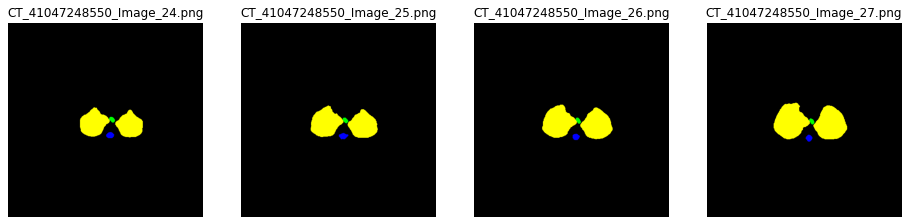

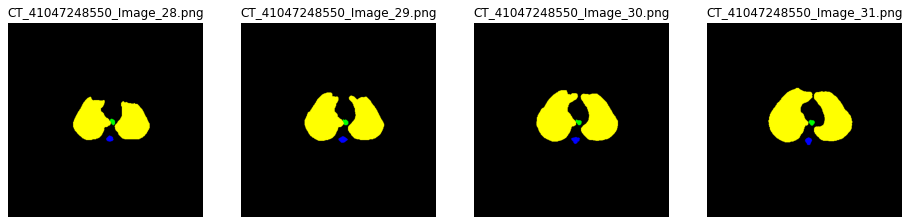

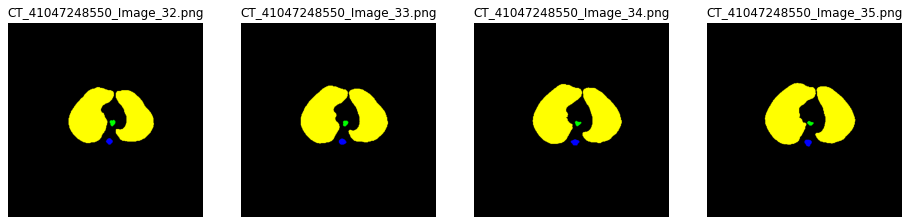

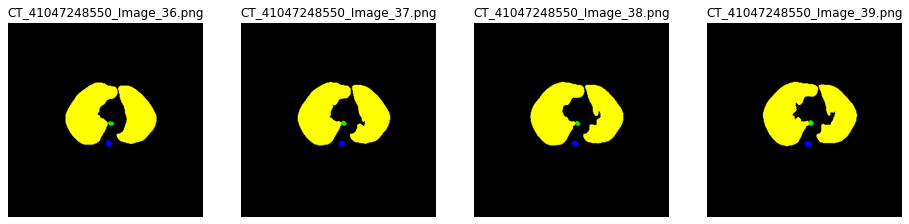

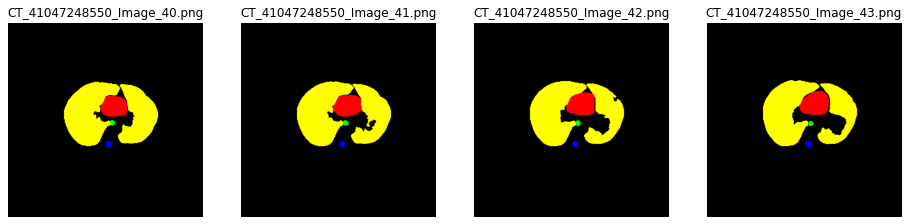

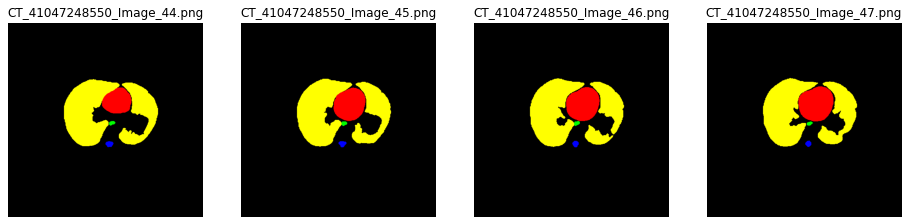

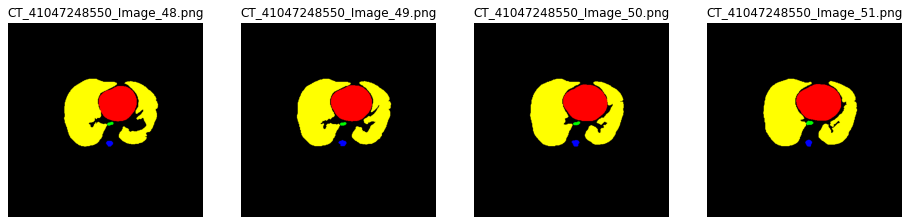

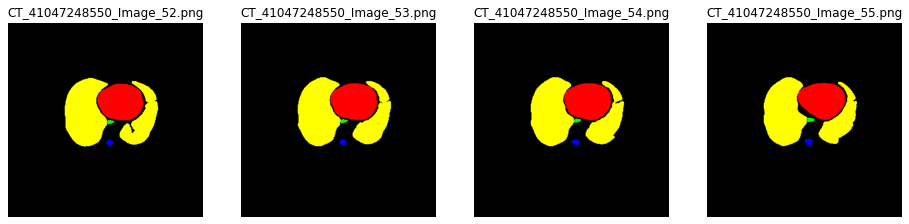

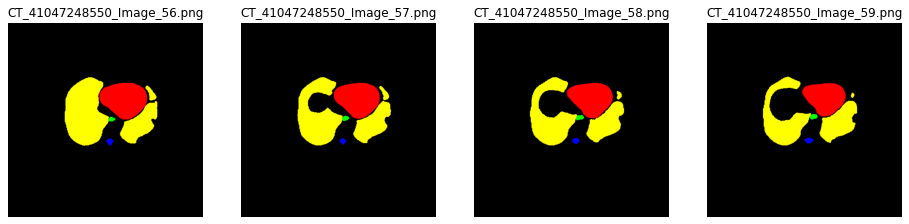

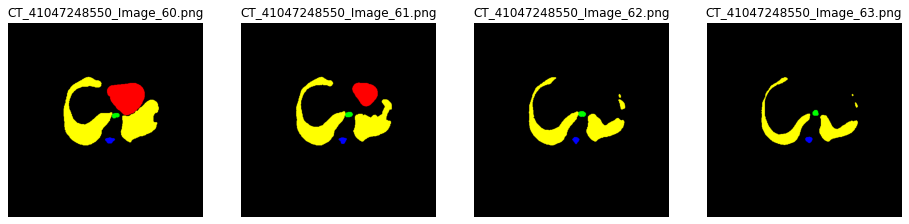

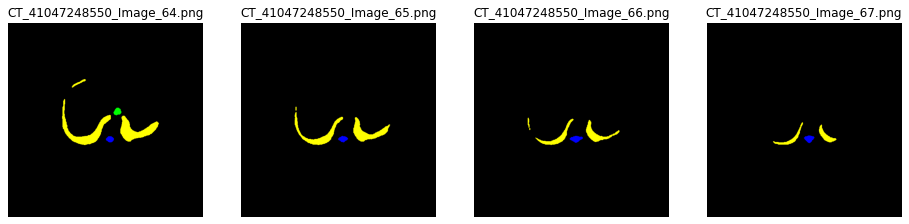

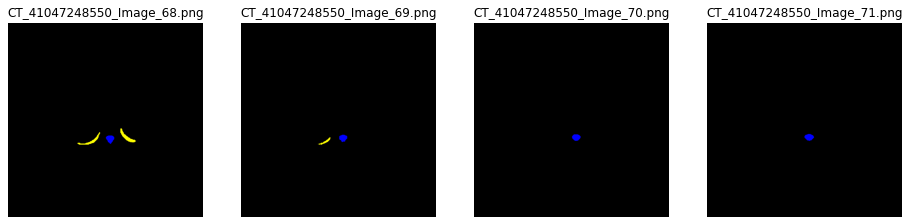

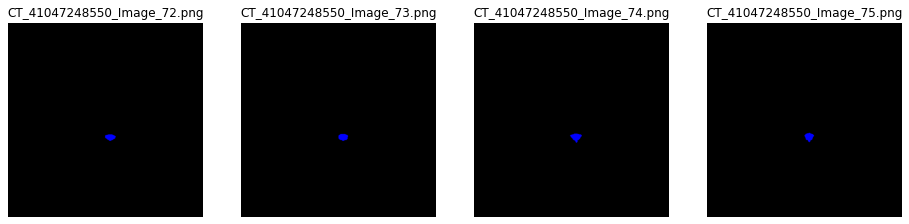

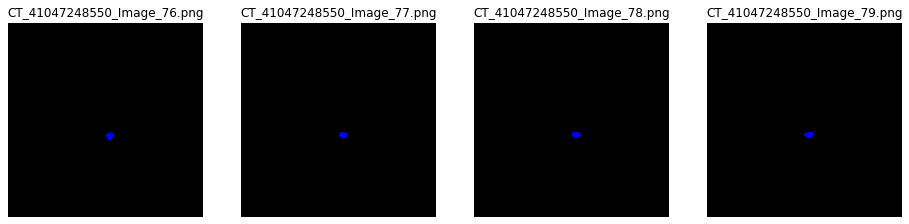

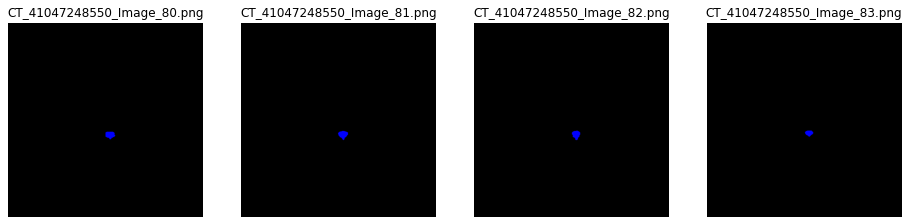

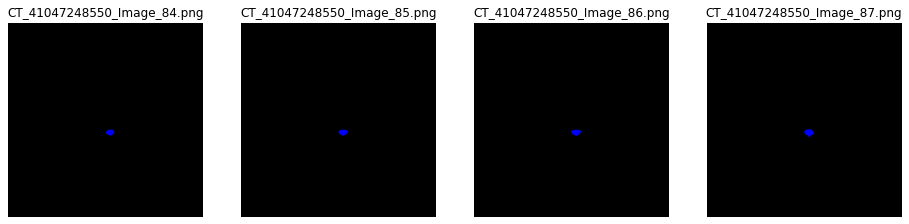

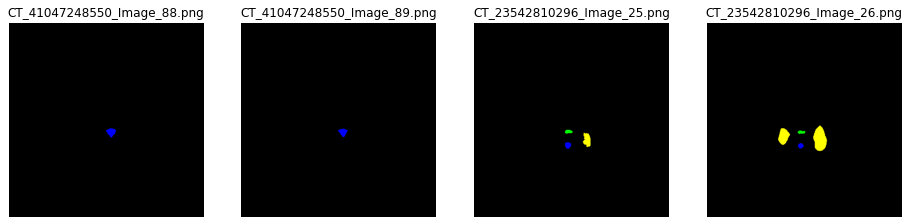

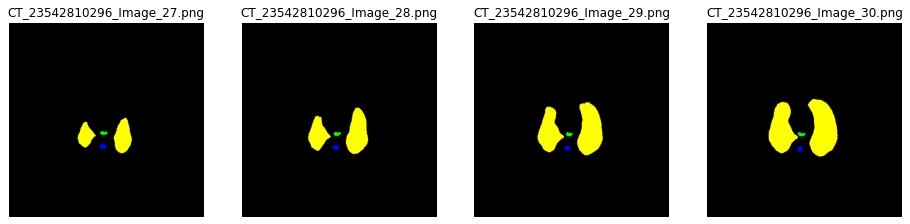

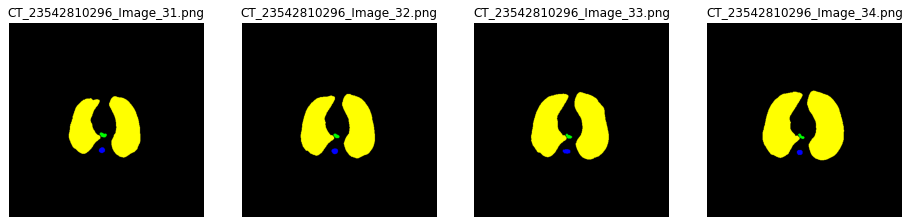

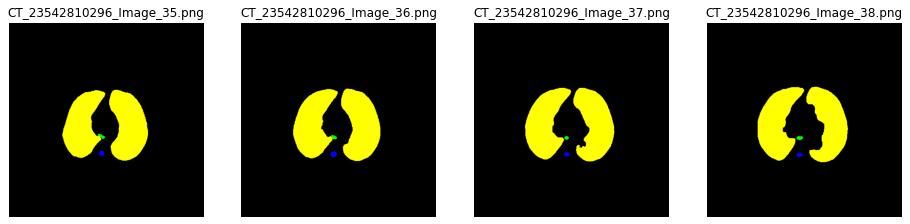

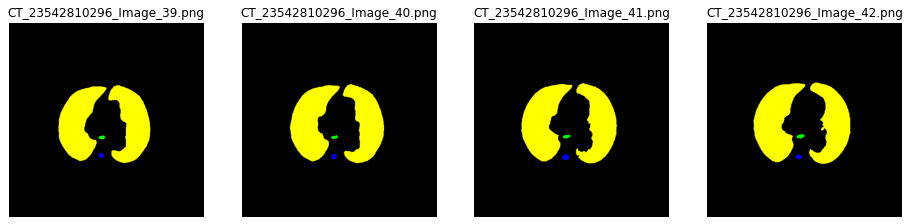

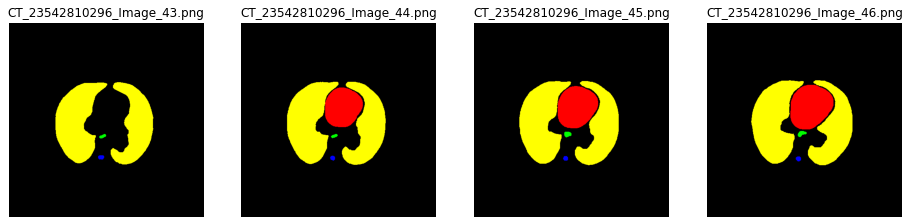

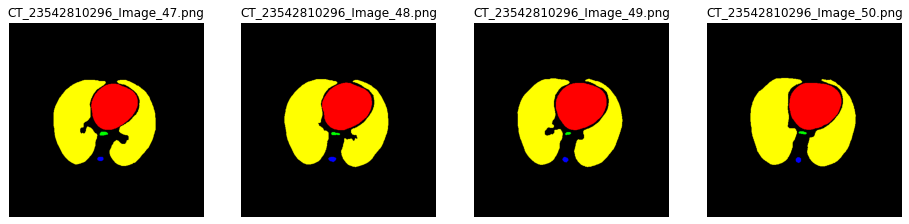

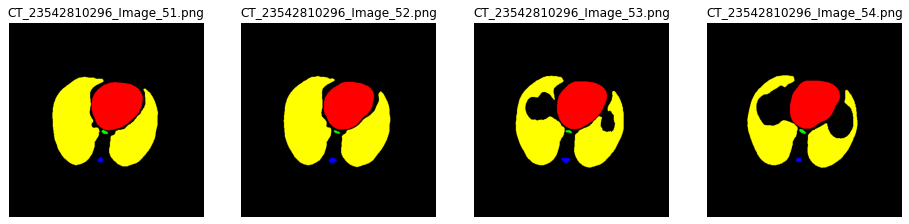

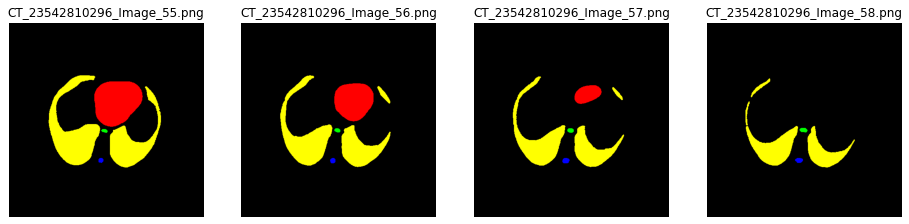

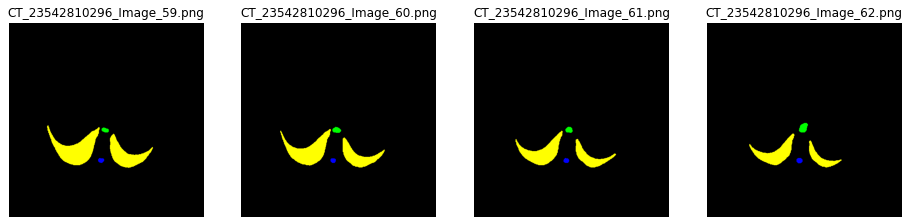

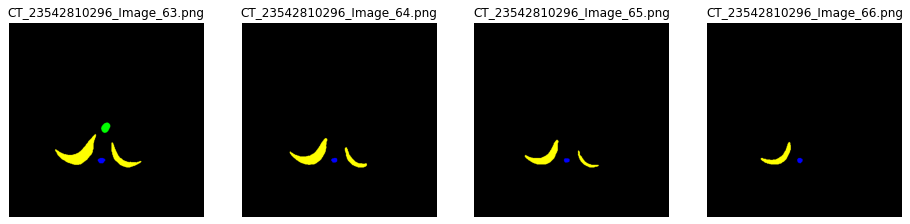

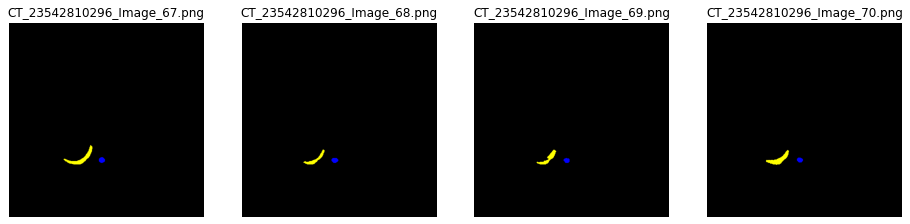

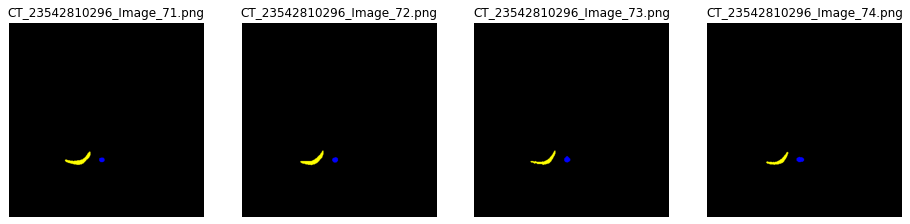

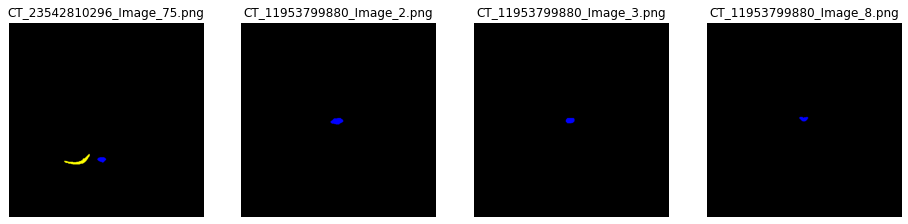

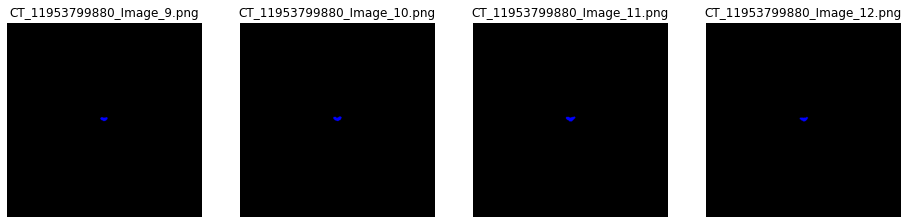

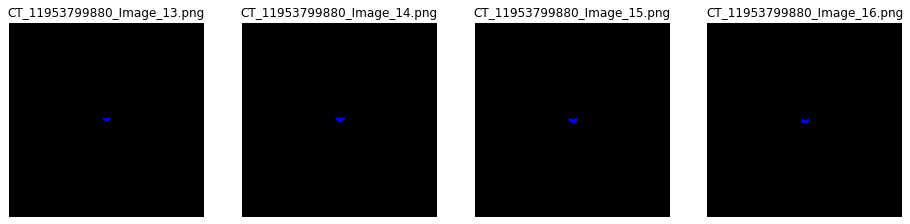

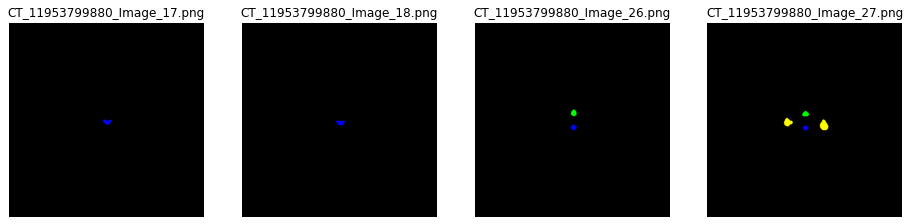

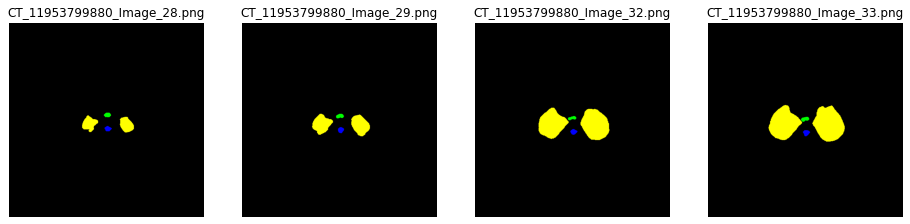

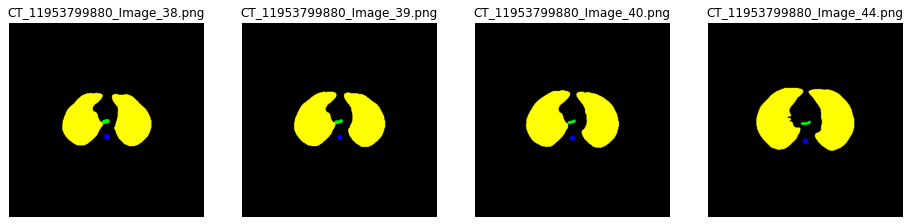

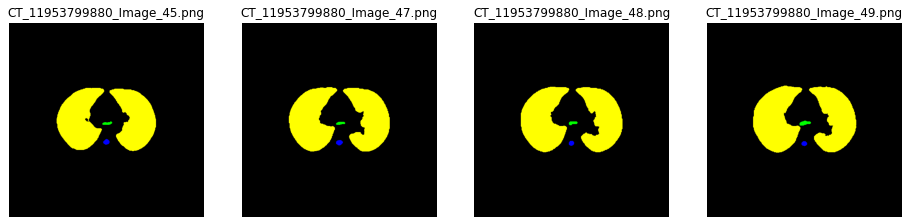

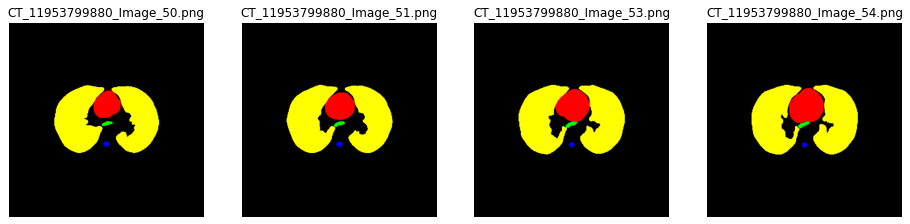

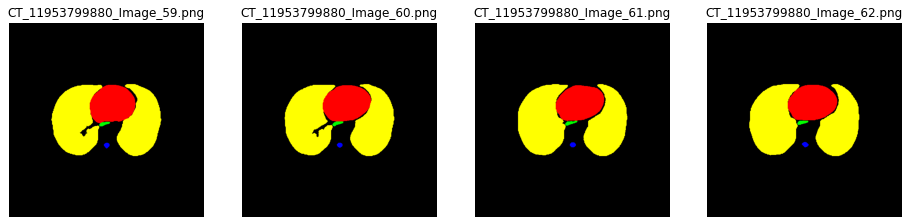

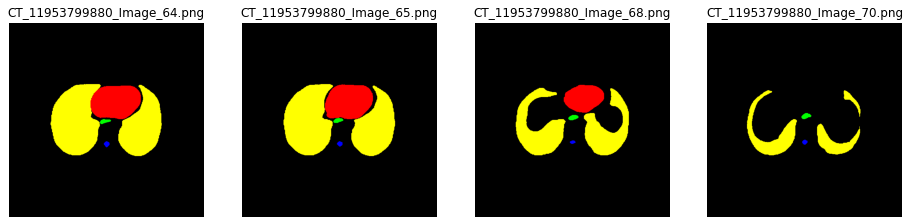

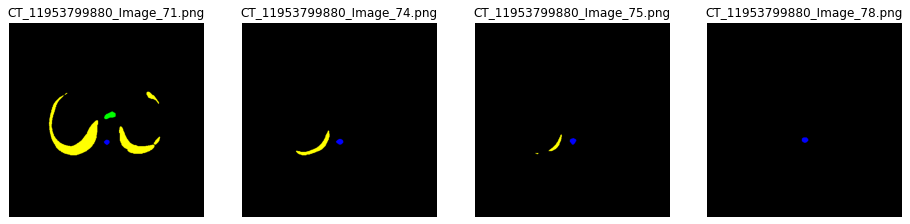

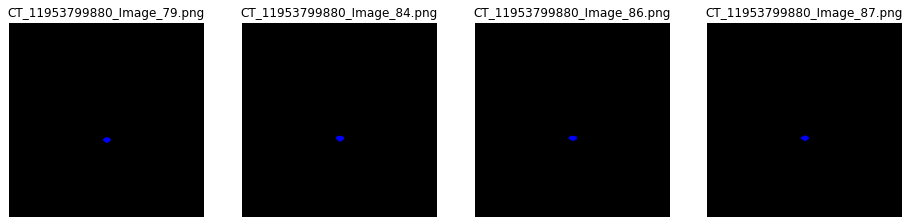

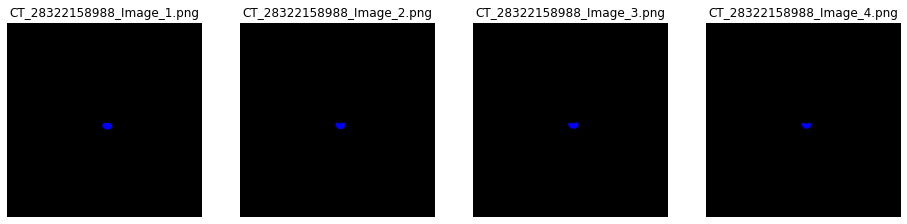

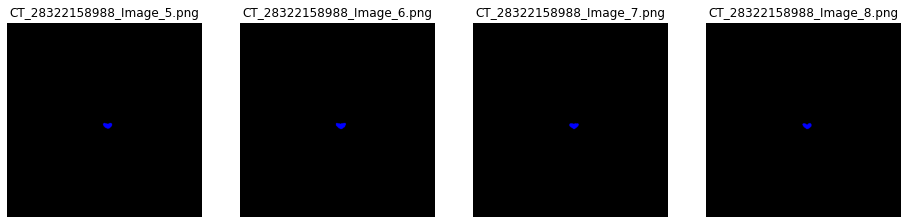

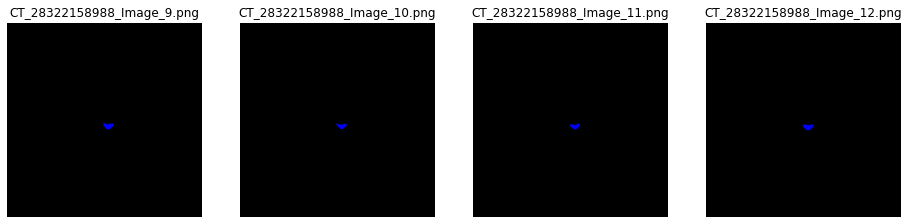

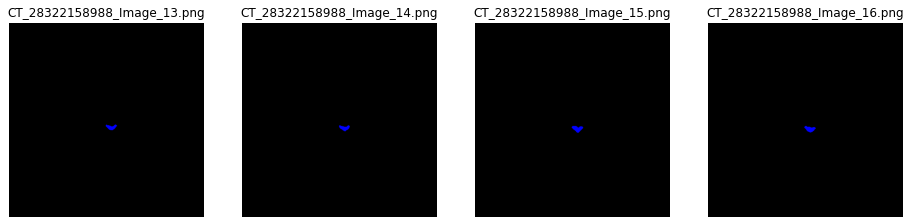

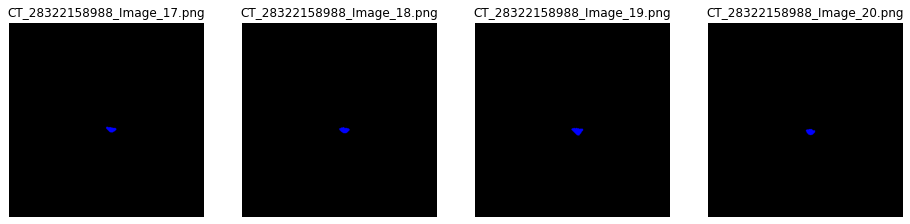

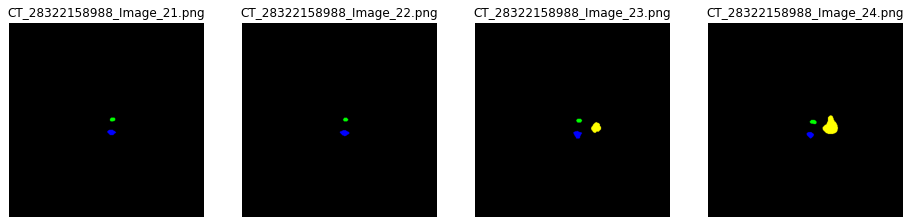

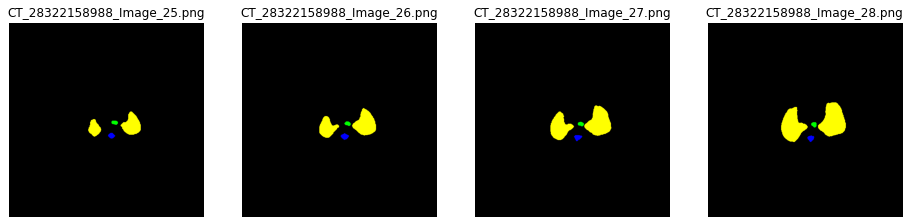

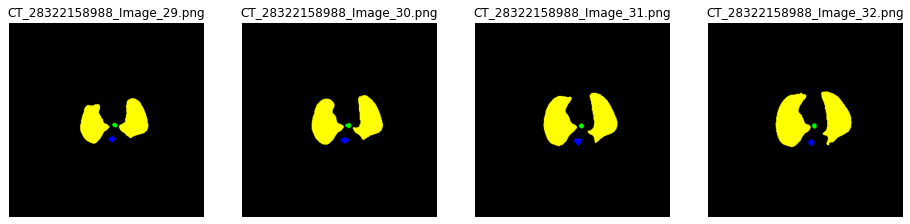

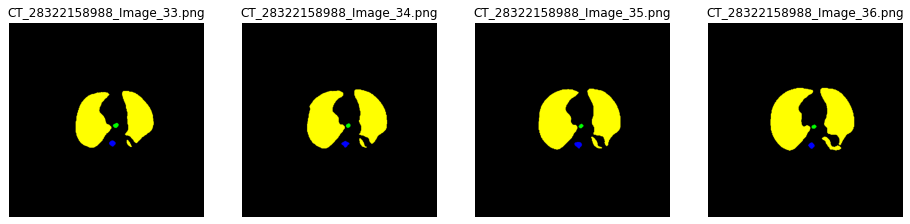

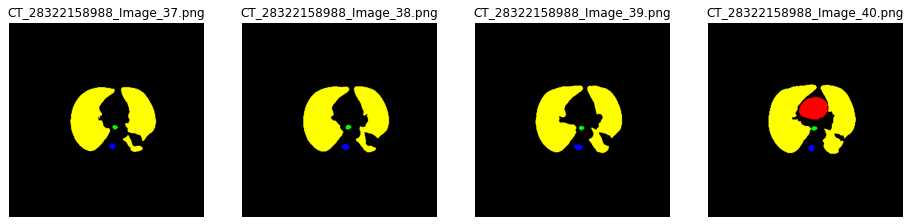

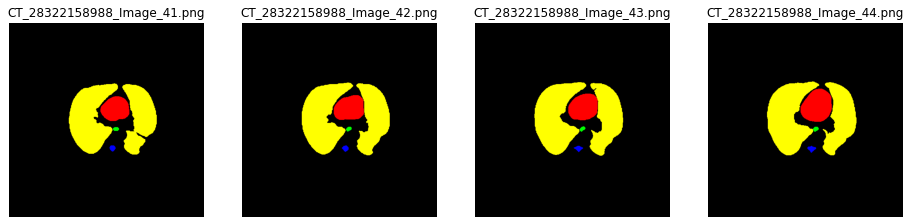

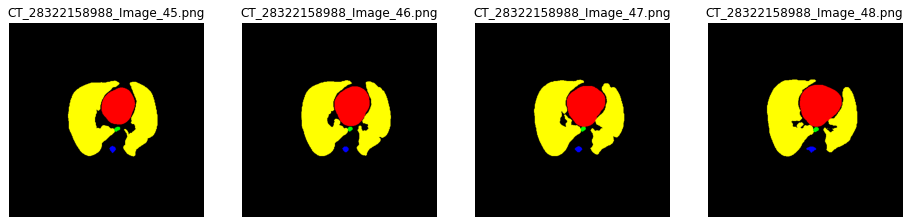

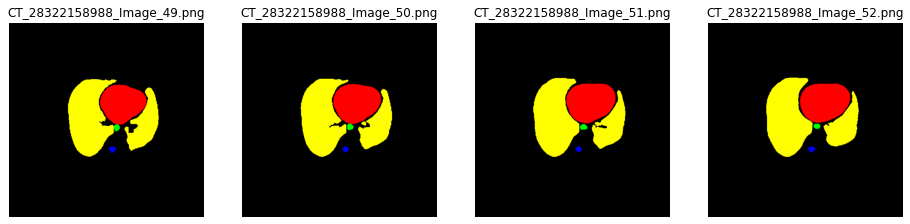

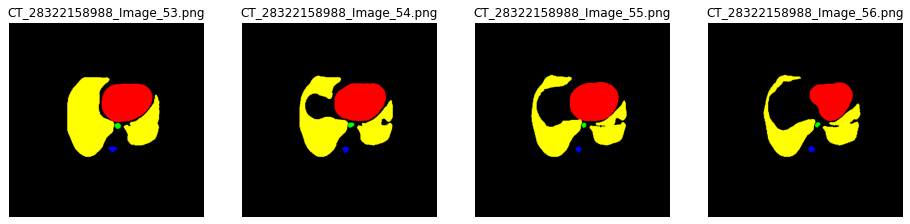

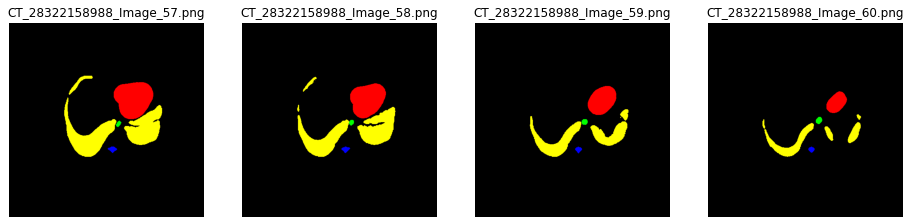

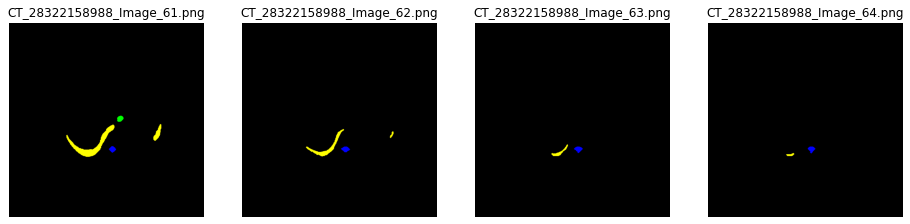

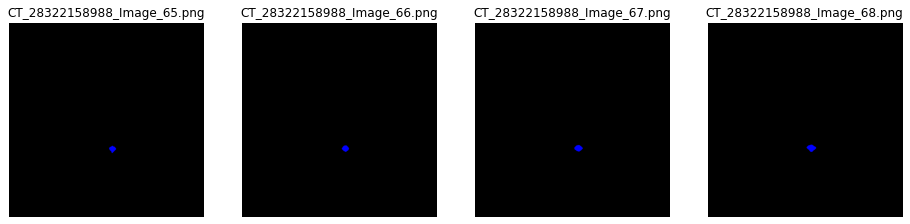

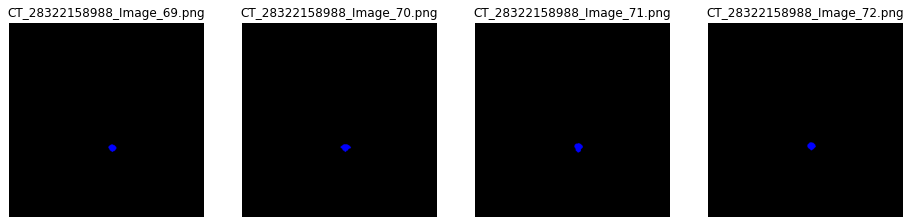

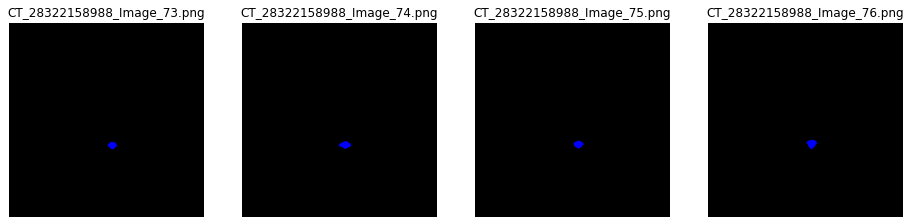

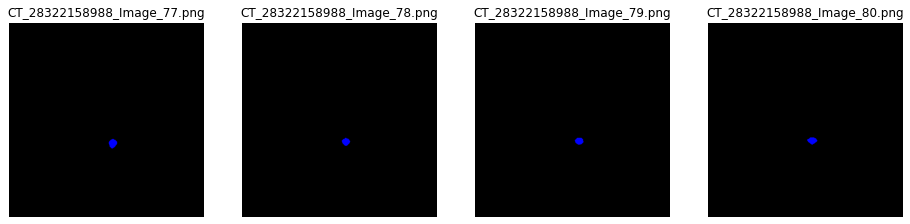

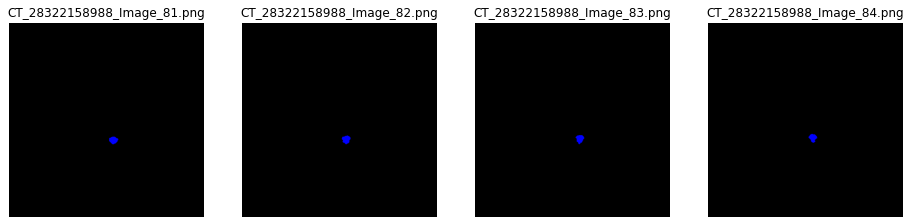

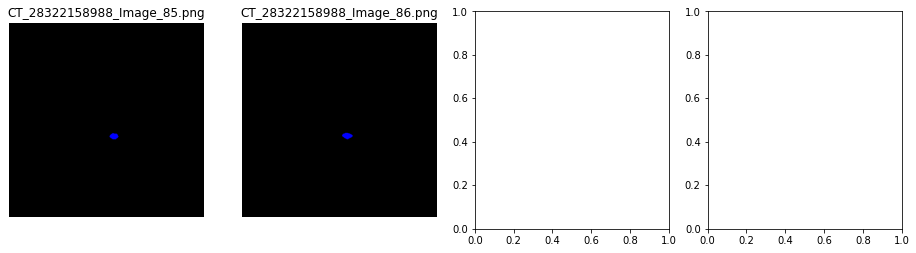

In [3]:
plt.rcParams.update({'figure.max_open_warning': 0})
plt.subplots(1,4,figsize=(16,4))
i=1

folder = 'dataset/images/val'
patients = os.listdir(folder)
for patient in patients:
    images = os.listdir(folder + '/' + patient)
    for nm in range(90):
        if 'CT_'+patient+'_Image_'+str(nm)+'.dcm' in images:
            im_name = 'dataset/goldMulty/'+'CT_'+patient+'_Image_'+str(nm)+'.png'
            im = cv2.imread(im_name,cv2.IMREAD_GRAYSCALE)

            plt.subplot(1,4,i)
            plt.axis('off')
            plt.title('CT_'+patient+'_Image_'+str(nm)+'.png')
            plt.imshow(colored_image(im))   

            i+=1

            if i>4:
                plt.subplots(1,4,figsize=(16,4))
                i=1 

In [7]:
folder = 'dataset/Thorax_1/images/val'
patients = os.listdir(folder)
for patient in patients:
    images = os.listdir(folder + '/' + patient)
    for image in images:
        im_name = image.split('.')[0]
        im = np.zeros((512, 512))
        im3 = cv2.imread('dataset/Thorax_1/Lung_L/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im3 is not None:
            im = im + im3        
        im4 = cv2.imread('dataset/Thorax_1/Lung_R/'+im_name+'.png',cv2.IMREAD_GRAYSCALE)
        if im4 is not None:
            im = im + im4    
            
        im = np.where(im>=1,1,0).astype(np.uint8)
        
        if im.max() == 0:
            os.remove(folder + '/' + patient + '/' + image)
        else:    
            cv2.imwrite('dataset/Thorax_1/lung/'+im_name+'.png',im)

In [1]:
import json
import cv2
import numpy as np
import os

In [9]:
folder = 'dataset/images/tst'
patients = os.listdir(folder)

chosen_data_dict = {}

for patient in patients:
    images = os.listdir(folder + '/' + patient)
    
    start = False
    esoOn = False
    image_list = []
    for nm in range(110):
        if 'CT_'+patient+'_Image_'+str(nm)+'.dcm' in images:
            im_name = 'dataset/goldMulty/'+'CT_'+patient+'_Image_'+str(nm)+'.png'
            im = cv2.imread(im_name,cv2.IMREAD_GRAYSCALE)
            if 1 in im:
                start = True
            if 2 in im:
                esoOn = True
            if esoOn and 2 not in im:    
                break
            if start:
                image_list.append('CT_'+patient+'_Image_'+str(nm)+'.dcm')
                
    chosen_data_dict[patient] = image_list
    
with open("chosen_data_tst.json", "w") as outfile:
    json.dump(chosen_data_dict, outfile)    

In [3]:
with open('chosen_data_tst.json') as f:
    tst_images = json.load(f) 

In [10]:
def findCuttingRegions(imageName):
    goldImage = cv2.imread('dataset/goldMulty/'+imageName,cv2.IMREAD_GRAYSCALE)
    
    oneLung = False
    im = cv2.imread('dataset/Lung_L/'+imageName, cv2.IMREAD_GRAYSCALE)
    if im is None:
        oneLung = True        
    im = cv2.imread('dataset/Lung_R/'+imageName, cv2.IMREAD_GRAYSCALE)
    if im is None:
        oneLung = True
            
    (h,w) = goldImage.shape
    for i in range(h):
        if goldImage[i,:].sum()>0:
            sh = i-1
            break
    for i in range(h-1,0,-1):
        if goldImage[i,:].sum()>0:
            eh = i+1
            break 
    for i in range(w):
        if goldImage[:,i].sum()>0:
            sw = i-1
            break
    for i in range(w-1,0,-1):
        if goldImage[:,i].sum()>0:
            ew = i+1
            break         
    addh = 256-(eh-sh+1)  
    addw = 384-(ew-sw+1)
    sh = sh - (addh - addh%2)/2
    eh = sh + 256
    sw = sw - (addw - addw%2)/2
    ew = sw + 384
    if oneLung:
        sw = 68
        ew = 452
    return [int(sh), int(eh), int(sw), int(ew)]     

In [2]:
def findSmallestRect(imageName):
    goldImage = cv2.imread('dataset/goldMulty/'+imageName,cv2.IMREAD_GRAYSCALE)
            
    (h,w) = goldImage.shape
    for i in range(h):
        if goldImage[i,:].sum()>0:
            sh = i-1
            break
    for i in range(h-1,0,-1):
        if goldImage[i,:].sum()>0:
            eh = i+1
            break 
    for i in range(w):
        if goldImage[:,i].sum()>0:
            sw = i-1
            break
    for i in range(w-1,0,-1):
        if goldImage[:,i].sum()>0:
            ew = i+1
            break         
            
    return [int(sh), int(eh), int(sw), int(ew)]     

In [6]:
with open('chosen_data_val.json') as f:
    images = json.load(f) 

smallestRect = {}    
for patient in images.keys():   
    for image in images[patient]:
        smallestRect[image] = findSmallestRect(image.split('.')[0] + '.png')

with open("smallest_rectangle_val.json", "w") as outfile:
    json.dump(smallestRect, outfile)  